In [1]:
import numpy as np 
import scipy as cp 
import pandas as pd 
from SSA_cpd import SSA
import numpy as np 
import pandas as pd 
from numpy import matrix as m 
from pandas import DataFrame as df 
import seaborn
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import scipy.stats as stats 
import scipy.linalg as linalg
import scipy.signal as signal
import scipy as sp 
import os 
import re

In [2]:
cd ..

/Users/zehaodong/Desktop/alarm_fatigue


In [3]:
cd data

/Users/zehaodong/Desktop/alarm_fatigue/data


In [6]:
AdmData = pd.read_csv('AdmData.csv')
AlarmTable = pd.read_csv('AlarmTable_v2.csv', error_bad_lines = False)
ComplicationTime = pd.read_csv('ComplicationTimes.csv', error_bad_lines = False)
DescriptionTable = pd.read_csv('DescriptionTable.csv', error_bad_lines = False, encoding = 'ISO-8859-1')

b'Skipping line 161327: expected 7 fields, saw 8\nSkipping line 161333: expected 7 fields, saw 8\nSkipping line 161335: expected 7 fields, saw 8\nSkipping line 161337: expected 7 fields, saw 8\nSkipping line 161339: expected 7 fields, saw 8\nSkipping line 161342: expected 7 fields, saw 8\nSkipping line 161344: expected 7 fields, saw 8\nSkipping line 161345: expected 7 fields, saw 8\nSkipping line 161348: expected 7 fields, saw 8\nSkipping line 161350: expected 7 fields, saw 8\nSkipping line 161352: expected 7 fields, saw 8\nSkipping line 161353: expected 7 fields, saw 8\nSkipping line 161356: expected 7 fields, saw 8\nSkipping line 161358: expected 7 fields, saw 8\nSkipping line 161360: expected 7 fields, saw 8\nSkipping line 161362: expected 7 fields, saw 8\nSkipping line 161364: expected 7 fields, saw 8\nSkipping line 161366: expected 7 fields, saw 8\nSkipping line 161367: expected 7 fields, saw 8\nSkipping line 161370: expected 7 fields, saw 8\nSkipping line 161373: expected 7 field

b'Skipping line 564580: expected 7 fields, saw 8\nSkipping line 564585: expected 7 fields, saw 8\nSkipping line 564587: expected 7 fields, saw 8\nSkipping line 564589: expected 7 fields, saw 8\nSkipping line 564591: expected 7 fields, saw 8\nSkipping line 564593: expected 7 fields, saw 8\nSkipping line 564595: expected 7 fields, saw 8\nSkipping line 564597: expected 7 fields, saw 8\nSkipping line 564599: expected 7 fields, saw 8\nSkipping line 564601: expected 7 fields, saw 8\nSkipping line 564603: expected 7 fields, saw 8\nSkipping line 564605: expected 7 fields, saw 8\nSkipping line 564607: expected 7 fields, saw 8\nSkipping line 564609: expected 7 fields, saw 8\nSkipping line 564610: expected 7 fields, saw 8\nSkipping line 564613: expected 7 fields, saw 8\nSkipping line 564615: expected 7 fields, saw 8\nSkipping line 564617: expected 7 fields, saw 8\nSkipping line 564619: expected 7 fields, saw 8\nSkipping line 564621: expected 7 fields, saw 8\nSkipping line 564623: expected 7 field

In [7]:
def AlarmMessage_indicator():
    pattern = re.compile(r'([A-Z]+\d*\s*)+|\s') #pattern is used to match the type of alarm
    Alarm_type=[]
    n=0
    for row in AlarmTable.iterrows():
        if not isinstance(row[1]['AlarmMessage'],str):
            continue
        else:
            m = pattern.match(row[1]['AlarmMessage'])
            Alarm_type.append(m.group())
    Alarm_type_levels = list(set(Alarm_type))
    level_label = zip(range(len(Alarm_type_levels)),Alarm_type_levels)
    return {n:alarm_type for n,alarm_type in level_label}

In [8]:
### Alarm dictionary: use int to represent different kind of alarm
Alarm_type_dict = AlarmMessage_indicator()

In [9]:
AlarmTable[AlarmTable['AlarmParcode']==636]

Empty DataFrame
Columns: [ID, alarmstarttime, AlarmLevel, AlarmParcode, AlarmMessage, AlarmDuration, AlarmComment]
Index: []

##### ALARM INFROMATION

In [10]:
##### Used for search, different from parcode #####
Alarm_type_dict

{0: 'FEM8 S HI ',
 1: 'ART3 S LO ',
 2: 'ICP3 M HI X',
 3: 'ICP2 M LO ',
 4: 'PA7 D HI ',
 5: 'INSP CO2 HI',
 6: 'CVP6 M HI ',
 7: 'NBP M HI ',
 8: 'V BRADY',
 9: 'NBP MODULE',
 10: 'CHECK VENT',
 11: 'HIGH PRESSURE',
 12: 'CO2 RSP LO',
 13: 'SP3 M LO ',
 14: 'ART2 S LO ',
 15: 'ART2 DISCONN',
 16: 'COUPLET',
 17: 'CVP7 M HI ',
 18: 'ART7 M LO ',
 19: 'PA5 S HI ',
 20: 'ART3 S HI ',
 21: 'PA3 D LO ',
 22: 'RSP LO ',
 23: 'PA8 D HI X',
 24: 'ART1 R HI ',
 25: 'PA3 M LO ',
 26: 'CAL ERROR',
 27: 'S',
 28: 'ART2 M HI X',
 29: 'BRADY',
 30: 'ART3 S HI X',
 31: 'NO BREATH',
 32: 'ICP8 M LO ',
 33: 'ART1 M HI X',
 34: 'CVP5 M LO ',
 35: 'NBP OVER PRES',
 36: 'VT ',
 37: 'PROBE DEFECTIVE',
 38: 'ART5 S LO ',
 39: 'ART1 S LO ',
 40: 'RR LEADS FAIL',
 41: 'V TACH',
 42: 'CVP5 M HI ',
 43: 'C',
 44: 'ART8 S HI ',
 45: 'PA5 M HI ',
 46: 'FEM8 S LO ',
 47: 'CVP7 M HI X',
 48: 'SPO2 LO ',
 49: 'ART8 S LO ',
 50: 'ART2 D HI X',
 51: 'ART2 D HI ',
 52: 'RA2 M LO ',
 53: 'TEMP SET TOO HI',
 54: 'NBP D

In [11]:
class Patient(object):
    def __init__(self,id):
        self.id = id

    def patient_alarm_record(self):
        return AlarmTable[AlarmTable['ID'] == self.id]
    
    def patient_certain_alarm_message(self,k):
        # k is the key in dictionary corresponding to alarm type of interest
        Patient = self.patient_alarm_record()
        store_value_list=[[],[],[],[],[],[]]
        pattern = re.compile(Alarm_type_dict[int(k)])
        for row in Patient.iterrows():
            if isinstance(row[1]['AlarmMessage'],str) and pattern.match(row[1]['AlarmMessage']):
                ind = 0
                for val in row[1]:
                    store_value_list[ind].append(val)
                    ind += 1
        col_name = ['AlarmDuration','AlarmLevel','AlarmMessage','AlarmParcode','ID','alarmstarttime']
        Patient_alarm_message = pd.DataFrame({k:v for k,v in zip(col_name,store_value_list)})
        patient_alarm_message = Patient_alarm_message['AlarmMessage'].as_matrix()
        levels_of_message = [int(n.split()[-1]) for n in patient_alarm_message]
        start_time = Patient_alarm_message['alarmstarttime'].as_matrix()
        level = Patient_alarm_message['AlarmLevel'].as_matrix()
        parcode = Patient_alarm_message['AlarmParcode'].as_matrix()
        duration = Patient_alarm_message['AlarmDuration'].as_matrix()
        df1 = {'message_level':levels_of_message, 'start_time':start_time, 
              'level':level, 'parcode':parcode, 'duration':duration}
        df2 = pd.DataFrame(data=df1)
        return df2
    
    def patient_physiological_data(self):
        if not os.path.exists('/Users/zehaodong/Desktop/alarm_fatigue/data/NICU_Physiological_Data/%d.csv'%(self.id)):
            print('There are no relevant physiological data for patient with id %d'%(self.id))
        else:
            df_phy_data = pd.read_csv('/Users/zehaodong/Desktop/alarm_fatigue/data/NICU_Physiological_Data/%d.csv'%(self.id))
        partime = df_phy_data['ParTime'].as_matrix()
        low_bp = df_phy_data['AR1.D'].as_matrix()
        mean_bp = df_phy_data['AR1.M'].as_matrix()
        high_bp = df_phy_data['AR1.S'].as_matrix()
        HR = df_phy_data['HR'].as_matrix()
        cvp_2 = df_phy_data['CVP2'].as_matrix()
        df1 = {'partieme':partime,'blood_pressure_l':low_bp,
               'blood_pressure_m':mean_bp,'blood_pressure_h':high_bp
               ,'cvp_2':cvp_2}
        df2 = pd.DataFrame(data=df1)
        return df2
    
    def patient_whole_alarm_info(self):
        Patient = self.patient_alarm_record()
        start_time = Patient['alarmstarttime'].as_matrix()
        level = Patient['AlarmLevel'].as_matrix()
        parcode = Patient['AlarmParcode'].as_matrix()
        duration = Patient['AlarmDuration'].as_matrix()
        df1 = {'start_time':start_time,'level':level,'parcode':parcode,'duration':duration}
        df2 = pd.DataFrame(data=df1)
        return df2

In [12]:
AlarmTable_column_name = ['ID', 'alarmstarttime', 'AlarmLevel', 'AlarmParcode', 'AlarmMessage', 'AlarmDuration', 'AlarmComment']

In [13]:
All_ID = list(set(list(AlarmTable['ID']))) 
All_parcode = list(set(AlarmTable['AlarmParcode']))

In [14]:
All_parcode

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 519,
 518,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 528,
 527,
 19,
 20,
 22,
 23,
 24,
 25,
 536,
 27,
 28,
 29,
 30,
 26,
 32,
 33,
 34,
 35,
 36,
 37,
 544,
 551,
 510,
 554,
 555,
 42,
 45,
 48,
 49,
 50,
 51,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 67,
 73,
 74,
 587,
 75,
 77,
 78,
 76,
 591,
 81,
 595,
 90,
 93,
 96,
 102,
 105,
 621,
 624,
 629,
 630,
 637,
 638,
 642,
 643,
 535,
 645,
 659,
 661,
 539,
 540,
 162,
 163,
 164,
 674,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 683,
 174,
 175,
 176,
 177,
 687,
 690,
 686,
 684,
 688,
 705,
 708,
 716,
 210,
 211,
 212,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 222,
 224,
 225,
 740,
 742,
 745,
 259,
 267,
 282,
 283,
 284,
 286,
 288,
 289,
 290,
 291,
 292,
 294,
 296,
 297,
 298,
 299,
 300,
 541,
 302,
 304,
 305,
 306,
 307,
 308,
 310,
 312,
 313,
 314,
 315,
 316,
 318,
 320,
 321,
 322,
 323,
 324,
 675,
 326,
 328,
 329,
 330,
 331,
 332,
 676,
 334,
 336,
 337,
 339,
 340,
 343,

In [15]:
All_ID.sort()

In [16]:
# print(All_ID)

In [17]:
##### ALL PATIENT OBJECT #####
PATIENT = []
for i in All_ID:
    P = Patient(i)
    PATIENT.append(P)

In [18]:
##### TRANSFER all elements in list to int #####
def to_int(a):
    # 'USE BOLUS MODE' is not taken into consideration
    num = a.count(' Use Bolus Mode')
    if num != 0:
        for i in range(num):
            a.remove(' Use Bolus Mode')
    return list(map(int,a))

In [19]:
# from discription table: parcode: -1 - 1233
##### Parcode_duration_dict: key: type of alarm, value: list of duration#####
# PS: -1: BOLUS Mode
Parcode_duration_dict = {}
for i in range(1234):
    Parcode_duration_dict[i] = []
Parcode_duration_dict[-1] = []

In [20]:
for i in range(1234):
    j = i-1
    Parcode_duration_dict[j] = to_int(list(AlarmTable[AlarmTable['AlarmParcode']==j]['AlarmDuration']))

In [21]:
##### WHICH type has observation #####
No_obser = []
Has_obser = []
Has_obser_mean = []
for i in range(1234):
    j = i-1
    if len(Parcode_duration_dict[j]) == 0:
        No_obser.append(j)
    else:
        Has_obser.append(j)
        Has_obser_mean.append(np.mean(Parcode_duration_dict[j]))
        print('Alarm type with parcode {}: mean of duration: {}'.format(j,np.mean(Parcode_duration_dict[j])))

Alarm type with parcode -1: mean of duration: 754.3198976327575
Alarm type with parcode 0: mean of duration: 50.50177095631641
Alarm type with parcode 1: mean of duration: 13.548387096774194
Alarm type with parcode 2: mean of duration: 5.128557156208708
Alarm type with parcode 3: mean of duration: 47.04392212725546
Alarm type with parcode 4: mean of duration: 39.774125132555675
Alarm type with parcode 5: mean of duration: 2.2605685131195337
Alarm type with parcode 6: mean of duration: 7.545454545454546
Alarm type with parcode 9: mean of duration: 1.7765403999349698
Alarm type with parcode 10: mean of duration: 4.27438899157938
Alarm type with parcode 11: mean of duration: 1.7581505631298162
Alarm type with parcode 12: mean of duration: 5.819680876861147
Alarm type with parcode 13: mean of duration: 50.600825042465424
Alarm type with parcode 14: mean of duration: 94.99568965517241
Alarm type with parcode 15: mean of duration: 29.027689166773
Alarm type with parcode 16: mean of duration:

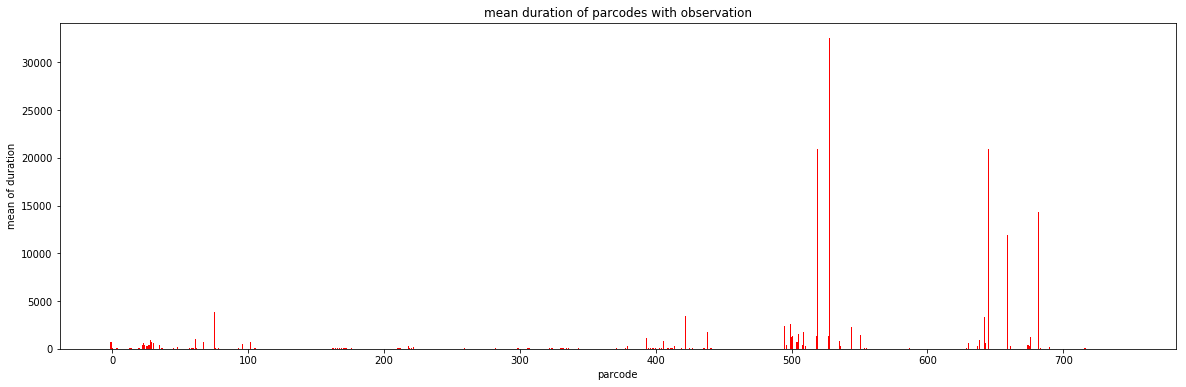

In [22]:
plt.figure(figsize=(20,6))
plt.bar(Has_obser,Has_obser_mean,color='r')
plt.xlabel('parcode')
plt.ylabel('mean of duration')
plt.title('mean duration of parcodes with observation')
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


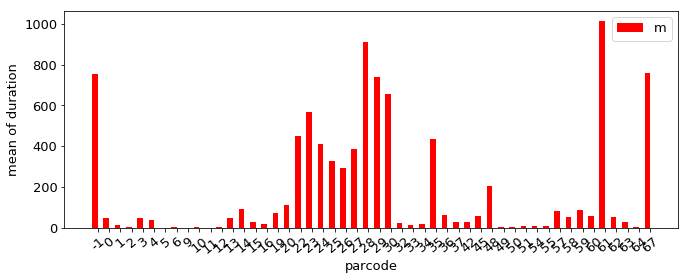

In [23]:
##### segment1 #####
plt.rc('font', family='SimHei', size=13)
x = Has_obser[:50]
width = 0.5
idx = np.arange(len(x))
plt.bar(idx, Has_obser_mean[:50], width, color='red')
plt.xlabel('parcode')
plt.ylabel('mean of duration')
plt.xticks(idx+width/2, x, rotation=40)
plt.legend('mean duration of parcodes with observation')
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


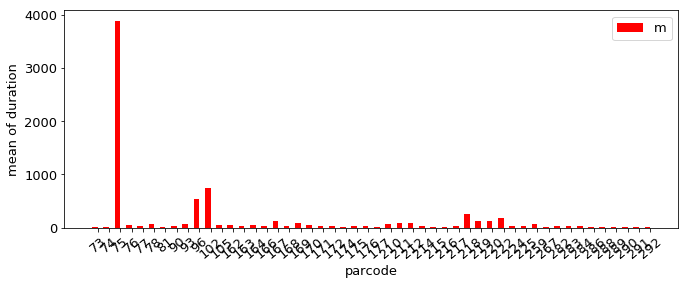

In [24]:
##### segment2 #####
plt.rc('font', family='SimHei', size=13)
x = Has_obser[50:100]
width = 0.5
idx = np.arange(len(x))
plt.bar(idx, Has_obser_mean[50:100], width, color='red')
plt.xlabel('parcode')
plt.ylabel('mean of duration')
plt.xticks(idx+width/2, x, rotation=40)
plt.legend('mean duration of parcodes with observation')
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


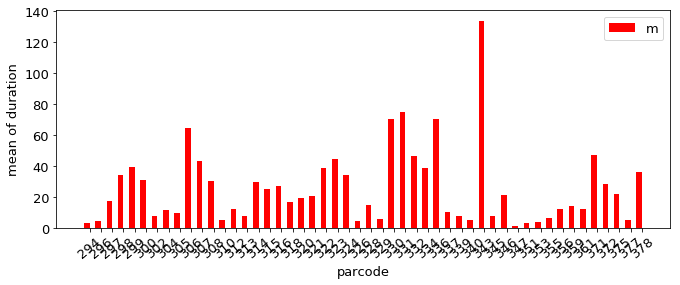

In [25]:
##### segment3 #####
plt.rc('font', family='SimHei', size=13)
x = Has_obser[100:150]
width = 0.5
idx = np.arange(len(x))
plt.bar(idx, Has_obser_mean[100:150], width, color='red')
plt.xlabel('parcode')
plt.ylabel('mean of duration')
plt.xticks(idx+width/2, x, rotation=40)
plt.legend('mean duration of parcodes with observation')
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


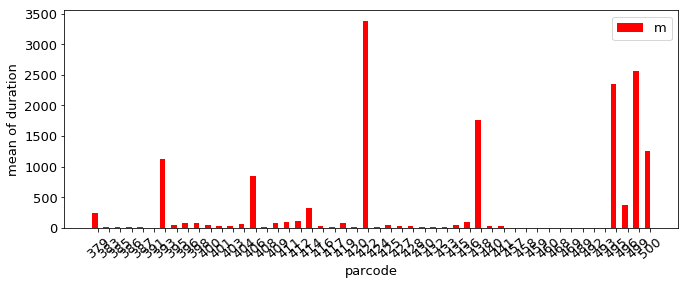

In [26]:
##### segment4 #####
plt.rc('font', family='SimHei', size=13)
x = Has_obser[150:200]
width = 0.5
idx = np.arange(len(x))
plt.bar(idx, Has_obser_mean[150:200], width, color='red')
plt.xlabel('parcode')
plt.ylabel('mean of duration')
plt.xticks(idx+width/2, x, rotation=40)
plt.legend('mean duration of parcodes with observation')
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


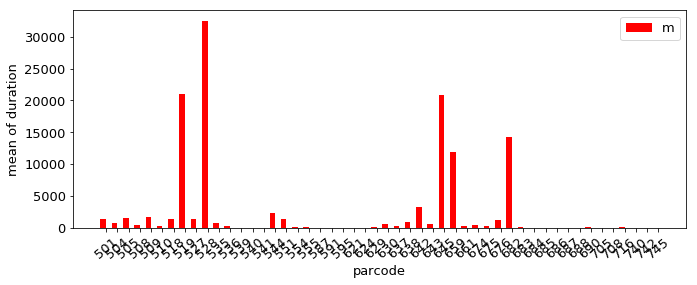

In [27]:
##### segment5 #####
plt.rc('font', family='SimHei', size=13)
x = Has_obser[200:250]
width = 0.5
idx = np.arange(len(x))
plt.bar(idx, Has_obser_mean[200:250], width, color='red')
plt.xlabel('parcode')
plt.ylabel('mean of duration')
plt.xticks(idx+width/2, x, rotation=40)
plt.legend('mean duration of parcodes with observation')
plt.show()

In [28]:
##### All alarm types has no observations #####
# print(No_obser)

In [29]:
##### All alarm types have observations ####
# print(Has_obser)

##### Use mean of alarm duration to preprocess?

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


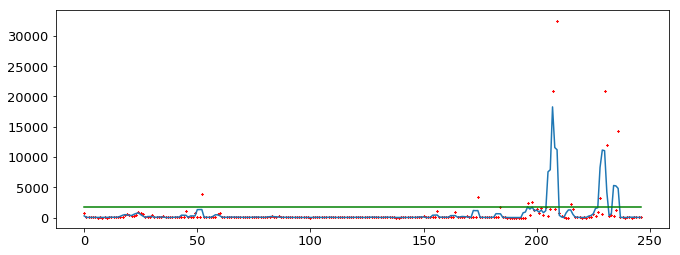

In [30]:
# low path filter
##### not use this filter this time #####
s = [np.mean(Has_obser_mean[k:k+3]) for k in range(len(Has_obser_mean)-3)]
plt.plot(range(len(s)),s)
plt.scatter(range(len(s)),Has_obser_mean[:-3],s=2,marker='x',c='r')
plt.plot(range(len(s)),[1800]*len(s),c='g') # 300 is hyperparameter
plt.show()

In [31]:
#### which need to remove? ####
parcode_elim = []
#for i in range(len(Has_obser)):
#    if Has_obser_mean[i]>=1800:
#        parcode_elim.append(Has_obser[i])

In [32]:
##### only choose to use low path filter, there are influence #####
# parcode_elim

In [33]:
# parcode_elim

In [34]:
#### selected parcode ####
#for i in range(len(parcode_elim)):
#    print(i)
#    j = parcode_elim[i]
#    print(j)
#    Has_obser.remove(j)

In [35]:
#### Discard_list: all parcode need to discard
Discard_list = parcode_elim
Discard_list.append(-1)
# Discard_list.append(636)

In [36]:
##### with preprocessing #####
# Discard_list

In [37]:
##### without preprocessing #####
Discard_list

[-1]

In [38]:
Has_obser_remain=Has_obser

In [39]:
#### this is parcode remained #####
# before discarding
Has_obser_remain

[-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 32,
 33,
 34,
 35,
 36,
 37,
 42,
 45,
 48,
 49,
 50,
 51,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 67,
 73,
 74,
 75,
 76,
 77,
 78,
 81,
 90,
 93,
 96,
 102,
 105,
 162,
 163,
 164,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 174,
 175,
 176,
 177,
 210,
 211,
 212,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 222,
 224,
 225,
 259,
 267,
 282,
 283,
 284,
 286,
 288,
 289,
 290,
 291,
 292,
 294,
 296,
 297,
 298,
 299,
 300,
 302,
 304,
 305,
 306,
 307,
 308,
 310,
 312,
 313,
 314,
 315,
 316,
 318,
 320,
 321,
 322,
 323,
 324,
 326,
 328,
 329,
 330,
 331,
 332,
 334,
 336,
 337,
 339,
 340,
 343,
 345,
 346,
 347,
 351,
 353,
 355,
 356,
 359,
 361,
 371,
 372,
 375,
 377,
 378,
 379,
 383,
 385,
 386,
 387,
 391,
 393,
 395,
 396,
 398,
 400,
 401,
 403,
 404,
 406,
 408,
 409,
 411,
 412,
 414,
 416,
 417,
 419,
 420,
 422,
 424,
 425,
 427,


In [40]:
#### eliminate Discard list from patient_alarm_record ####
def eliminate_func(alarm,discard_list=Discard_list):
    alarm_discarded = alarm
    for i in range(len(Discard_list)):
        j = Discard_list[i]
        alarm_discarded = alarm_discarded[alarm_discarded['AlarmParcode']!=j]
    return alarm_discarded

#### preprocess example

In [42]:
############ EXAMPLE Start ################

In [43]:
#### remove lines based on Discard_list####
patient2221 = PATIENT[0]
alarm2221 = patient2221.patient_alarm_record()
alarm2221 = eliminate_func(alarm2221)

In [44]:
#### list of patient's alarm duration####
alarm_duration2221 = list(alarm2221['AlarmDuration'])
alarm_duration2221 = to_int(alarm_duration2221)

In [45]:
#for t in alarmtype2221:
#    print('For patient 2221, when parcode is {}, mean = {}'.format(t,np.mean(alarm2221.AlarmDuration[alarm2221.AlarmParcode==t])))

In [46]:
phydata2221=patient2221.patient_physiological_data()

In [47]:
'''
def get_alarmIinfo_sequence(alarmtable_index):
    pattern = re.compile(r'([A-Z]+\d*\s*)+|\s')
    sequence = []
    for row in alarmtable_index.iterrows():
        if not isinstance(row[1]['AlarmMessage'],str):
            m = 'nan'
        else:
            m = pattern.match(row[1]['AlarmMessage'])
            m = m.group()
        sequence.append(m)
    return sequence
'''

"\ndef get_alarmIinfo_sequence(alarmtable_index):\n    pattern = re.compile(r'([A-Z]+\\d*\\s*)+|\\s')\n    sequence = []\n    for row in alarmtable_index.iterrows():\n        if not isinstance(row[1]['AlarmMessage'],str):\n            m = 'nan'\n        else:\n            m = pattern.match(row[1]['AlarmMessage'])\n            m = m.group()\n        sequence.append(m)\n    return sequence\n"

###### utility function

In [48]:
# just in selected data
def get_alarmIinfo_sequence(alarm,eliminate = Discard_list):    
    sequence = []
    for x in list(alarm['AlarmParcode']):
        if x not in Discard_list:
            sequence.append(x)
    return sequence

In [49]:
# transfer input sequence of alarm type to categorical data
selected_parcode = Has_obser_remain
def one_hot_coding_af(y):
    # one hot coding for alarm information
    # combine with threshould: 
    N = len(y)
    L = len(set(selected_parcode))
    y_level = list(set(selected_parcode))
    Y = np.zeros((N,L))
    for n in range(N):
        ind = y_level.index(y[n])
        Y[n,ind] = 1
    return Y

###### alarm[t] =?= alarm[t+1]

In [50]:
alarmInfo_sequence2221=get_alarmIinfo_sequence(alarm2221)

In [51]:
#### use one hot coding to present the alarm type sequence####
alarm_info_Input = one_hot_coding_af(alarmInfo_sequence2221)

In [52]:
#### duration thre ####
#thre = np.percentile(alarm_duration2221,80)
thre = 5

In [53]:
#### logit_alarmconti: logits whether same as previous ####
logit_alarmconti = map(lambda x,y: int(x==y),alarmInfo_sequence2221[:-1],alarmInfo_sequence2221[1:])

In [54]:
logit_alarmconti = list(logit_alarmconti)

In [55]:
# list of logit: whether it is same as previous type
alarm_conti2221 = [0]+logit_alarmconti

###### duration ?>  thre & duration ?< 97.5 percentile

In [56]:
alarm_dur2221 = map(lambda d:int(d > thre and d<np.percentile(alarm2221['AlarmDuration'],95)),alarm2221['AlarmDuration'])

In [57]:
def duration_function(alarm, thre, percentile):
    alarm_dur = []
    alarm_duration = list(alarm['AlarmDuration'])
    alarm_duration = to_int(alarm_duration)
    alarm_parcode = alarm['AlarmParcode']
    parcode_percentile = list(map(lambda x: np.percentile(Parcode_duration_dict[x],percentile),alarm_parcode))
    for i in range(len(alarm_duration)):
        d = alarm_duration[i]
        logi = int(d>thre and d<parcode_percentile[i])
        alarm_dur.append(logi)
    return alarm_dur        

In [58]:
#### alarm_dur list of logits: whether duration is larger than thre####
alarm_dur2221 = duration_function(alarm2221,thre,97.5)

In [59]:
############# EXAMPLE END ################

### transfer to categorical observation

In [60]:
##### conti + dur ---> categorical ####
def transfer_func(conti,dur):
    # j == 1, based on observation, we say that this is an alarm
    # j =1 and i = 0: True
    state = []
    for i,j in zip(conti,dur):
        if i==j:
            if j==1:
                s = 3
            else:
                s = 0
        else:
            if j==1:
                s = 2
            else:
                s = 1
        state.append(s)
    return state

In [61]:
state2221 = transfer_func(alarm_conti2221,alarm_dur2221)

In [62]:
#### general one hot coding####
def one_hot_coding(X,k):
    N = len(X)
    Y = np.zeros((N,k))
    for i in range(len(X)):
        Y[i,X[i]-1] = 1
    return Y

##### TEST

In [189]:
len(AlarmTable[AlarmTable['ID']==2246])

12401

In [188]:
All_ID[21]

2246

In [190]:
len(states1[21])

12398

In [187]:
for i in range(len(All_ID)):
    L = len(AlarmTable[AlarmTable['ID']==All_ID[i]])==len(states1[i])
    print(i,L)

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 False
17 True
18 True
19 True
20 True
21 False
22 True
23 True
24 True
25 True
26 True
27 True
28 True
29 True
30 True
31 True
32 True
33 True
34 True
35 True
36 True
37 True
38 True
39 True
40 True
41 True
42 True
43 True
44 True
45 True
46 False
47 True
48 True
49 True
50 False
51 True
52 True
53 True
54 True
55 True
56 True
57 True
58 True
59 True
60 True
61 True
62 True
63 True
64 True
65 True
66 False
67 True
68 True
69 True
70 True
71 True
72 True
73 False
74 True
75 True
76 True
77 True
78 True
79 True
80 True
81 False
82 True
83 True
84 True
85 True
86 True
87 True
88 True
89 True
90 True
91 True
92 True
93 True
94 True
95 True
96 True
97 True
98 True
99 True
100 True
101 False
102 False
103 True
104 True
105 True
106 True
107 True
108 True
109 True
110 True
111 True
112 True
113 True
114 True
115 True
116 True
117 True
118 True
119 True
120 True
121 True
122

In [191]:
AlarmTable[AlarmTable['AlarmParcode']==-1]

ID  alarmstarttime  AlarmLevel  AlarmParcode  AlarmMessage  \
29252    2241          308590           0            -1           NaN   
29262    2241          314810           0            -1           NaN   
50282    2246          526330           3            -1  TMP CAL FAIL   
50284    2246          526875           3            -1  TMP CAL FAIL   
50285    2246          526943           3            -1  TMP CAL FAIL   
121546   2275          851280           0            -1           NaN   
139330   2279         1137338           0            -1           NaN   
172612   2298          289996           5            -1       PCCO Hi   
172614   2298          290002           5            -1       PCCO Hi   
172616   2298          290008           5            -1       PCCO Hi   
172618   2298          290014           5            -1       PCCO Hi   
172620   2298          290021           5            -1       PCCO Hi   
172622   2298          290028           5            -1       PCCO Hi   
172624   2298          290036           5            -1       PCCO Hi   
172626   2298          290043           5            -1       PCCO Hi   
199970   2305          376967           3            -1           NaN   
200019   2305          381667           3            -1           NaN   
200638   2305          431685           3            -1           NaN   
200657   2305          441088           3            -1           NaN   
200699   2305          454045           3            -1           NaN   
200752   2305          458291           3            -1           NaN   
200753   2305          458298           3            -1           NaN   
200754   2305          458306           3            -1           NaN   
200939   2305          495711           3            -1           NaN   
200940   2305          495718           3            -1           NaN   
201049   2305          503738           3            -1           NaN   
201478   2305          510283           3            -1           NaN   
216710   2313          323196           3            -1           NaN   
216872   2313          328926           3            -1           NaN   
217565   2313          405711           3            -1           NaN   
...       ...             ...         ...           ...           ...   
665803   2555          920161           5            -1       PCCO Lo   
666232   2555          968326           5            -1       PCCO Hi   
666233   2555          968327           5            -1       PCCO Hi   
666247   2555          975173           5            -1       PCCO Lo   
666248   2555          975174           5            -1       PCCO Lo   
666265   2555          976719           5            -1       PCCO Hi   
666270   2555          977826           5            -1       PCCO Lo   
666271   2555          977827           5            -1       PCCO Lo   
666289   2555          984896           5            -1       PCCO Hi   
666290   2555          984897           5            -1       PCCO Hi   
666292   2555          984931           5            -1       PCCO Lo   
666293   2555          984932           5            -1       PCCO Lo   
666322   2555         1003717           5            -1       PCCO Hi   
666323   2555         1003718           5            -1       PCCO Hi   
666324   2555         1003721           5            -1       PCCO Lo   
666325   2555         1003722           5            -1       PCCO Lo   
703351  10105          205672           6            -1       SvO2 Lo   
703354  10105          208485           6            -1       SvO2 Lo   
703672  10105          271211           6            -1       SvO2 Lo   
703675  10105          271424           6            -1       SvO2 Lo   
703876  10105          343597           6            -1       SvO2 Lo   
703883  10105          345535           6            -1       SvO2 Lo   
703888  10105          349245           6            -1       SvO2 Lo

### Generate Training Data

In [63]:
#### take the structure into output categories
###### critical step #######
states1 = []
states2 = []
Alarm_Info_Input = []
for i in range(len(All_ID)):
    patient = PATIENT[i]
    alarm = patient.patient_alarm_record()
    alarm = eliminate_func(alarm) ### see elim func, other parameter: Discard list(Here: -1)
    alarmInfo_sequence=get_alarmIinfo_sequence(alarm)
    alarm_duration = list(alarm['AlarmDuration'])
    alarm_duration = to_int(alarm_duration)
    alarm_info_input = one_hot_coding_af(alarmInfo_sequence)
    logit_alarmconti = map(lambda x,y: int(x==y),alarmInfo_sequence[:-1],alarmInfo_sequence[1:])
    logit_alarmconti = list(logit_alarmconti)
    alarm_conti = [0]+logit_alarmconti ### alarm_conti: whether same type as last one
    alarm_dur = duration_function(alarm,thre,97.5)
    state = transfer_func(alarm_conti,alarm_dur)
    print(i,len(AlarmTable[AlarmTable['ID']==All_ID[i]])==len(state))
    states1.append(state)
    states2.append(alarm_dur)
    Alarm_Info_Input.append(alarm_info_input)

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 False
17 True
18 True
19 True
20 True
21 False
22 True
23 True
24 True
25 True
26 True
27 True
28 True
29 True
30 True
31 True
32 True
33 True
34 True
35 True
36 True
37 True
38 True
39 True
40 True
41 True
42 True
43 True
44 True
45 True
46 False
47 True
48 True
49 True
50 False
51 True
52 True
53 True
54 True
55 True
56 True
57 True
58 True
59 True
60 True
61 True
62 True
63 True
64 True
65 True
66 False
67 True
68 True
69 True
70 True
71 True
72 True
73 False
74 True
75 True
76 True
77 True
78 True
79 True
80 True
81 False
82 True
83 True
84 True
85 True
86 True
87 True
88 True
89 True
90 True
91 True
92 True
93 True
94 True
95 True
96 True
97 True
98 True
99 True
100 True
101 False
102 False
103 True
104 True
105 True
106 True
107 True
108 True
109 True
110 True
111 True
112 True
113 True
114 True
115 True
116 True
117 True
118 True
119 True
120 True
121 True
122

In [64]:
np.array(states1).shape

(489,)

In [65]:
####total 489 patient####

In [66]:
cd ..

/Users/zehaodong/Desktop/alarm_fatigue


In [67]:
cd Preprocessing

/Users/zehaodong/Desktop/alarm_fatigue/Preprocessing


### HMM

In [68]:
from Multinomial_hmm import Multinomial_HMM

In [69]:
# length of observation
for i in range(2249-2221):
    print(len(states1[i]),i)

1612 0
300 1
3083 2
78 3
4333 4
1766 5
1947 6
229 7
1664 8
128 9
430 10
8808 11
1743 12
34 13
1128 14
1306 15
4370 16
69 17
1347 18
5554 19
4512 20
12398 21
5705 22
2943 23
3081 24
3444 25
37 26
4814 27


In [70]:
hmm = Multinomial_HMM(2,4)

iteration: 0
iteration: 10
iteration: 20
iteration: 30
iteration: 40
iteration: 50
iteration: 60
iteration: 70
initial distribtion: [ 0.16404101  0.83595899]
transition matrix of hidden markov chain: [[ 0.41379539  0.58620461]
 [ 0.56349587  0.43650413]]
multinomial emission distribution: [[ 0.28453196  0.28400044  0.15480127  0.27666633]
 [ 0.17337648  0.3019504   0.27405173  0.25062139]]


/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


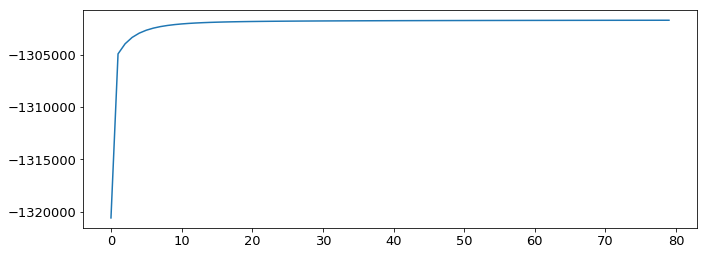

In [71]:
hmm.fit_jagged_array(states1,max_iter=80)

In [68]:
###### Viterbi algorithm: find the optimal sequence of true or false ######

In [69]:
hmm.Viterbi(states1[0])

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

In [70]:
hmm.Viterbi(states1[1])

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0], d

In [71]:
print(hmm.Viterbi(states1[2]))

[1 0 1 ..., 0 0 0]


In [72]:
hmm.Viterbi(states1[3])

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int32)

In [152]:
#plt.scatter(alarm2221['alarmstarttime'],alarm2221['AlarmDuration'],s=1)
#plt.show()

In [153]:
thre = 5

### patient 2221 case

In [179]:
patient2221 = PATIENT[0]
alarm2221 = patient2221.patient_alarm_record()
phydata2221=patient2221.patient_physiological_data()
alarmInfo_sequence2221=get_alarmIinfo_sequence(alarm2221)
alarm_duration2221 = alarm2221['AlarmDuration']
thre = np.percentile(alarm_duration2221,80)
logit_alarmconti = map(lambda x,y: int(x==y),alarmInfo_sequence2221[:-1],alarmInfo_sequence2221[1:])
logit_alarmconti = list(logit_alarmconti)
alarm_conti2221 = [0]+logit_alarmconti

In [180]:
alarm_dur2221 = states2[0]
state2221 = transfer_func(alarm_conti2221,alarm_dur2221)

In [181]:
### same result from hidden units and the alarm-duration based classifier
hidden_equal_durationClasify = list(filter(lambda t: t == 1, np.array(alarm_dur2221)==hmm.Viterbi(states1[0])))

In [182]:
len(hidden_equal_durationClasify)/len(state2221)

0.5632754342431762

In [183]:
len(hmm.Viterbi(states1[0]))

1612

In [184]:
# filt out rate
len(list(filter(lambda t: t == 0, hmm.Viterbi(states1[0]))))/len(hmm.Viterbi(states1[0]))

0.8715880893300249

In [185]:
### larger than 0.8, since alarm which has a same type of previous alarm will be encouraged to filted out 

In [186]:
########## other test: proportion of true alarm for each alarm type #############
# true_lines, false_lines are label of true or false
mark_true = hmm.Viterbi(states1[0])
true_lines = list(filter(lambda z: z[0]==1, zip(mark_true,range(len(mark_true)))))
true_lines = [z[1] for z in true_lines]

In [187]:
mark_false = 1-mark_true
false_lines = list(filter(lambda z: z[0]==1, zip(mark_false,range(len(mark_false)))))
false_lines = [z[1] for z in false_lines]

In [188]:
len(true_lines)/(len(false_lines)+len(true_lines))

0.12841191066997518

In [189]:
###### all alarm type and count for each type ######
patient_info = PATIENT[0].patient_alarm_record()
all_parcode = list(patient_info['AlarmParcode'])
all_type = list(set(all_parcode))
true_dict = {i:all_parcode.count(i) for i in all_type} 

In [190]:
###### generate a dictionary, key: false type, value: number #######
false_info = alarm2221.iloc[false_lines,:]
false_parcode = list(false_info['AlarmParcode'])
false_info = [false_parcode.count(i) for i in all_type]

In [191]:
###### generate a dictionary, key: true type, value: number #######
true_info = alarm2221.iloc[true_lines,:]
true_parcode = list(true_info['AlarmParcode'])
true_info=[true_parcode.count(i) for i in all_type]

In [192]:
all_type

[3,
 9,
 10,
 12,
 15,
 19,
 20,
 22,
 24,
 282,
 283,
 32,
 290,
 163,
 35,
 37,
 298,
 171,
 48,
 306,
 51,
 55,
 314,
 315,
 322,
 330,
 212,
 220,
 624]

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


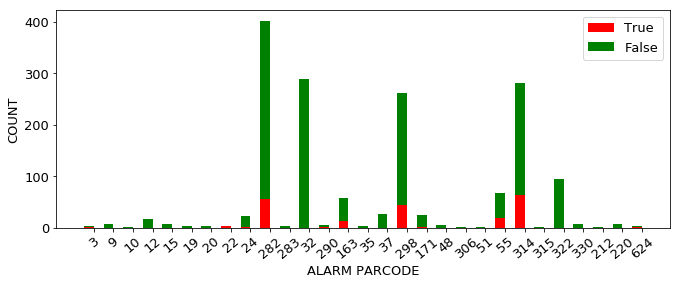

In [193]:
### PLOT ###
plt.rc('font', size=13)
x = all_type 
width = 0.5
idx = np.arange(len(x))
plt.bar(idx, true_info, width, color='red', label='True')
plt.bar(idx, false_info, width, bottom=true_info, color='green', label='False')
plt.xlabel('ALARM PARCODE')
plt.ylabel('COUNT')
plt.xticks(idx+width/2, x, rotation=40)
plt.legend()
plt.show()

In [194]:
print('parcode 282:',np.mean(Parcode_duration_dict[282]))
print('parcode 32:',np.mean(Parcode_duration_dict[32]))
print('parcode 163:',np.mean(Parcode_duration_dict[163]))
print('parcode 298:',np.mean(Parcode_duration_dict[298]))
print('parcode 55:',np.mean(Parcode_duration_dict[55]))
print('parcode 314:',np.mean(Parcode_duration_dict[314]))
print('parcode 322:',np.mean(Parcode_duration_dict[322]))

parcode 282: 33.4618863945
parcode 32: 25.8989886532
parcode 163: 39.5708195168
parcode 298: 34.2861634471
parcode 55: 7.8501572424
parcode 314: 29.5930671914
parcode 322: 38.5423746023


### Patient 2222 case

In [90]:
patient2222 = PATIENT[1]
alarm2222 = patient2222.patient_alarm_record()
phydata2222=patient2222.patient_physiological_data()
alarmInfo_sequence2222=get_alarmIinfo_sequence(alarm2222)
alarm_duration2222 = alarm2222['AlarmDuration']
thre = np.percentile(alarm_duration2222,80)
logit_alarmconti = map(lambda x,y: int(x==y),alarmInfo_sequence2222[:-1],alarmInfo_sequence2222[1:])
logit_alarmconti = list(logit_alarmconti)
alarm_conti2222 = [0]+logit_alarmconti

In [91]:
alarm_dur2222 = states2[1]

In [92]:
state2222 = transfer_func(alarm_conti2222,alarm_dur2222)

In [93]:
### same result from hidden units and the alarm-duration based classifier
hidden_equal_durationClasify = list(filter(lambda t: t == 1, np.array(alarm_dur2222)==hmm.Viterbi(states1[1])))

In [94]:
len(hidden_equal_durationClasify)/len(state2222)

0.65

In [95]:
# filt out rate
len(list(filter(lambda t: t == 0, hmm.Viterbi(states1[1]))))/len(state2222)

0.5

In [96]:
# other test
# true_lines, false_lines are label of true or false
mark_true = hmm.Viterbi(states1[1])
true_lines = list(filter(lambda z: z[0]==1, zip(mark_true,range(len(mark_true)))))
true_lines = [z[1] for z in true_lines]

In [97]:
mark_false = 1-mark_true
false_lines = list(filter(lambda z: z[0]==1, zip(mark_false,range(len(mark_false)))))
false_lines = [z[1] for z in false_lines]

In [98]:
#### get TURE DF and FALSE DF
false_info = alarm2222.iloc[false_lines,:]
true_info = alarm2222.iloc[true_lines,:]

In [99]:
###### all alarm type and count for each type ######
patient_info = PATIENT[1].patient_alarm_record()
all_parcode = list(patient_info['AlarmParcode'])
all_type = list(set(all_parcode))
true_dict = {i:all_parcode.count(i) for i in all_type} 

In [100]:
###### generate a dictionary, key: false type, value: number #######
false_parcode = list(false_info['AlarmParcode'])
false_info = [false_parcode.count(i) for i in all_type]

In [101]:
###### generate a dictionary, key: true type, value: number #######
true_parcode = list(true_info['AlarmParcode'])
true_info=[true_parcode.count(i) for i in all_type]

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


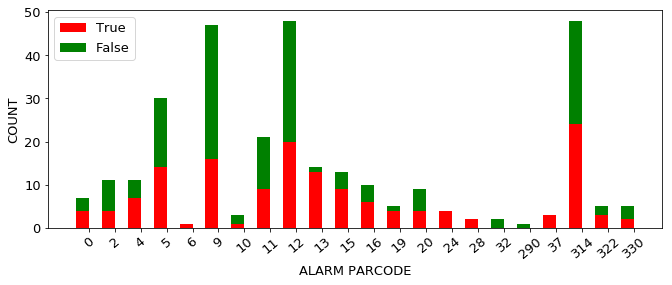

In [102]:
### PLOT ###
plt.rc('font', family='SimHei', size=13)
x = all_type
width = 0.5
idx = np.arange(len(x))
plt.bar(idx, true_info, width, color='red', label='True')
plt.bar(idx, false_info, width, bottom=true_info, color='green', label='False')
plt.xlabel('ALARM PARCODE')
plt.ylabel('COUNT')
plt.xticks(idx+width/2, x, rotation=40)
plt.legend()
plt.show()

In [103]:
print('parcode 5:',np.mean(Parcode_duration_dict[5]))
print('parcode 9:',np.mean(Parcode_duration_dict[9]))
print('parcode 12:',np.mean(Parcode_duration_dict[12]))
print('parcode 314:',np.mean(Parcode_duration_dict[314]))

parcode 5: 2.26056851312
parcode 9: 1.77654039993
parcode 12: 5.81968087686
parcode 314: 29.5930671914


### patient 2223 case

In [104]:
patient2223 = PATIENT[2]
alarm2223 = patient2223.patient_alarm_record()
phydata2223=patient2223.patient_physiological_data()
alarmInfo_sequence2223=get_alarmIinfo_sequence(alarm2223)  
alarm_duration2223 = alarm2223['AlarmDuration']
thre = np.percentile(alarm_duration2223,80)
logit_alarmconti = map(lambda x,y: int(x==y),alarmInfo_sequence2223[:-1],alarmInfo_sequence2223[1:])
logit_alarmconti = list(logit_alarmconti)
alarm_conti2223 = [0]+logit_alarmconti

In [105]:
alarm_dur2223 = states2[2]

In [106]:
hidden_equal_durationClasify = list(filter(lambda t: t == 1, np.array(alarm_dur2223)==hmm.Viterbi(states1[2])))

In [107]:
state2223 = transfer_func(alarm_conti2223,alarm_dur2223)

In [108]:
len(hidden_equal_durationClasify)/len(hmm.Viterbi(states1[2]))

0.5569250729808628

In [109]:
len(list(filter(lambda t: t == 0, hmm.Viterbi(states1[2]))))/len(state2223)

0.9377229970807655

In [110]:
# other test
# true_lines, false_lines are label of true or false
mark_true = hmm.Viterbi(states1[2])
true_lines = list(filter(lambda z: z[0]==1, zip(mark_true,range(len(mark_true)))))
true_lines = [z[1] for z in true_lines]

In [111]:
mark_false = 1-mark_true
false_lines = list(filter(lambda z: z[0]==1, zip(mark_false,range(len(mark_false)))))
false_lines = [z[1] for z in false_lines]

In [112]:
#### get TURE DF and FALSE DF
false_info = alarm2223.iloc[false_lines,:]
true_info = alarm2223.iloc[true_lines,:]

In [113]:
###### all alarm type and count for each type ######
patient_info = PATIENT[2].patient_alarm_record()
all_parcode = list(patient_info['AlarmParcode'])
all_type = list(set(all_parcode))
true_dict = {i:all_parcode.count(i) for i in all_type} 

In [114]:
###### generate a dictionary, key: false type, value: number #######
false_parcode = list(false_info['AlarmParcode'])
false_info = [false_parcode.count(i) for i in all_type]

In [115]:
###### generate a dictionary, key: true type, value: number #######
true_parcode = list(true_info['AlarmParcode'])
true_info=[true_parcode.count(i) for i in all_type]

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


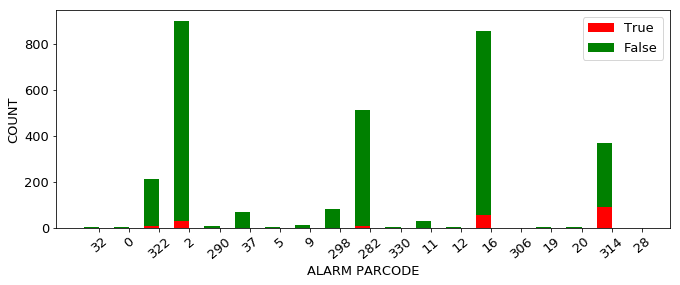

In [116]:
### PLOT ###
plt.rc('font', family='SimHei', size=13)
x = all_type
width = 0.5
idx = np.arange(len(x))
plt.bar(idx, true_info, width, color='red', label='True')
plt.bar(idx, false_info, width, bottom=true_info, color='green', label='False')
plt.xlabel('ALARM PARCODE')
plt.ylabel('COUNT')
plt.xticks(idx+width/2, x, rotation=40)
plt.legend()
plt.show()

### patient 2224 case

In [117]:
patient2224 = PATIENT[3]
alarm2224 = patient2224.patient_alarm_record()
phydata2224=patient2224.patient_physiological_data()
alarmInfo_sequence2224=get_alarmIinfo_sequence(alarm2224)
alarm_duration2224 = alarm2224['AlarmDuration']
thre = np.percentile(alarm_duration2224,80)
logit_alarmconti = map(lambda x,y: int(x==y),alarmInfo_sequence2224[:-1],alarmInfo_sequence2224[1:])
logit_alarmconti = list(logit_alarmconti)
alarm_conti2224 = [0]+logit_alarmconti

In [118]:
alarm_dur2224 = states2[3]

In [119]:
state2224 = transfer_func(alarm_conti2224,alarm_dur2224)

In [120]:
hidden_equal_durationClasify = list(filter(lambda t: t == 1, np.array(alarm_dur2224)==hmm.Viterbi(states1[3])))

In [121]:
len(hidden_equal_durationClasify)/len(state2224)

0.6153846153846154

In [122]:
len(list(filter(lambda t: t == 0, hmm.Viterbi(states1[3]))))/len(state2224)

0.47435897435897434

In [123]:
hmm.Viterbi(states1[3])

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int32)

In [124]:
np.array(alarm_dur2224)

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1])

In [125]:
# other test
# true_lines, false_lines are label of true or false
mark_true = hmm.Viterbi(states1[3])
true_lines = list(filter(lambda z: z[0]==1, zip(mark_true,range(len(mark_true)))))
true_lines = [z[1] for z in true_lines]

In [126]:
mark_false = 1-mark_true
false_lines = list(filter(lambda z: z[0]==1, zip(mark_false,range(len(mark_false)))))
false_lines = [z[1] for z in false_lines]

In [127]:
#### get TURE DF and FALSE DF
false_info = alarm2224.iloc[false_lines,:]
true_info = alarm2224.iloc[true_lines,:]

In [128]:
###### all alarm type and count for each type ######
patient_info = PATIENT[3].patient_alarm_record()
all_parcode = list(patient_info['AlarmParcode'])
all_type = list(set(all_parcode))
true_dict = {i:all_parcode.count(i) for i in all_type} 

In [129]:
###### generate a dictionary, key: false type, value: number #######
false_parcode = list(false_info['AlarmParcode'])
false_info = [false_parcode.count(i) for i in all_type]

In [130]:
###### generate a dictionary, key: true type, value: number #######
true_parcode = list(true_info['AlarmParcode'])
true_info=[true_parcode.count(i) for i in all_type]

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


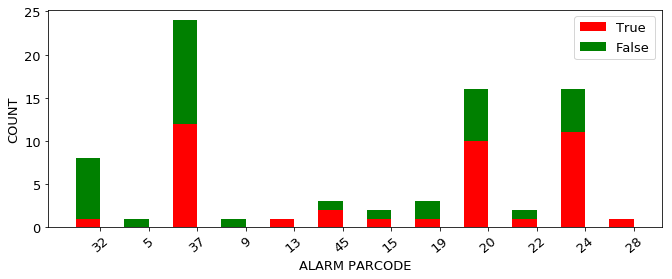

In [131]:
### PLOT ###
plt.rc('font', family='SimHei', size=13)
x = all_type
width = 0.5
idx = np.arange(len(x))
plt.bar(idx, true_info, width, color='red', label='True')
plt.bar(idx, false_info, width, bottom=true_info, color='green', label='False')
plt.xlabel('ALARM PARCODE')
plt.ylabel('COUNT')
plt.xticks(idx+width/2, x, rotation=40)
plt.legend()
plt.show()

In [135]:
len(states1)

489

### Performance Analysis 

In [151]:
####### All predictions from Viterbi algorithm ########
Hidden_states = []
for i in range(len(states1)):
    Hidden_states.append(hmm.Viterbi(states1[i]))

In [155]:
##### True_lines and False_lines have same meaning as before ######
True_lines = []
False_lines = []
for i in range(489):
    mark_true = hmm.Viterbi(states1[i])
    true_lines = list(filter(lambda z: z[0]==1, zip(mark_true,range(len(mark_true)))))
    true_lines = [z[1] for z in true_lines]
    True_lines.append(true_lines)
    mark_false = 1-mark_true
    false_lines = list(filter(lambda z: z[0]==1, zip(mark_false,range(len(mark_false)))))
    false_lines = [z[1] for z in false_lines]
    False_lines.append(false_lines)    

In [200]:
###### True dict and False dict #####
from collections import Counter
True_dict,False_dict = {},{}
for i in range(489):
    patient = PATIENT[i]
    alarm= patient.patient_alarm_record()
    # seperate true and false, (corresponding parcode)
    false_info = alarm.iloc[False_lines[i],:]
    false_parcode = list(false_info['AlarmParcode'])
    true_info = alarm.iloc[True_lines[i],:]
    true_parcode = list(true_info['AlarmParcode'])
    
    # generate the dictionary used to update
    patient_info = alarm
    all_parcode = list(patient_info['AlarmParcode'])
    all_type = sorted(list(set(all_parcode)))
    true_dict = {i:true_parcode.count(i) for i in all_type}
    false_dict = {i:false_parcode.count(i) for i in all_type}
    
    #update
    dict1_T, dict1_F = Counter(True_dict), Counter(False_dict)
    dict2_T, dict2_F = Counter(true_dict), Counter(false_dict)
    True_dict = dict(dict1_T + dict2_T)
    False_dict = dict(dict1_F + dict2_F)

In [205]:
T_info = sorted(True_dict.items())
F_info = sorted(False_dict.items())

In [225]:
#print(T_info)

In [226]:
#print(F_info)

###### visualization

In [221]:
all_observed_parcode = []
for ite in T_info:
    all_observed_parcode.append(ite[0])
for ite in F_info:
    all_observed_parcode.append(ite[0])
    all_observed_parcode = list(set(all_observed_parcode))
all_observed_parcode = sorted(all_observed_parcode)

In [222]:
T_all_info = [0] * len(all_observed_parcode)
F_all_info = [0] * len(all_observed_parcode)    
for ite in T_info:
    position = all_observed_parcode.index(ite[0])
    T_all_info[position] = ite[1]

for ite in F_info:
    position = all_observed_parcode.index(ite[0])
    F_all_info[position] = ite[1]    

In [232]:
len(F_all_info)

251

In [228]:
#print(F_all_info)

In [229]:
#print(T_all_info)

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


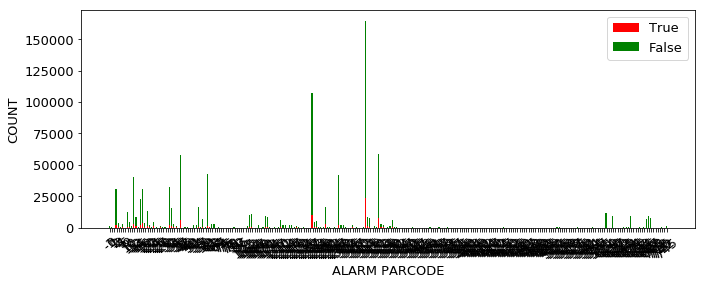

In [291]:
### PLOT ###
plt.rc('font', family='SimHei', size=13)
x = all_observed_parcode
width = 0.5
idx = np.arange(len(x))
plt.bar(idx, T_all_info, width, color='red', label='True')
plt.bar(idx, F_all_info, width, bottom=T_all_info, color='green', label='False')
plt.xlabel('ALARM PARCODE')
plt.ylabel('COUNT')
plt.xticks(idx+width/2, x, rotation=40)
plt.legend()
plt.show()

###### Hard to tell, use segment

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


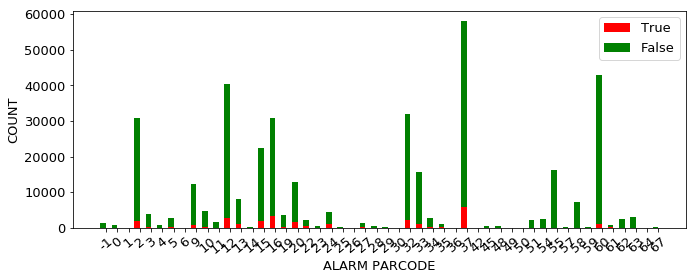

In [234]:
###### Segment1 #######
plt.rc('font', family='SimHei', size=13)
x = all_observed_parcode[:50]
width = 0.5
idx = np.arange(len(x))
plt.bar(idx, T_all_info[:50], width, color='red', label='True')
plt.bar(idx, F_all_info[:50], width, bottom=T_all_info[:50], color='green', label='False')
plt.xlabel('ALARM PARCODE')
plt.ylabel('COUNT')
plt.xticks(idx+width/2, x, rotation=40)
plt.legend()
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


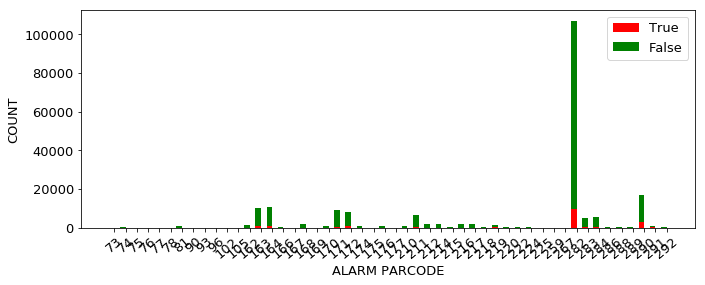

In [235]:
###### Segment2 #######
plt.rc('font', family='SimHei', size=13)
x = all_observed_parcode[50:100]
width = 0.5
idx = np.arange(len(x))
plt.bar(idx, T_all_info[50:100], width, color='red', label='True')
plt.bar(idx, F_all_info[50:100], width, bottom=T_all_info[50:100], color='green', label='False')
plt.xlabel('ALARM PARCODE')
plt.ylabel('COUNT')
plt.xticks(idx+width/2, x, rotation=40)
plt.legend()
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


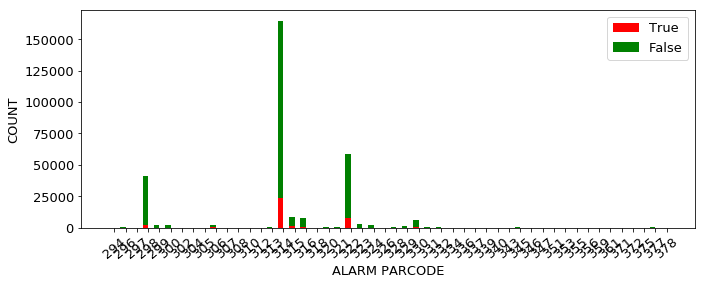

In [236]:
###### Segment3 #######
plt.rc('font', family='SimHei', size=13)
x = all_observed_parcode[100:150]
width = 0.5
idx = np.arange(len(x))
plt.bar(idx, T_all_info[100:150], width, color='red', label='True')
plt.bar(idx, F_all_info[100:150], width, bottom=T_all_info[100:150], color='green', label='False')
plt.xlabel('ALARM PARCODE')
plt.ylabel('COUNT')
plt.xticks(idx+width/2, x, rotation=40)
plt.legend()
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


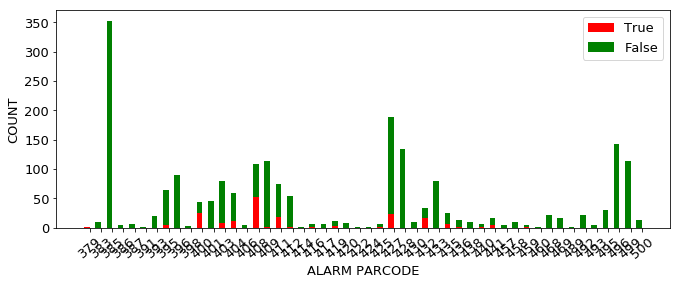

In [237]:
###### Segment4 #######
plt.rc('font', family='SimHei', size=13)
x = all_observed_parcode[150:200]
width = 0.5
idx = np.arange(len(x))
plt.bar(idx, T_all_info[150:200], width, color='red', label='True')
plt.bar(idx, F_all_info[150:200], width, bottom=T_all_info[150:200], color='green', label='False')
plt.xlabel('ALARM PARCODE')
plt.ylabel('COUNT')
plt.xticks(idx+width/2, x, rotation=40)
plt.legend()
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


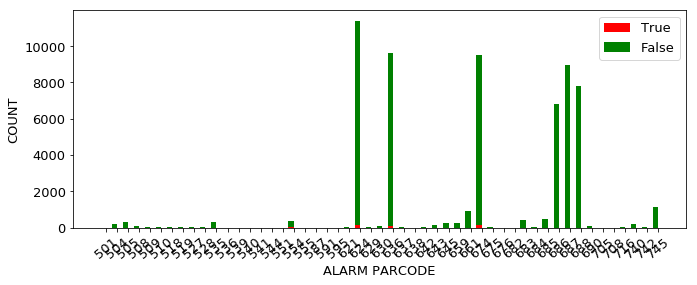

In [238]:
###### Segment5 #######
plt.rc('font', family='SimHei', size=13)
x = all_observed_parcode[200:251]
width = 0.5
idx = np.arange(len(x))
plt.bar(idx, T_all_info[200:251], width, color='red', label='True')
plt.bar(idx, F_all_info[200:251], width, bottom=T_all_info[200:251], color='green', label='False')
plt.xlabel('ALARM PARCODE')
plt.ylabel('COUNT')
plt.xticks(idx+width/2, x, rotation=40)
plt.legend()
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


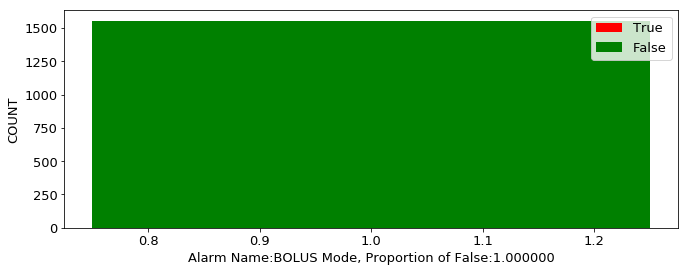

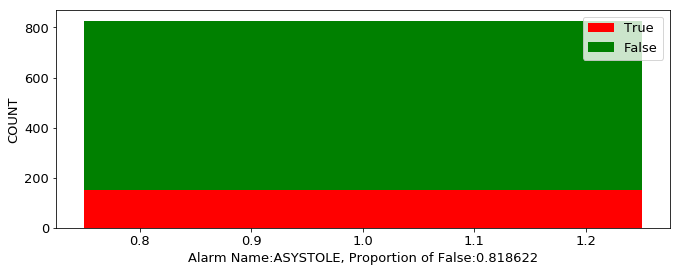

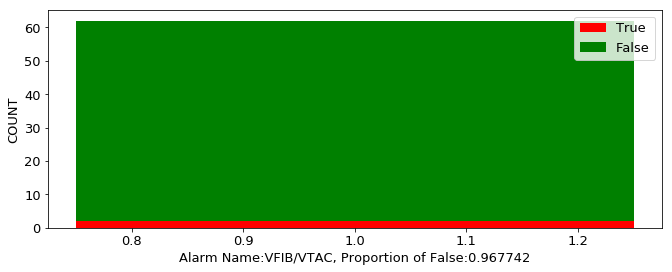

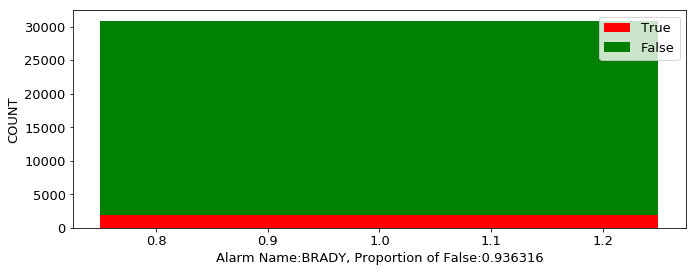

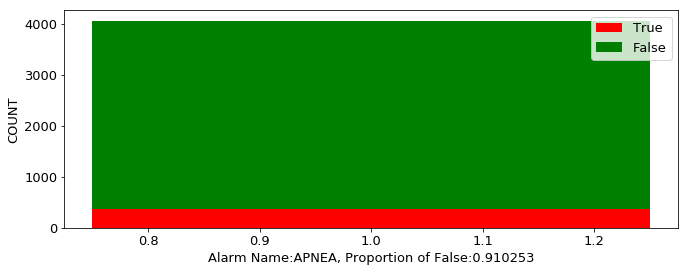

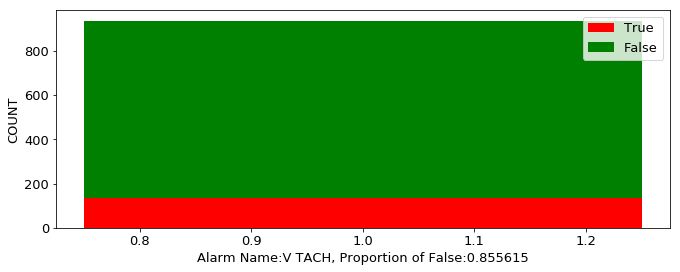

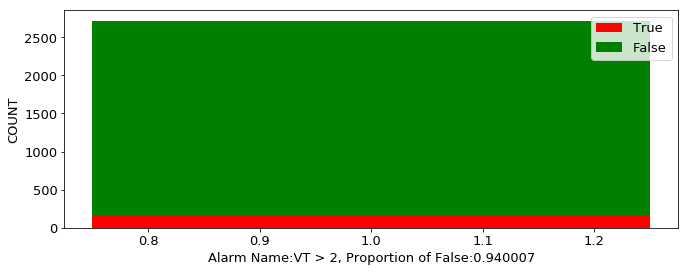

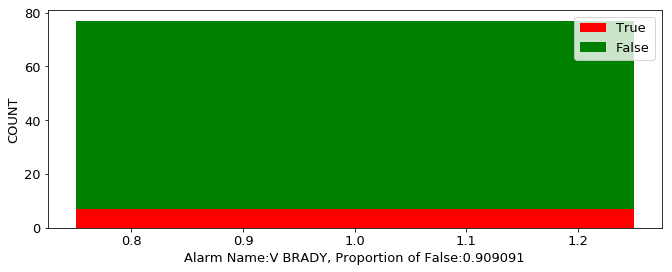

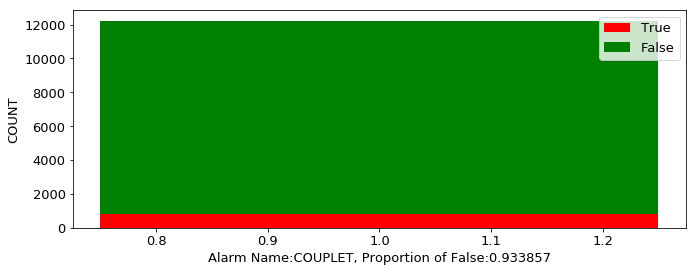

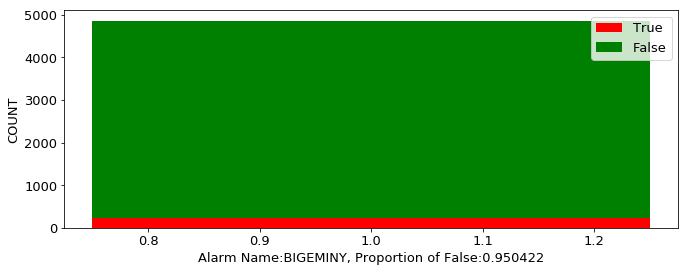

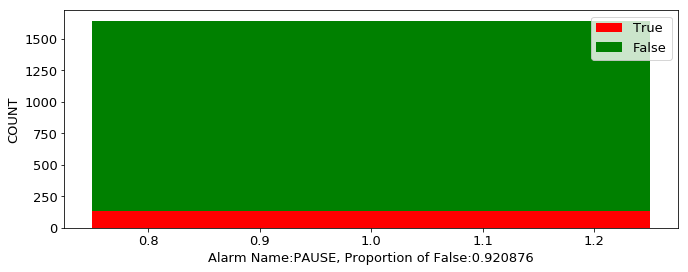

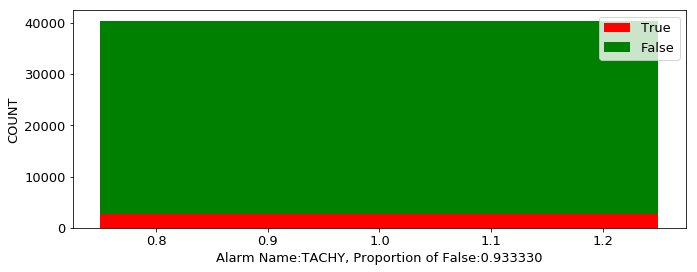

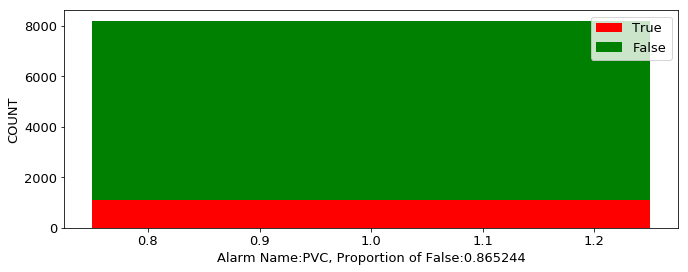

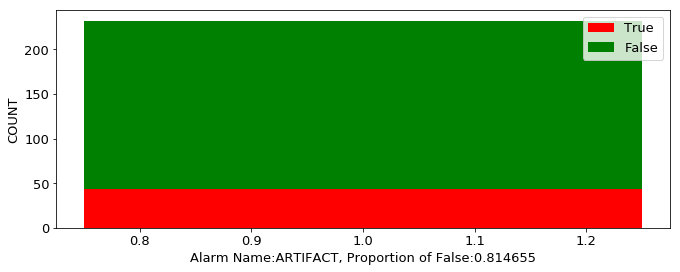

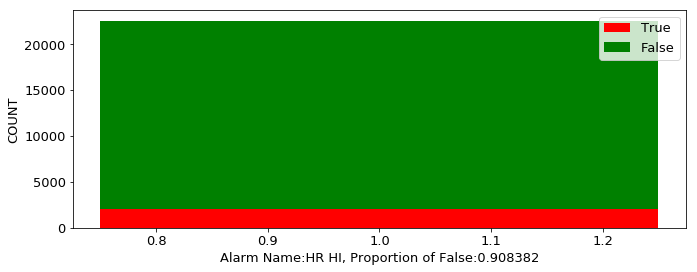

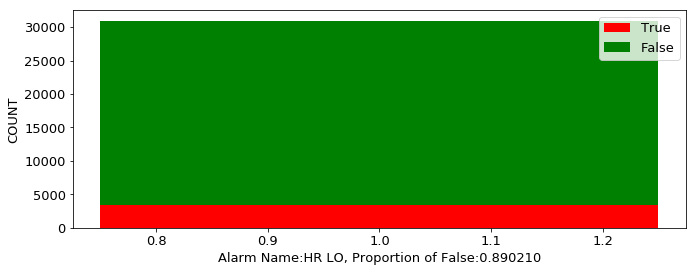

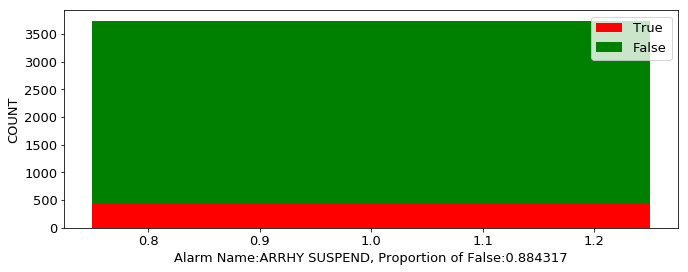

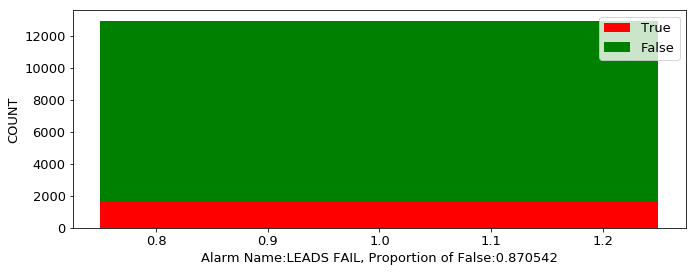

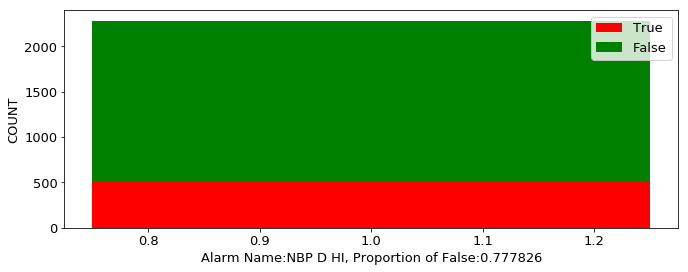

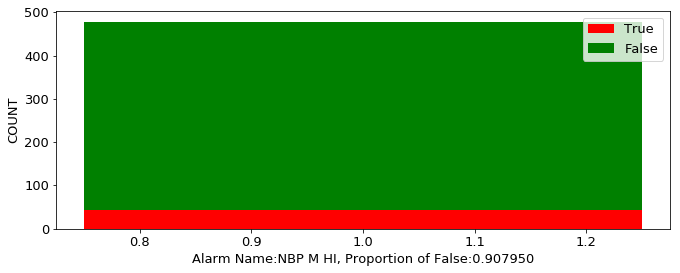

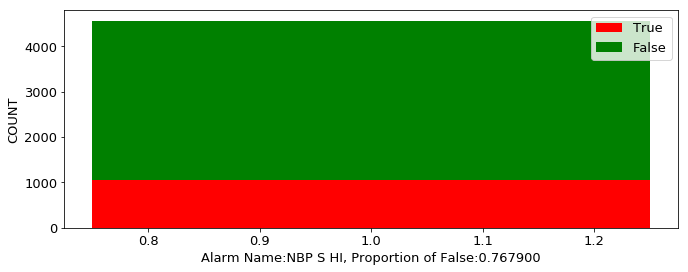

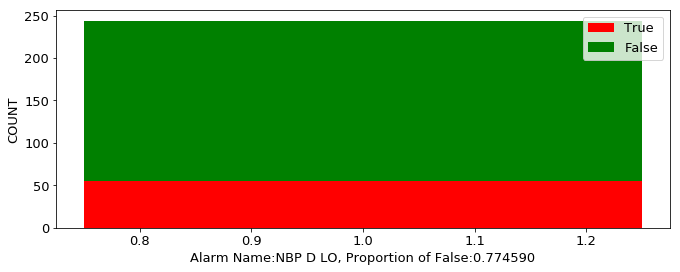

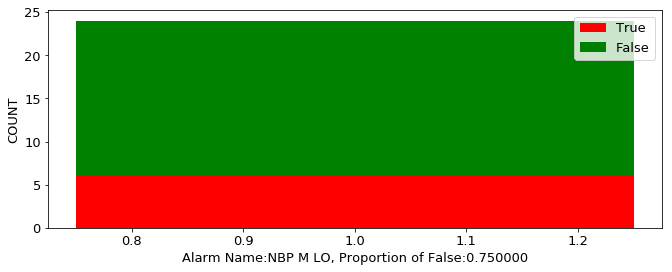

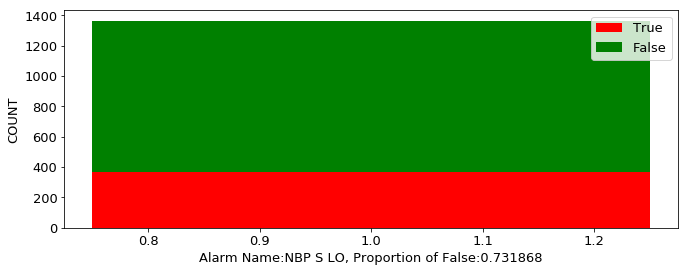

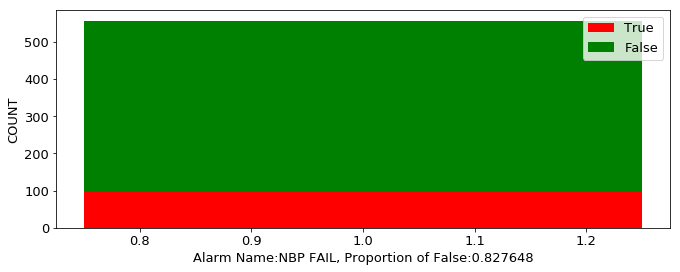

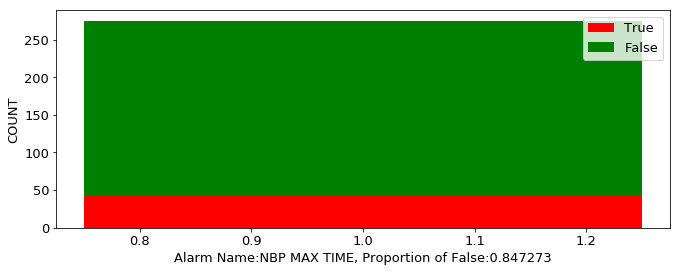

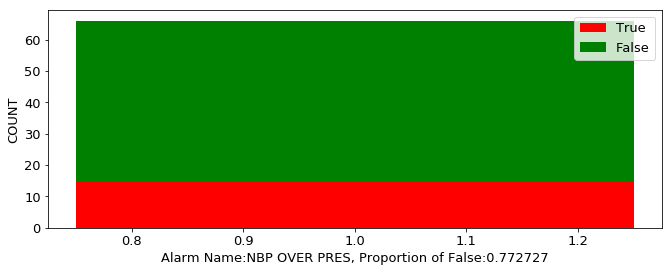

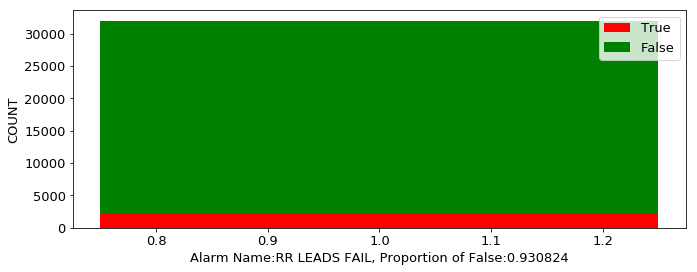

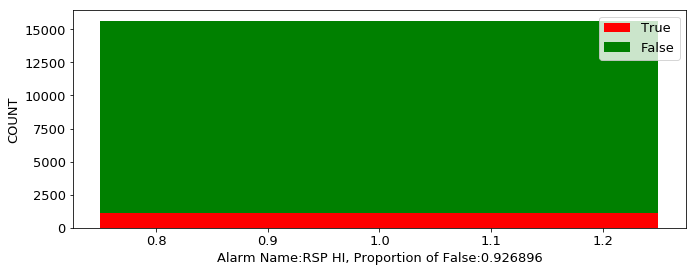

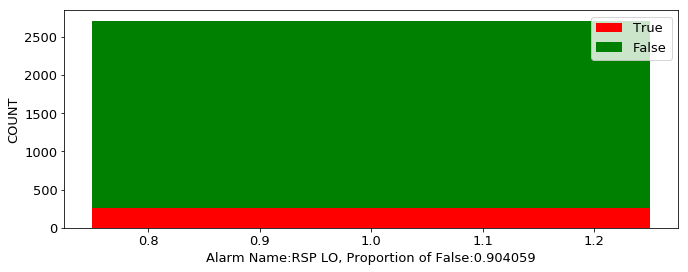

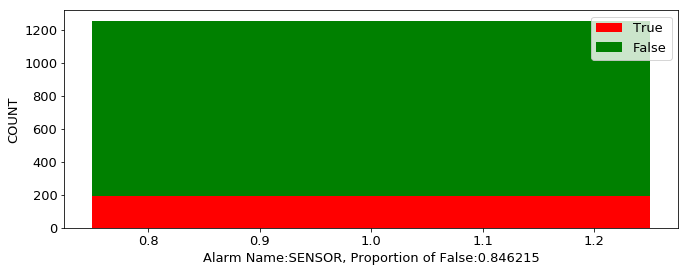

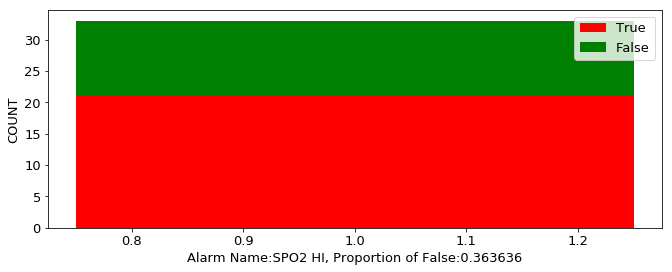

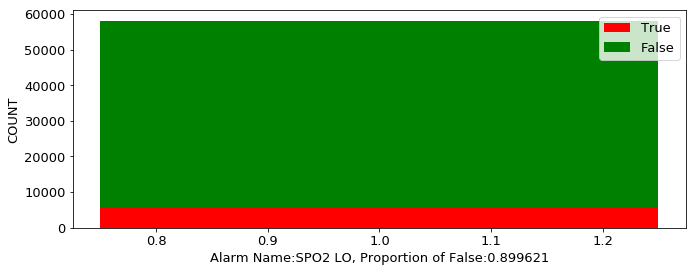

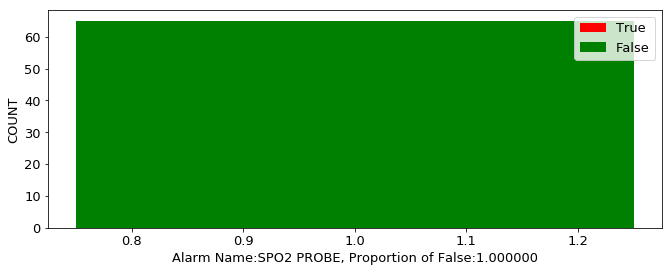

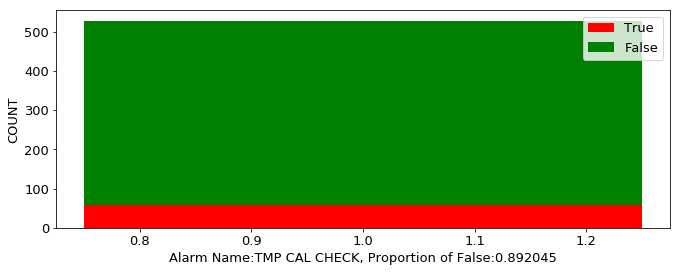

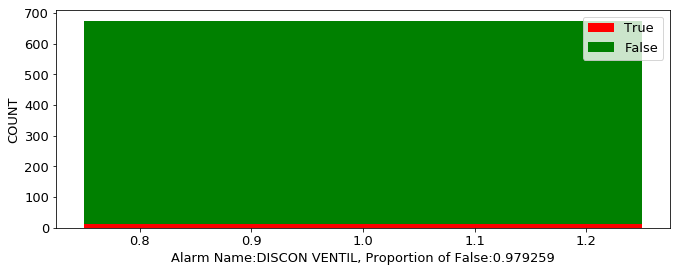

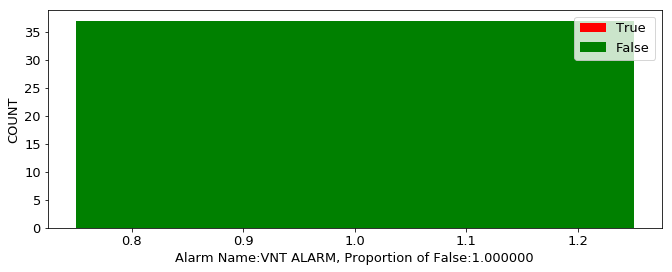

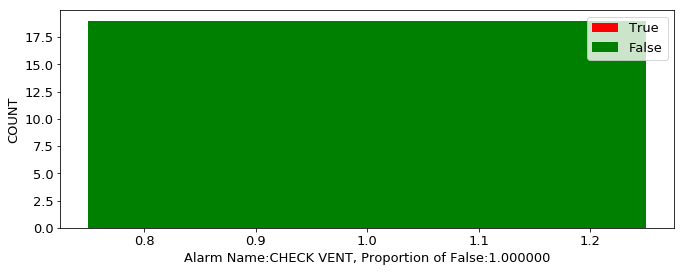

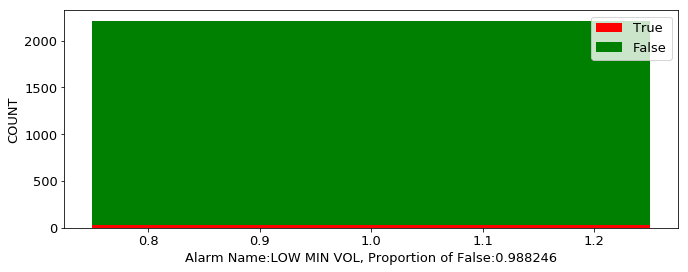

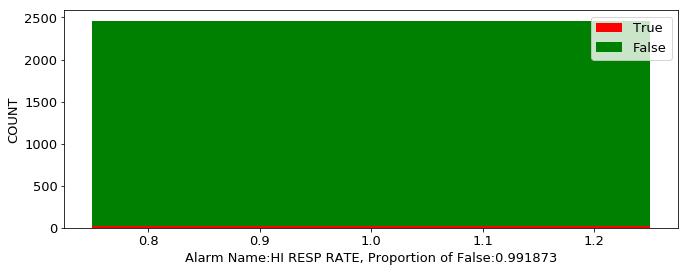

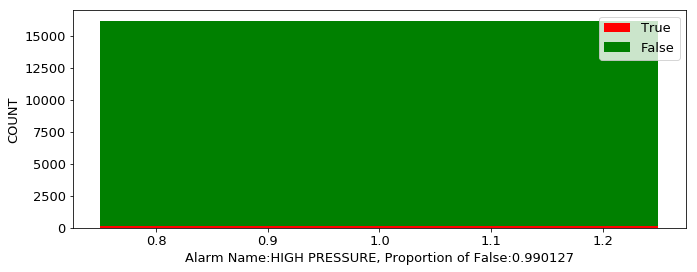

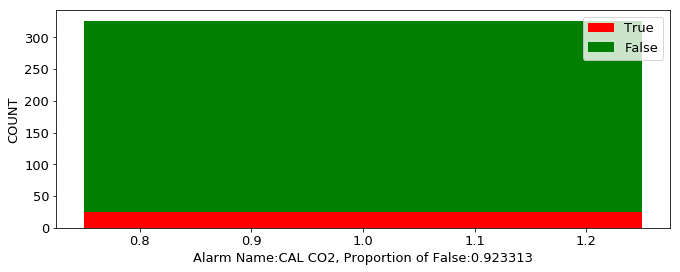

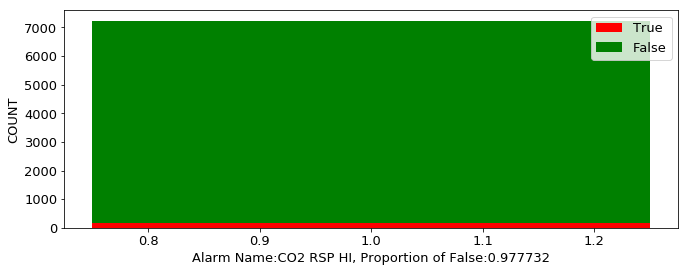

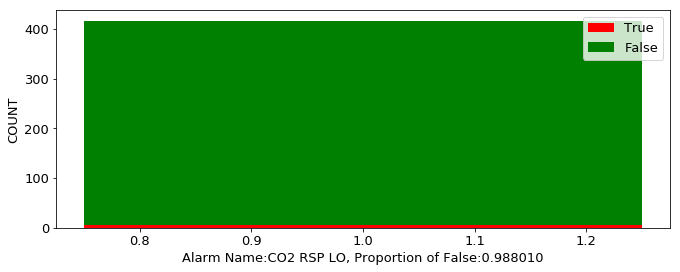

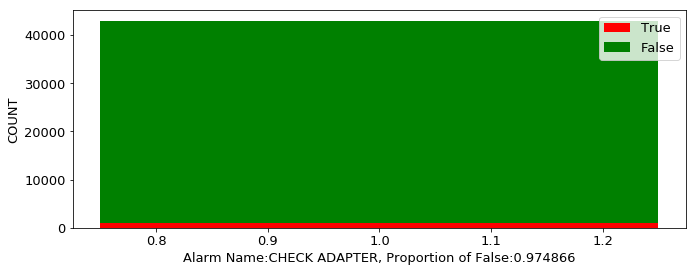

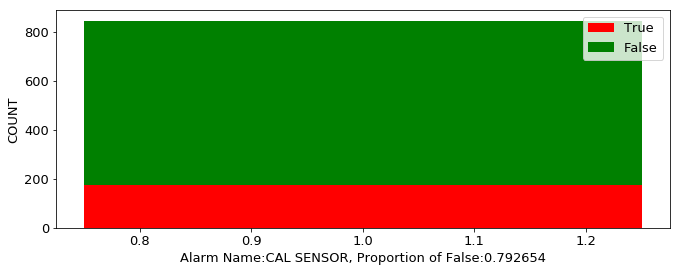

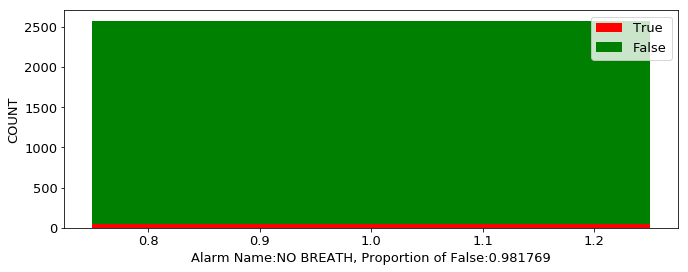

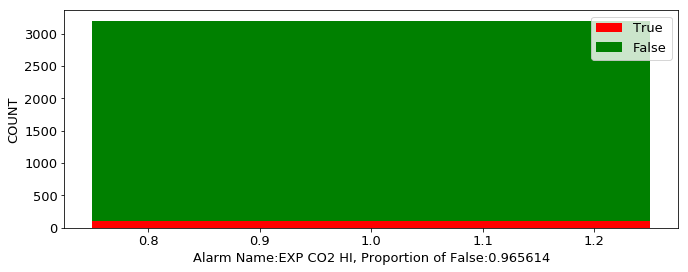

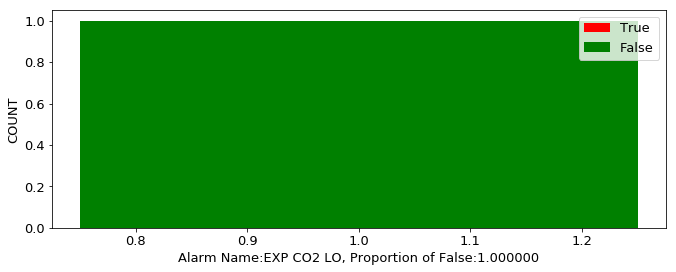

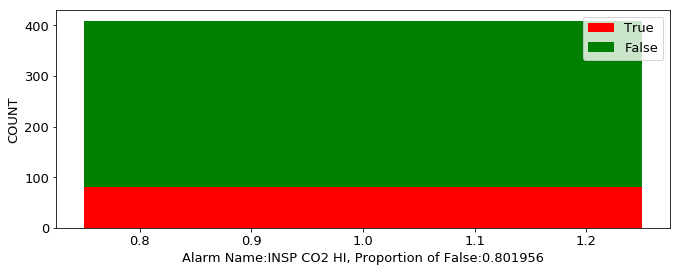

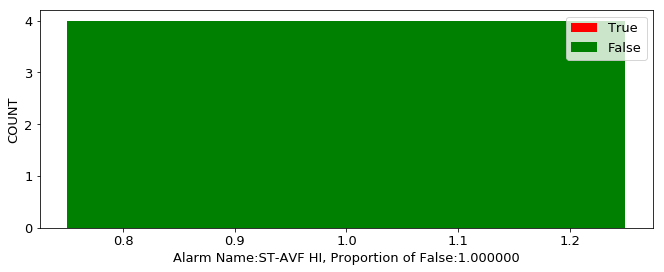

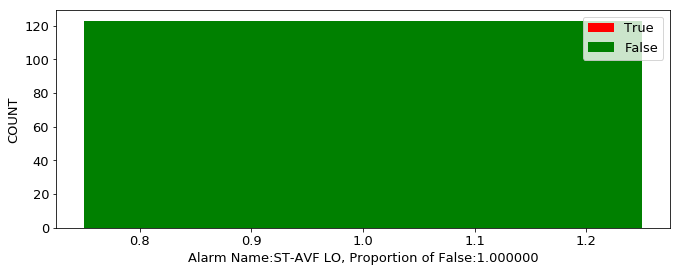

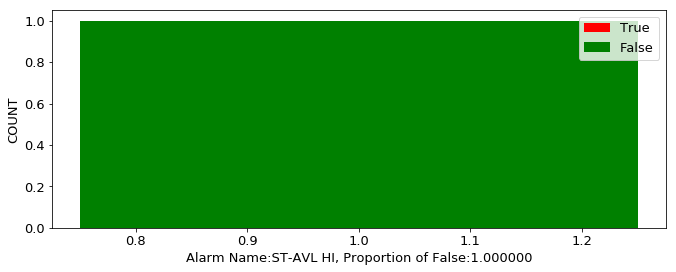

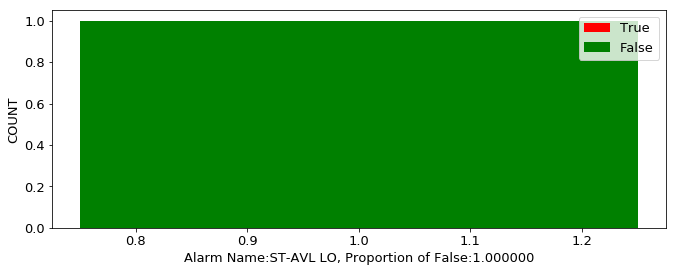

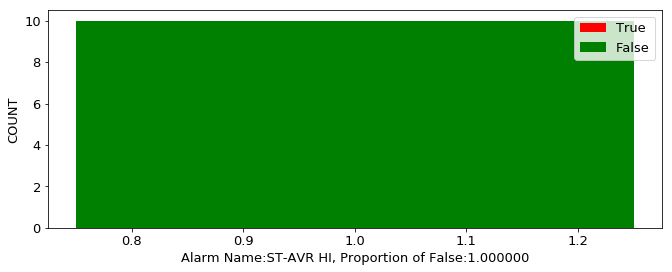

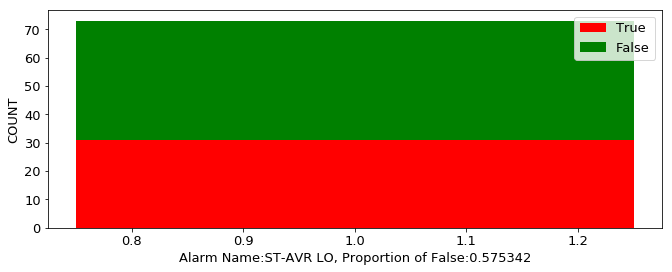

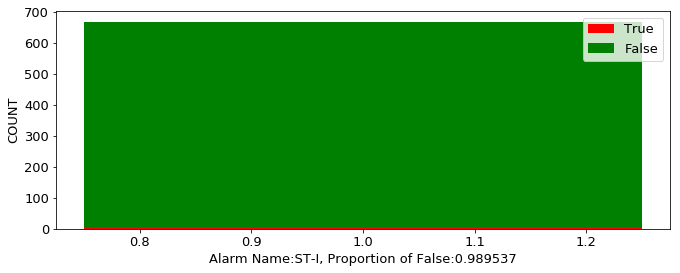

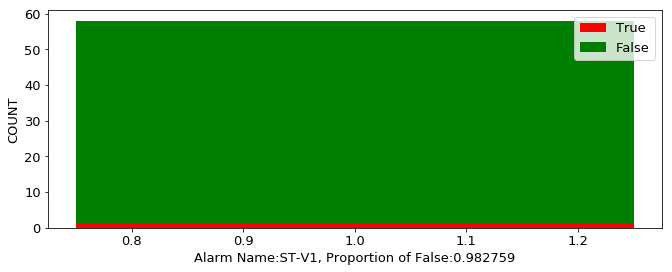

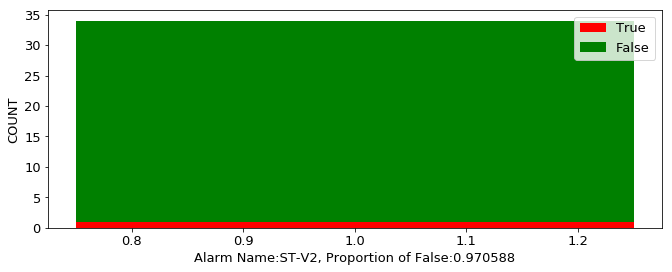

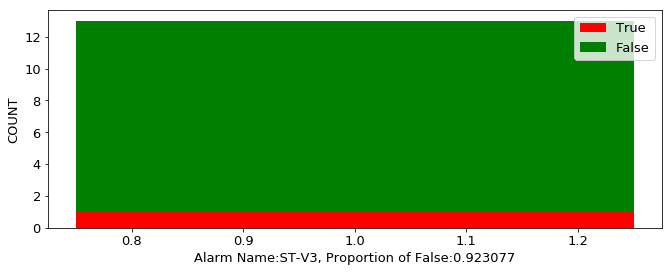

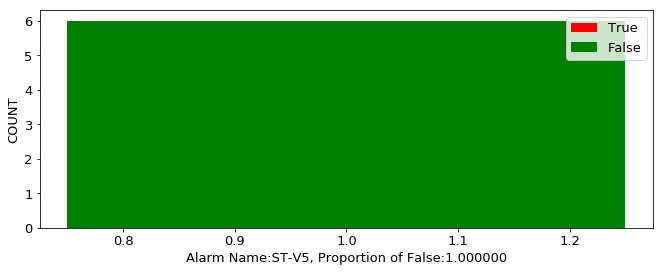

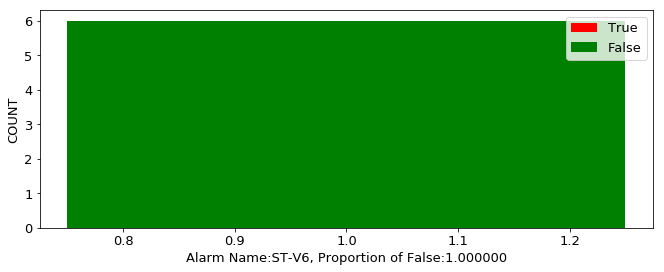

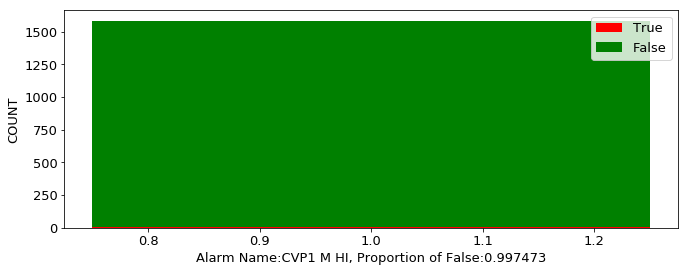

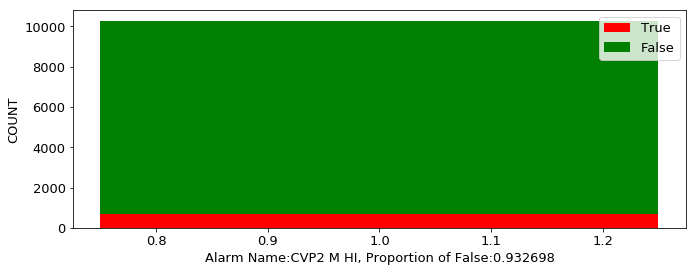

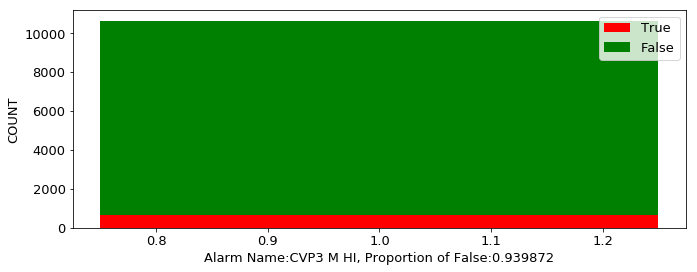

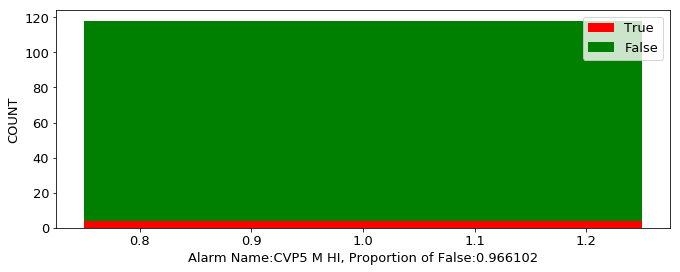

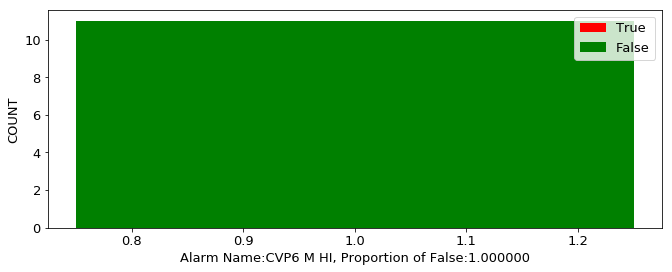

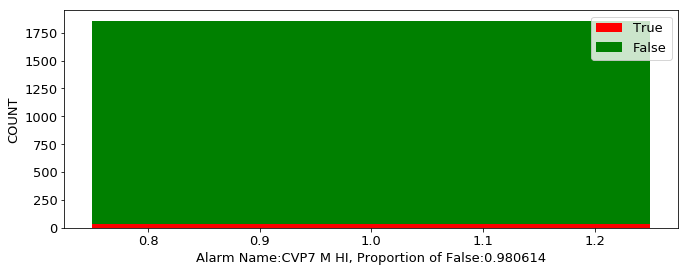

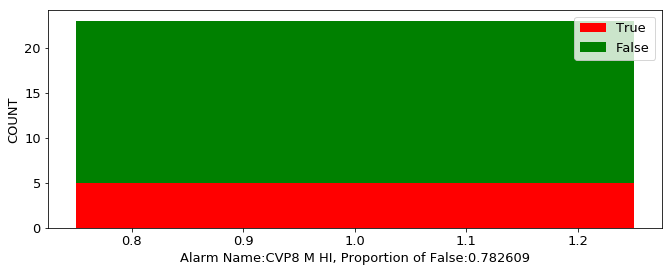

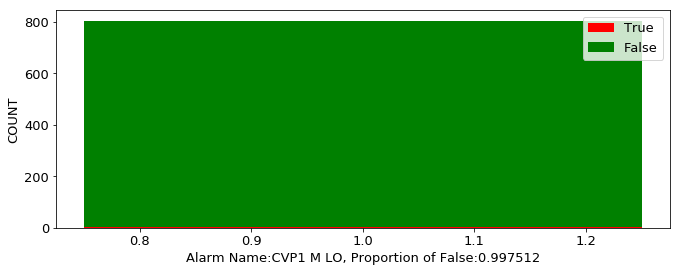

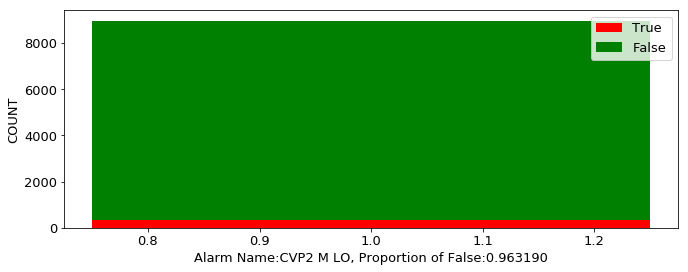

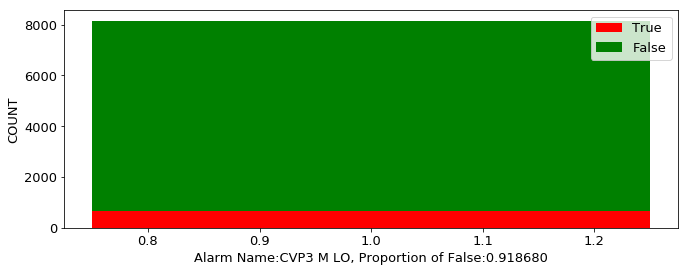

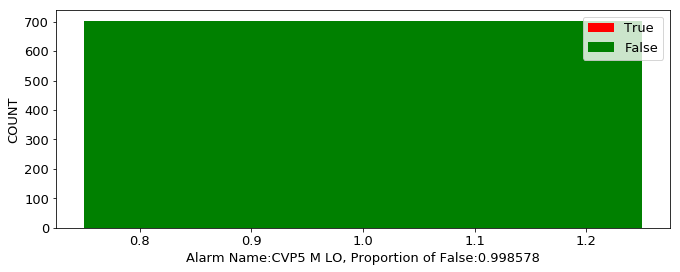

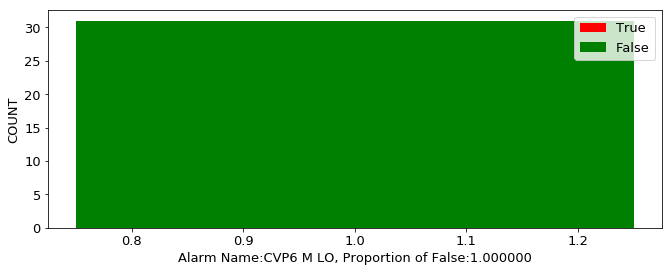

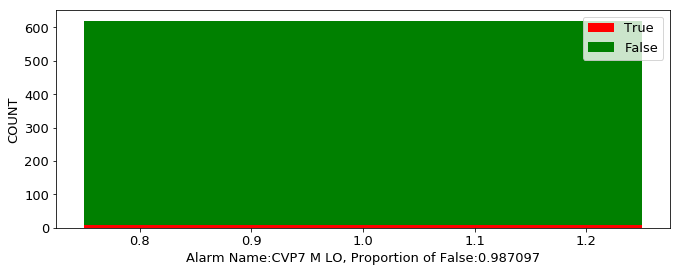

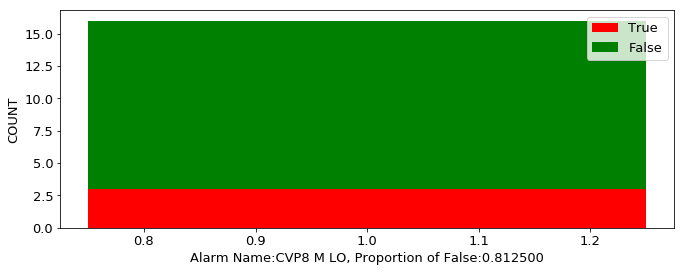

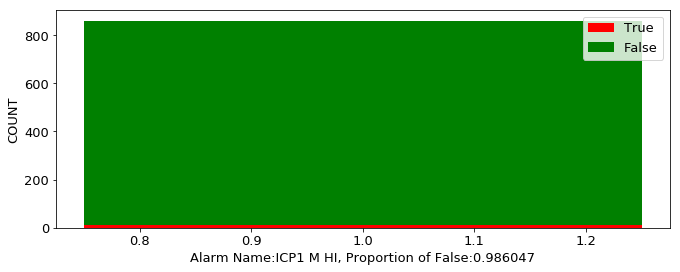

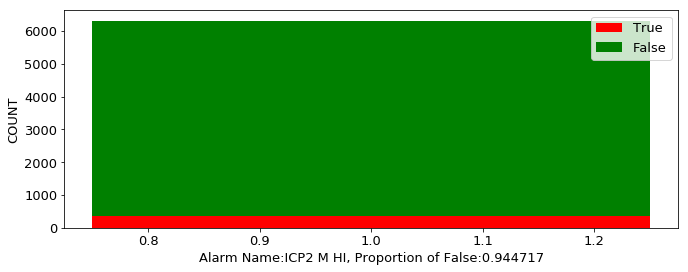

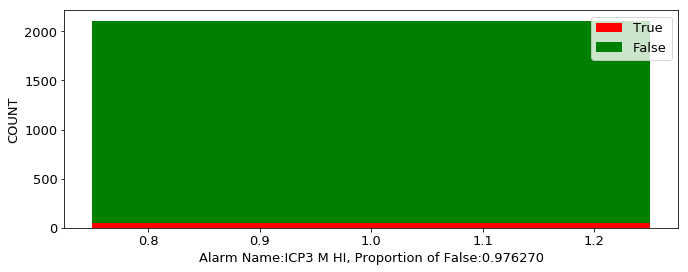

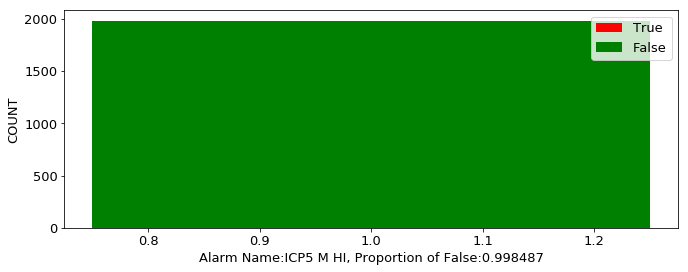

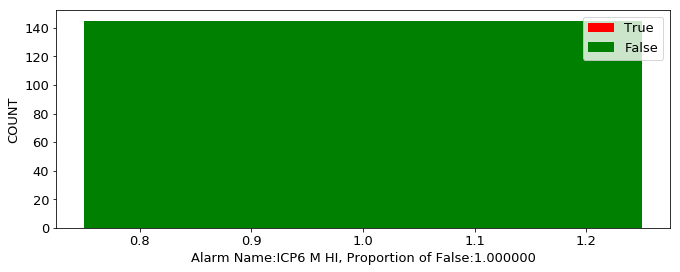

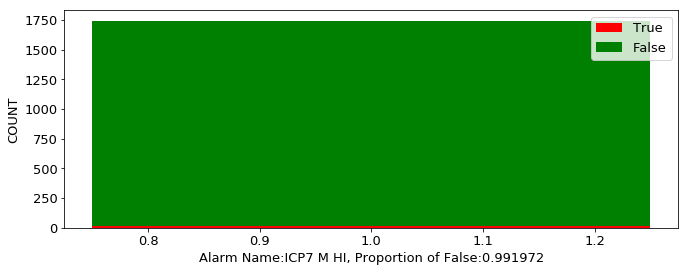

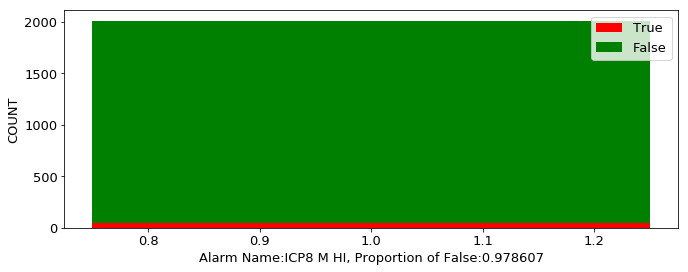

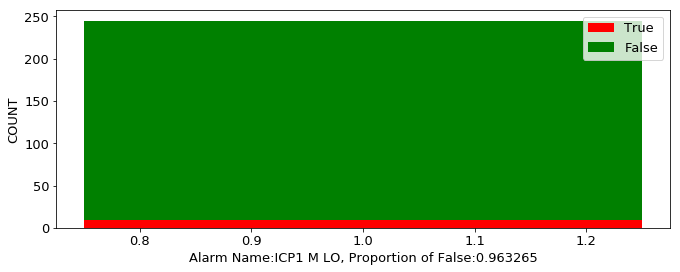

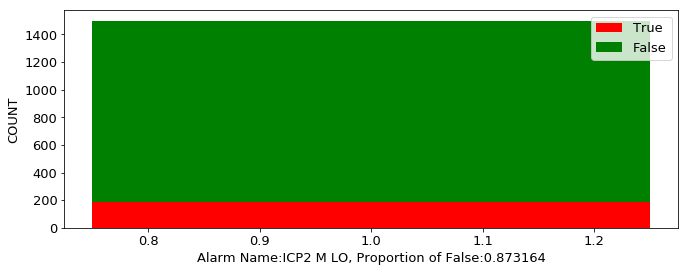

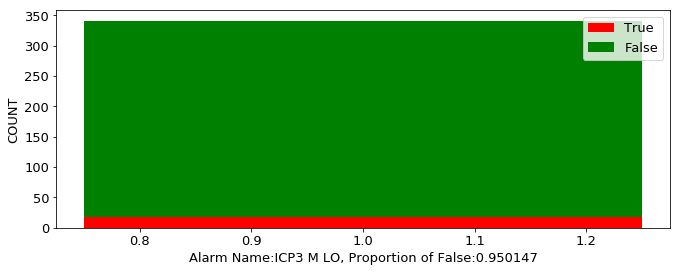

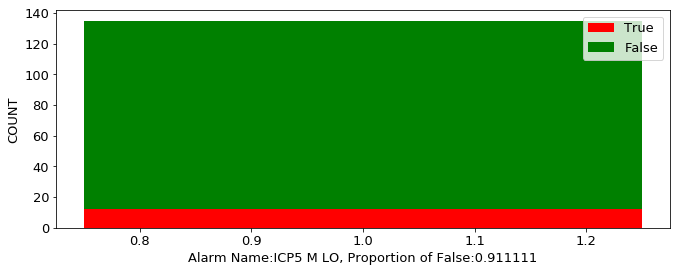

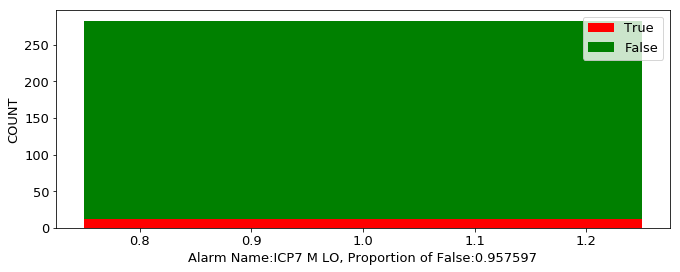

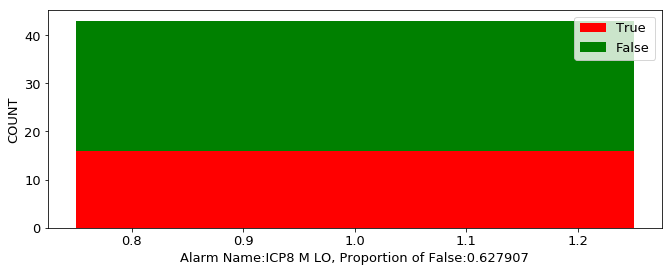

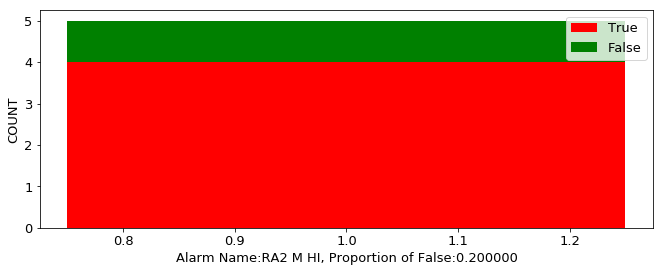

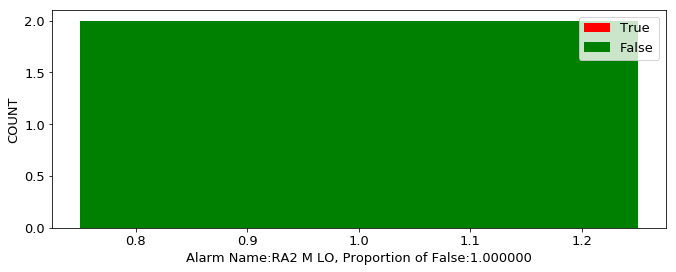

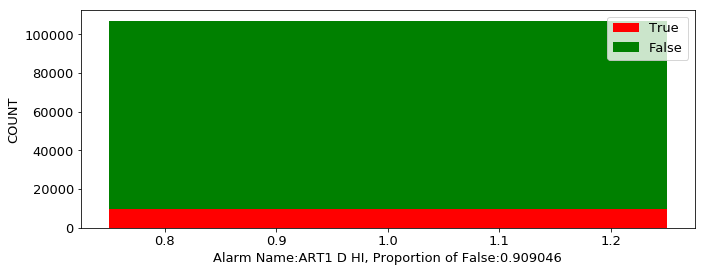

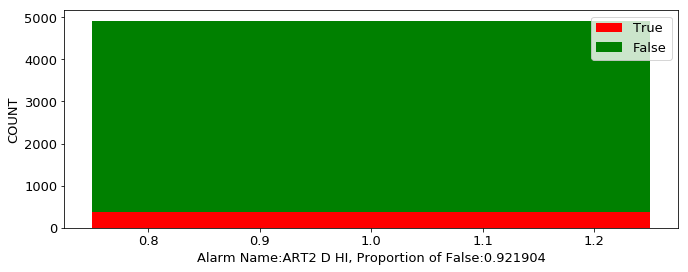

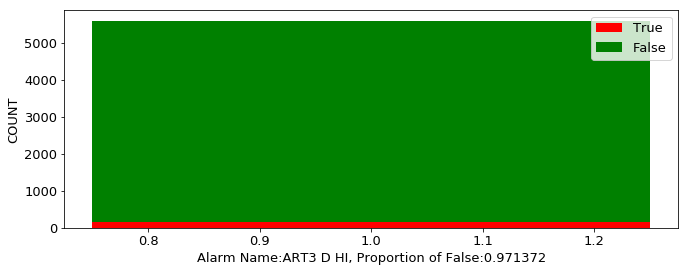

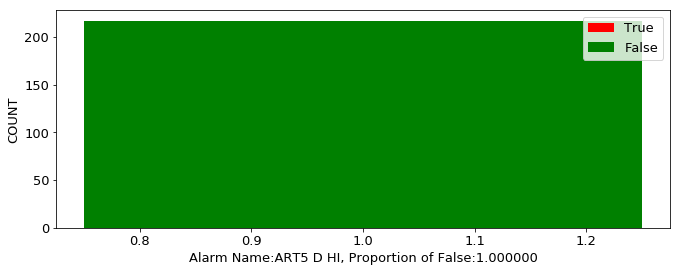

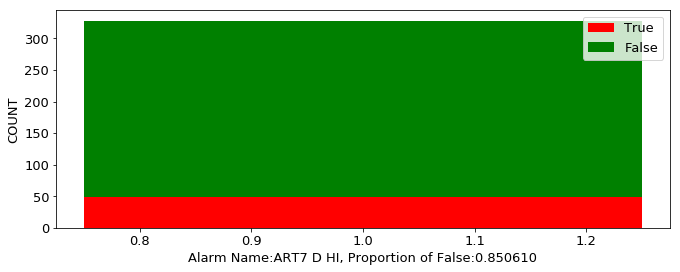

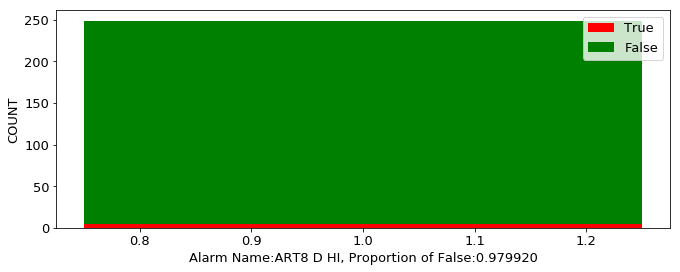

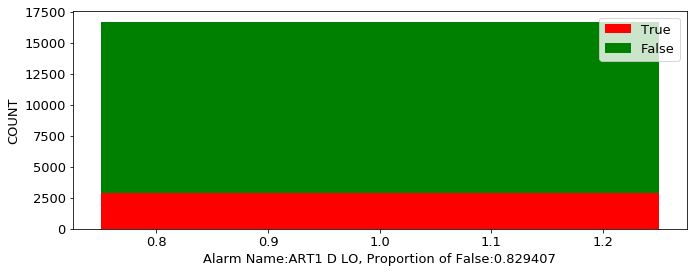

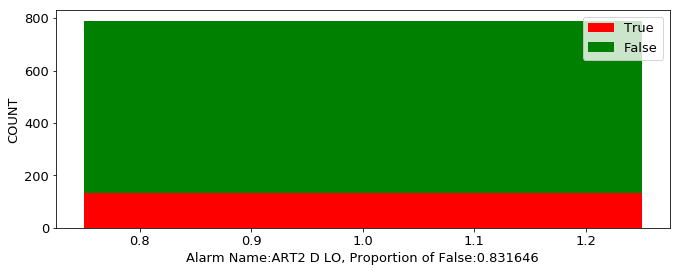

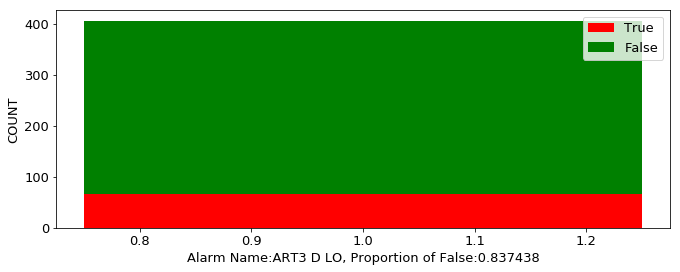

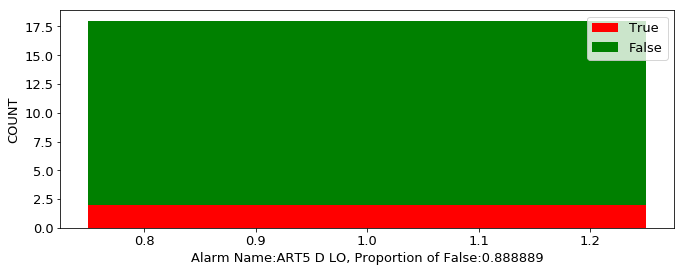

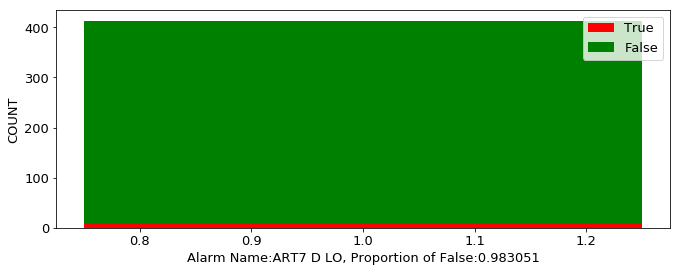

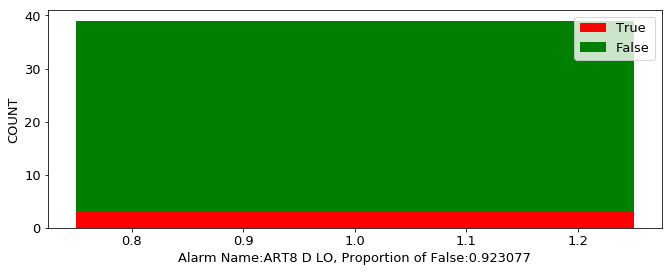

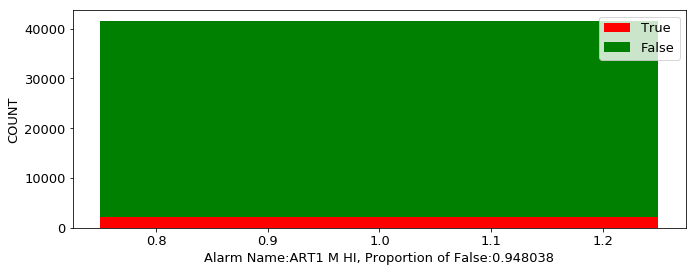

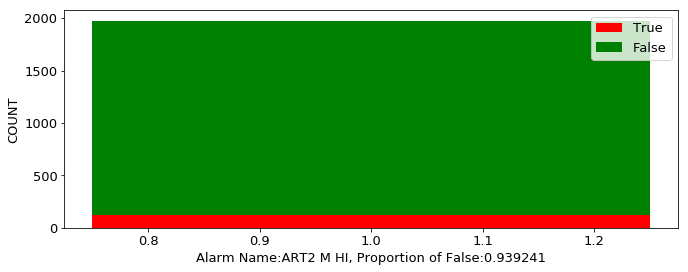

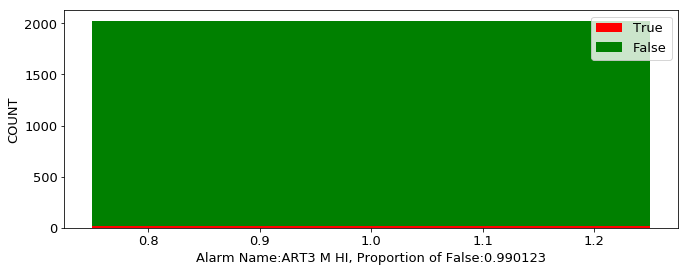

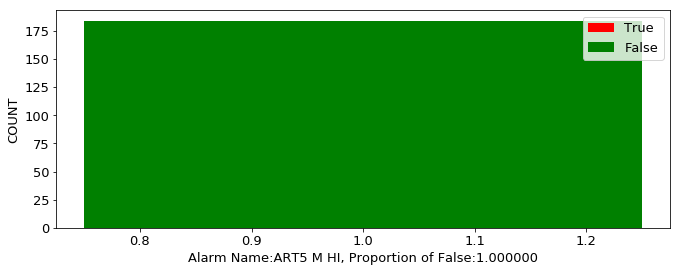

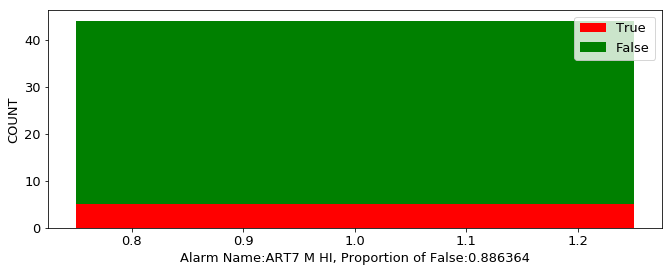

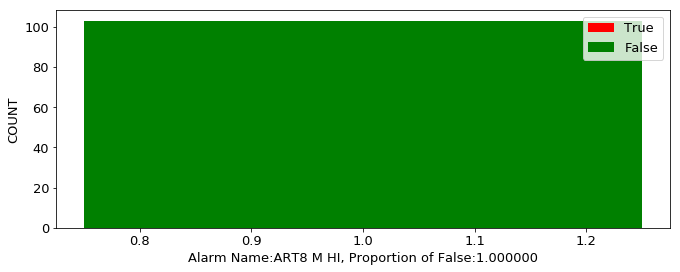

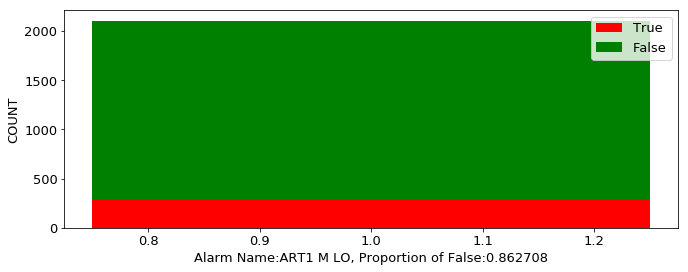

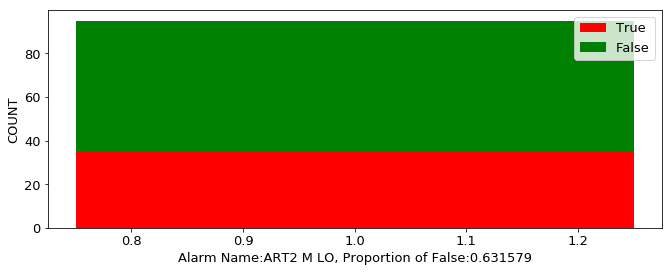

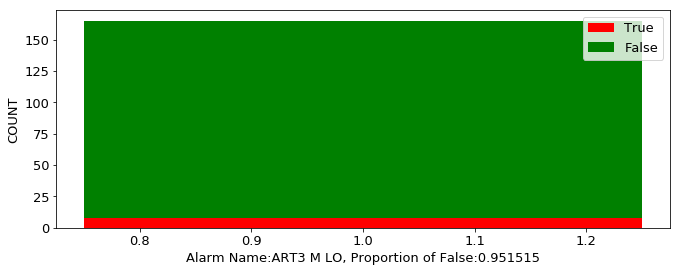

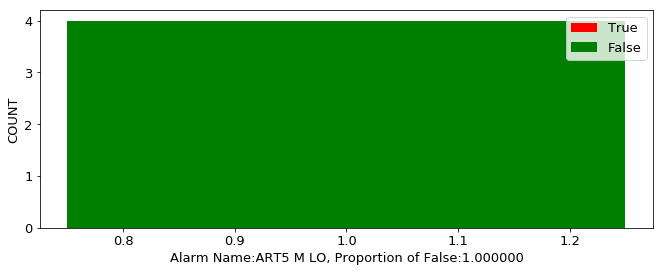

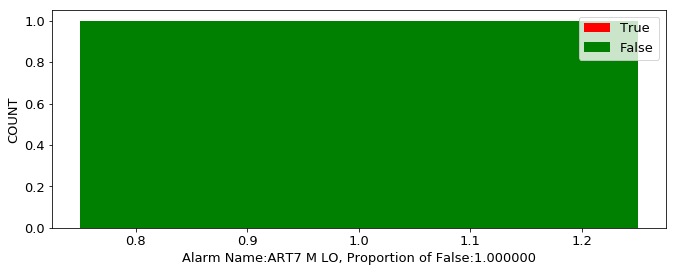

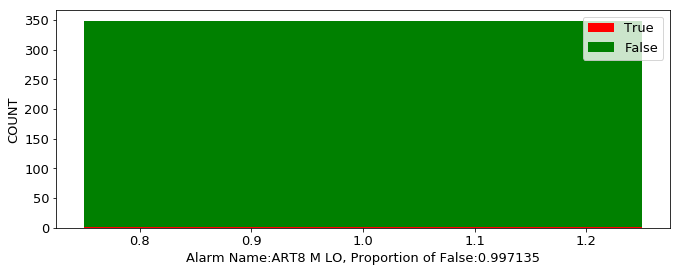

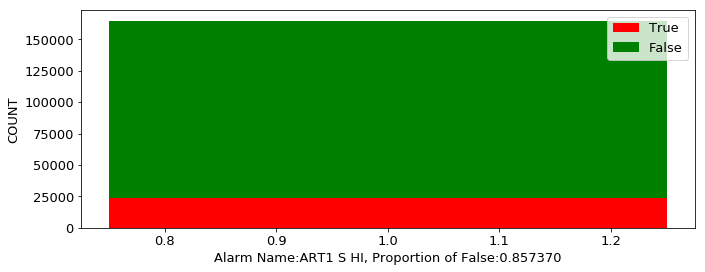

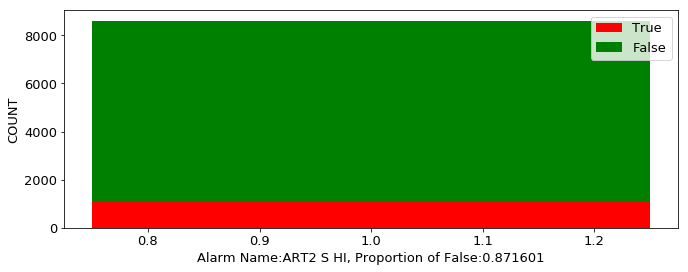

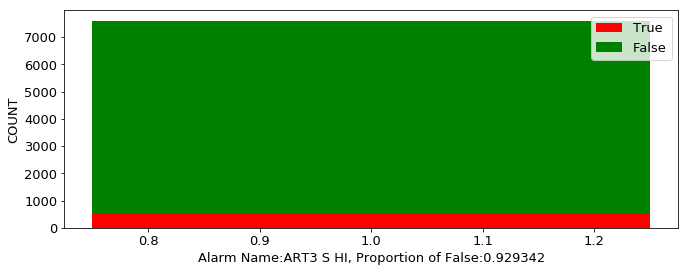

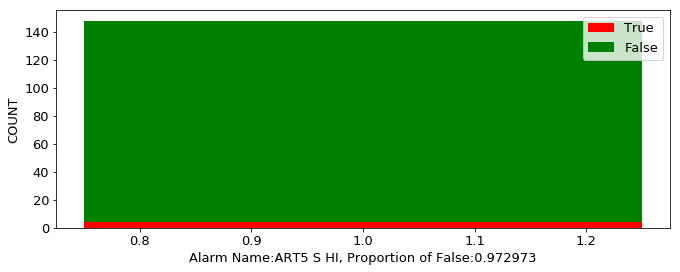

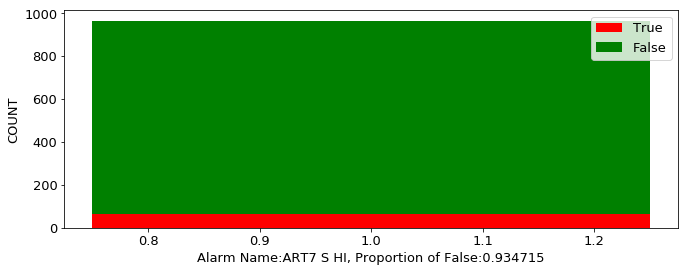

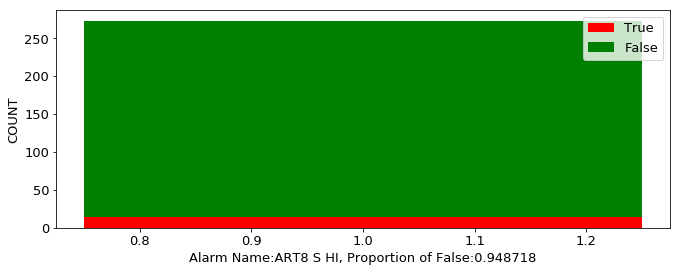

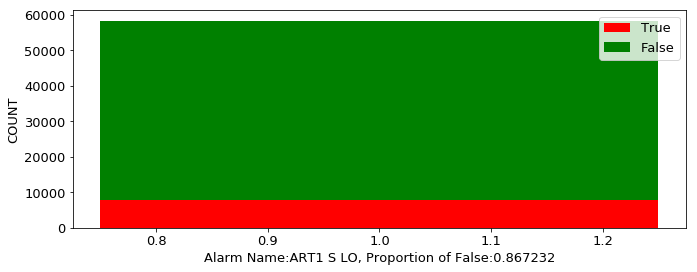

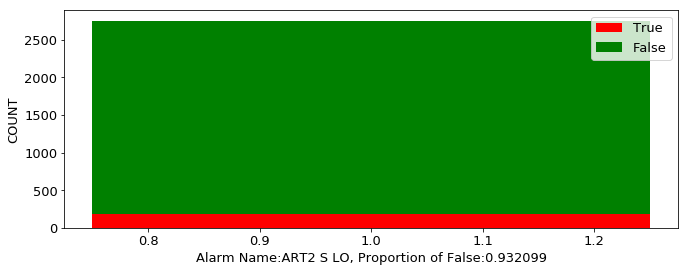

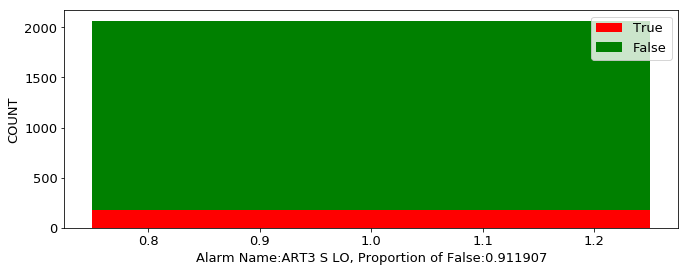

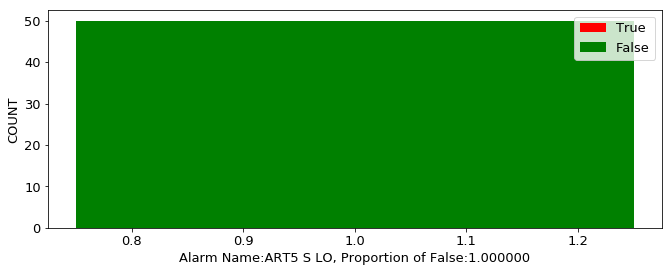

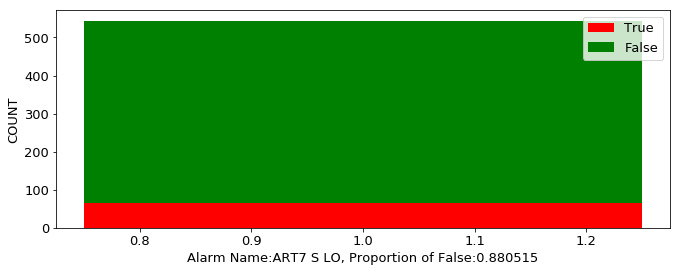

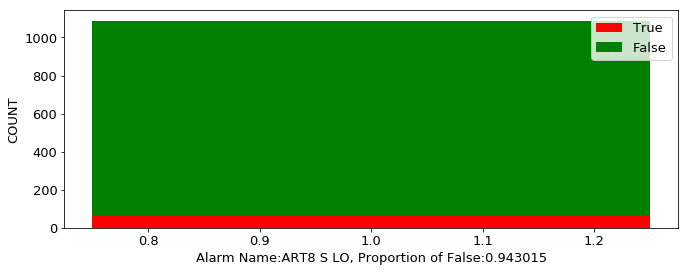

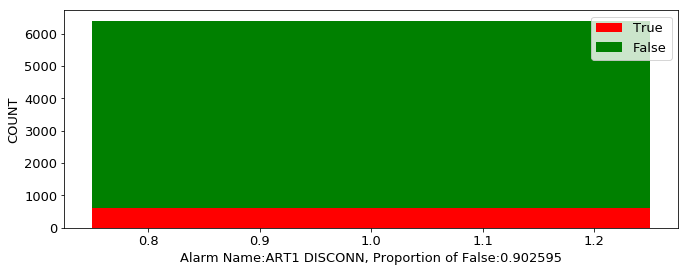

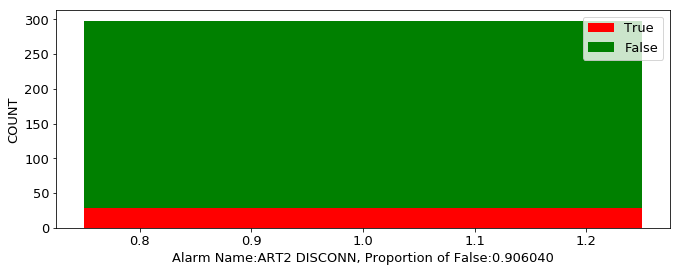

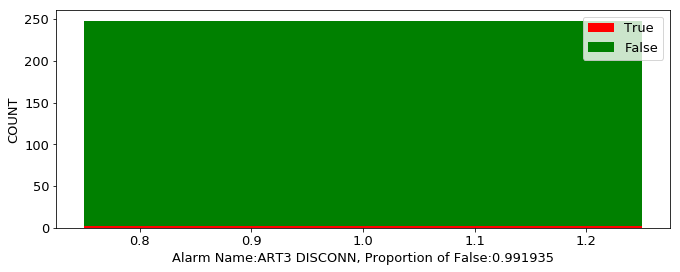

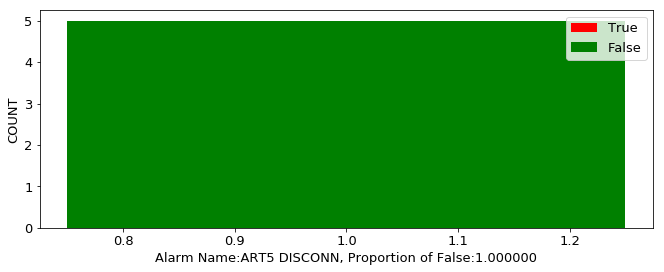

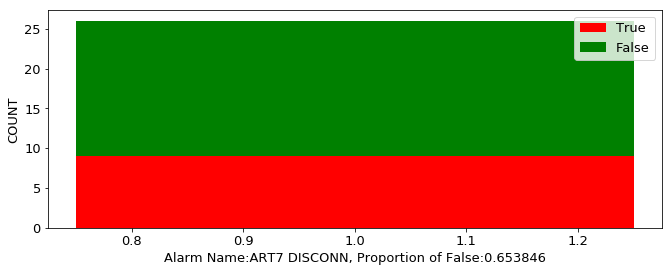

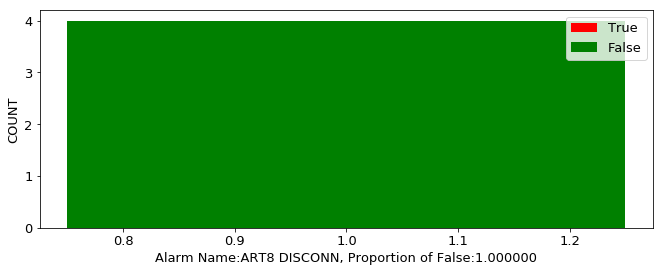

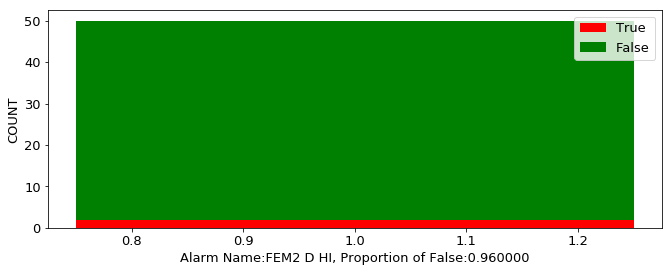

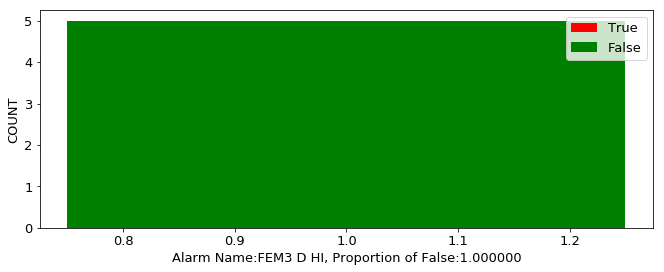

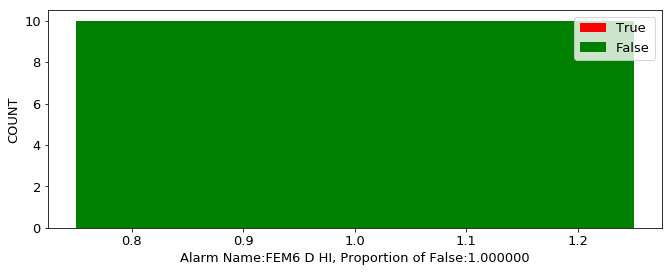

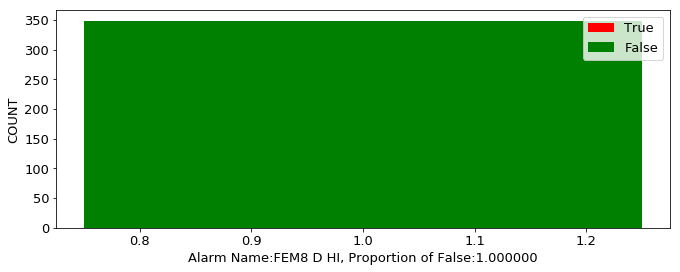

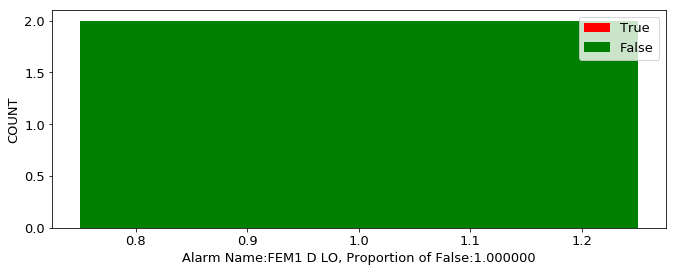

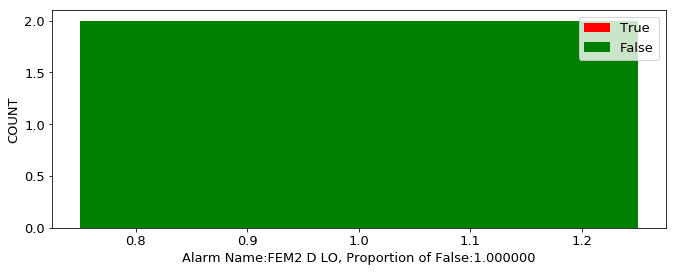

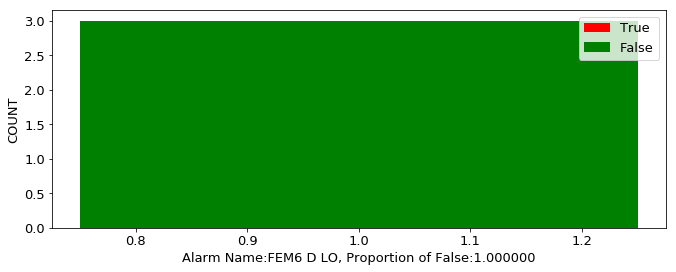

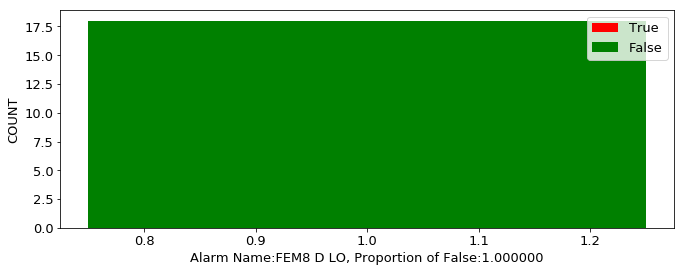

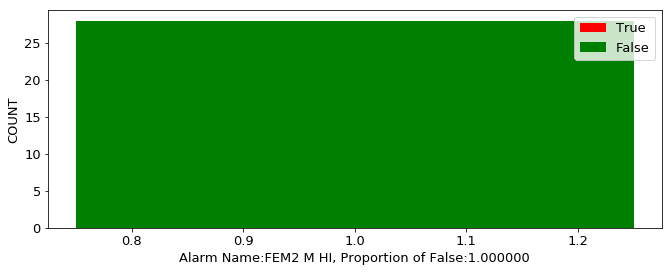

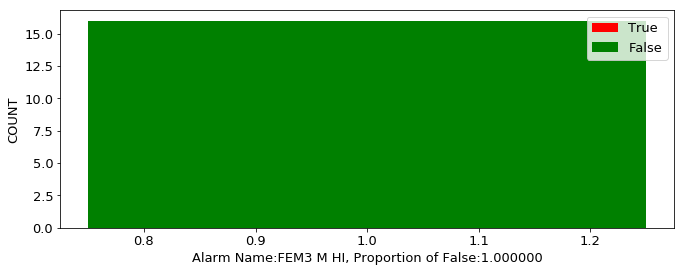

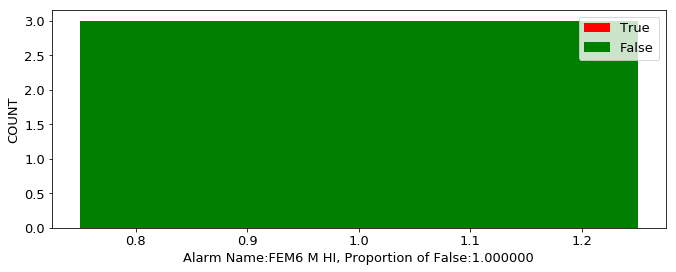

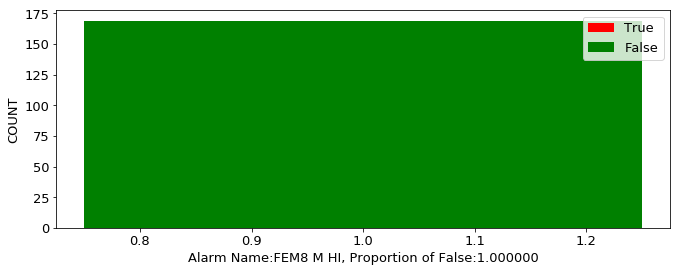

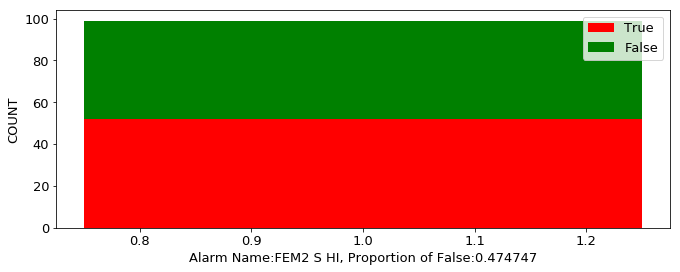

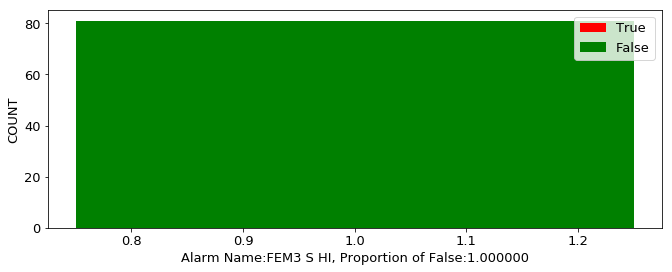

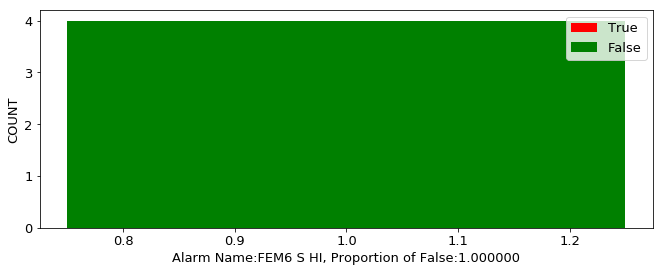

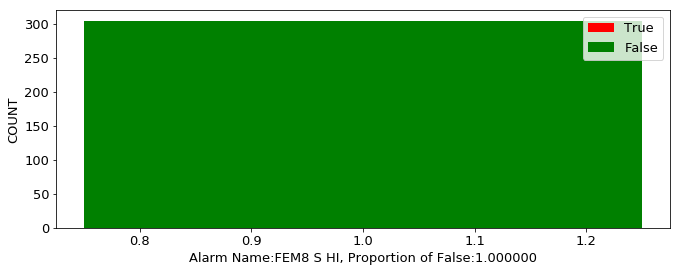

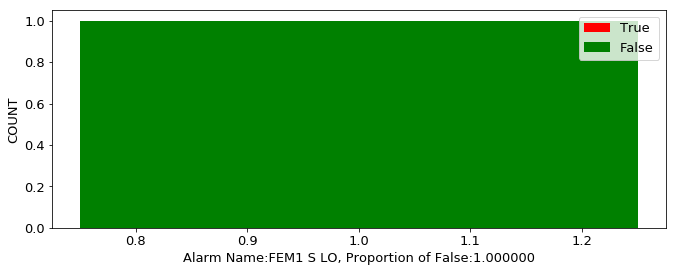

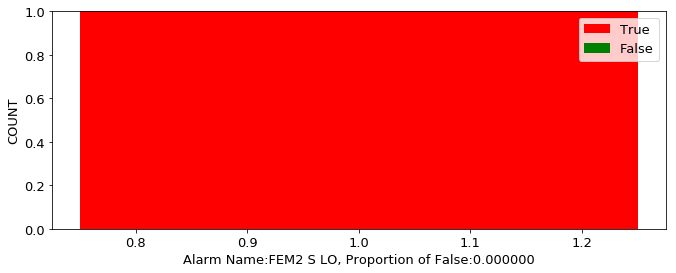

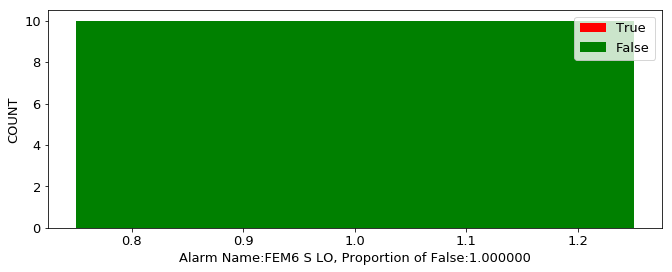

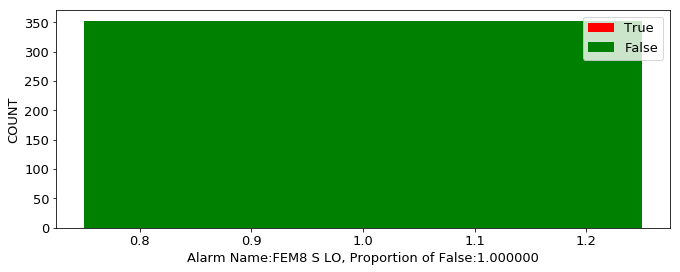

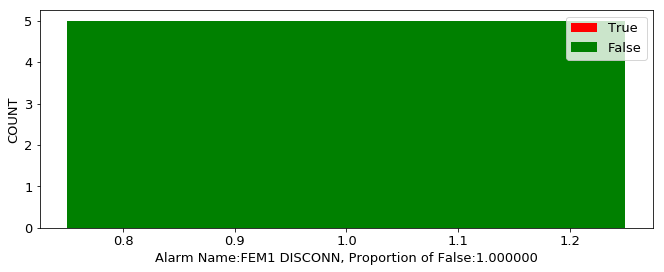

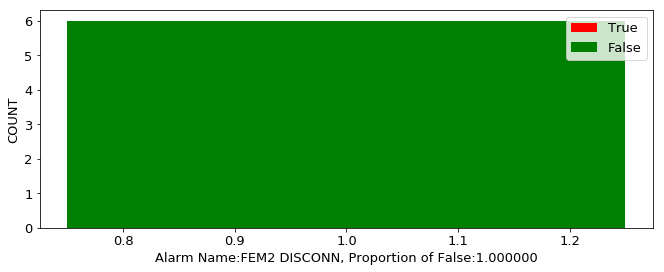

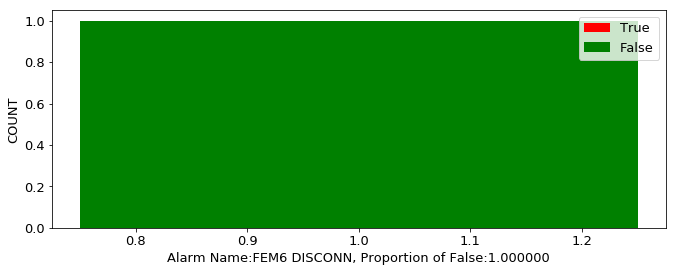

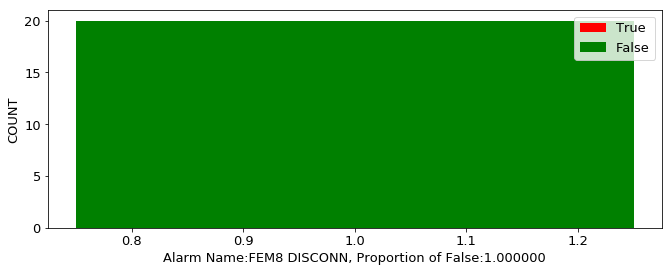

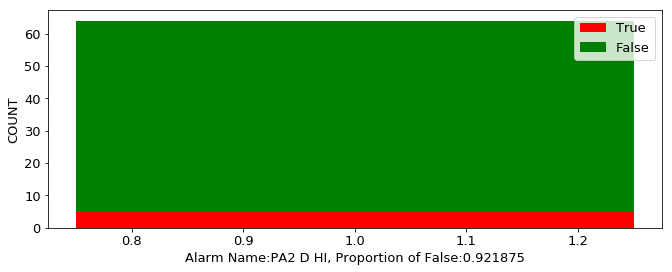

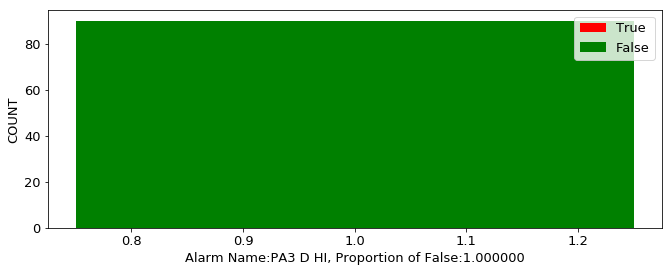

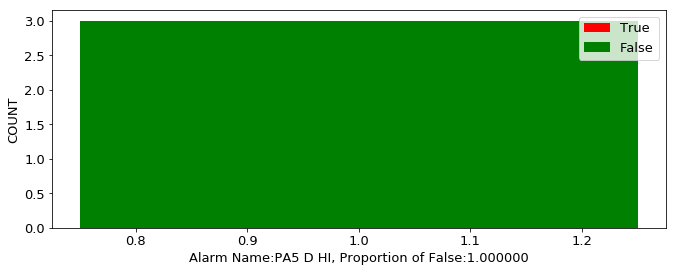

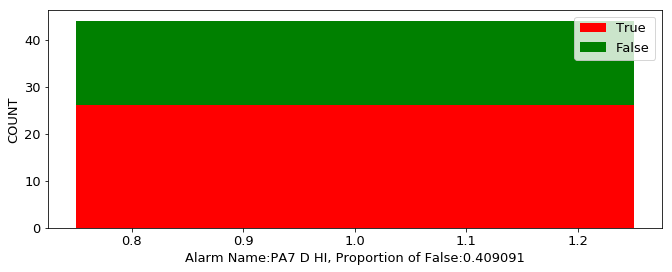

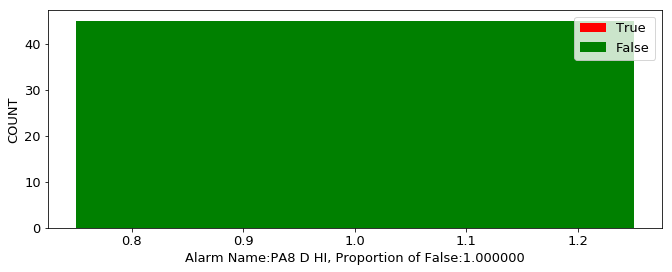

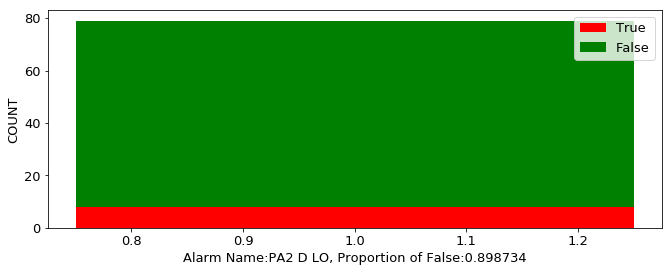

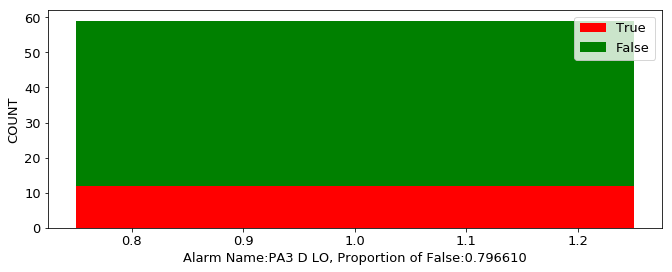

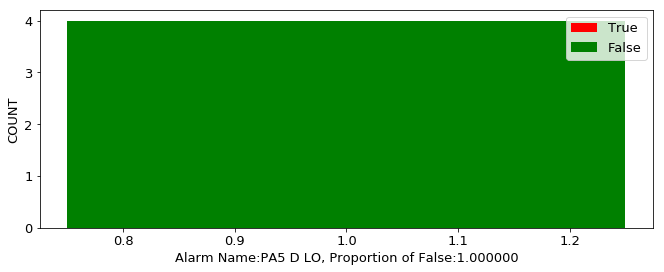

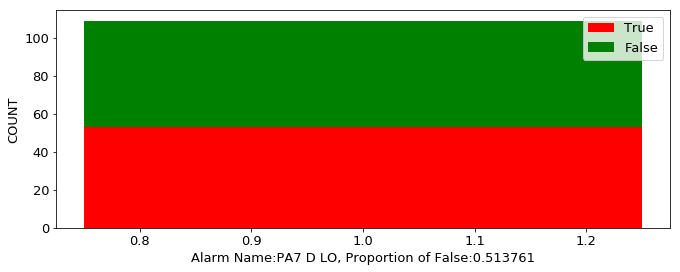

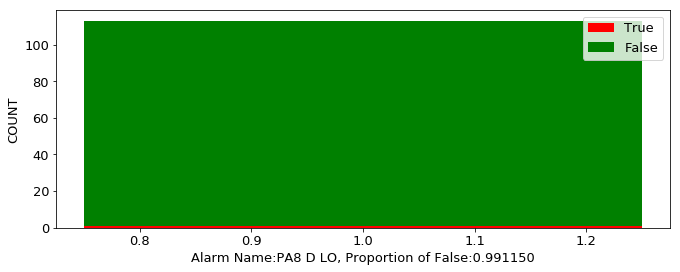

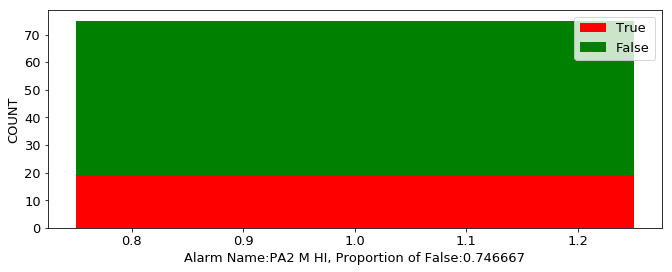

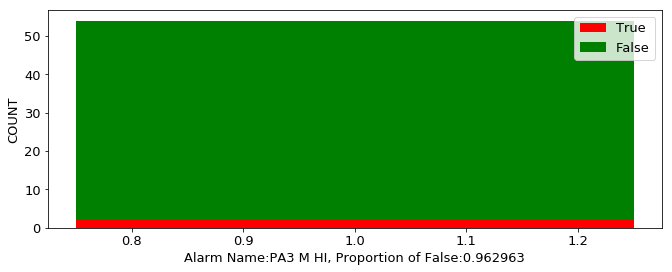

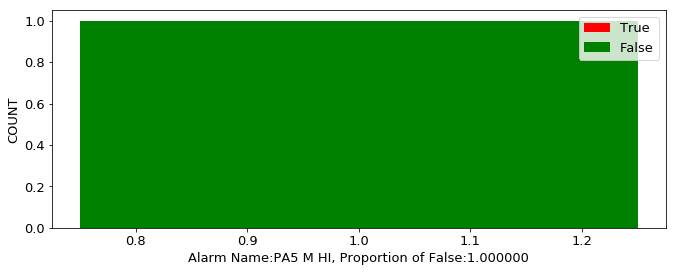

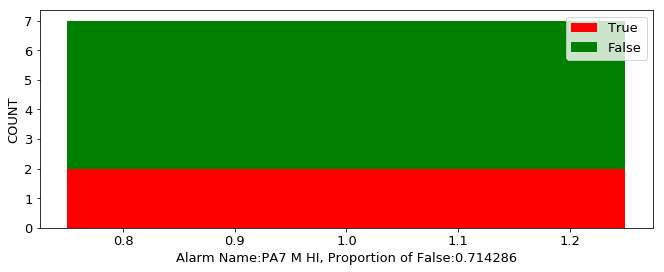

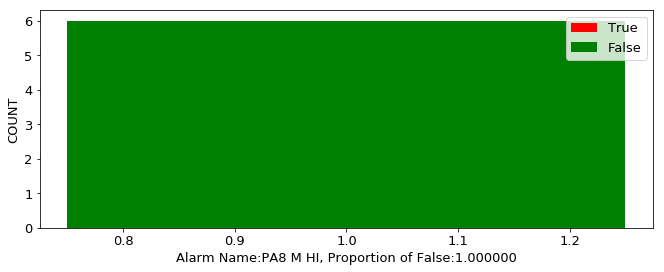

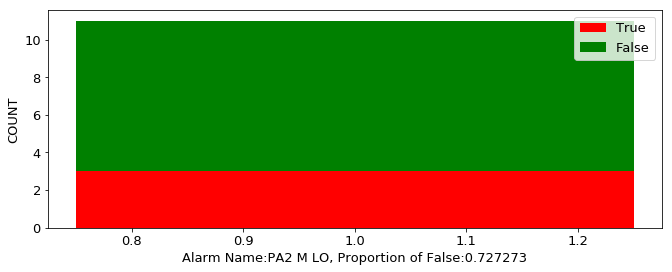

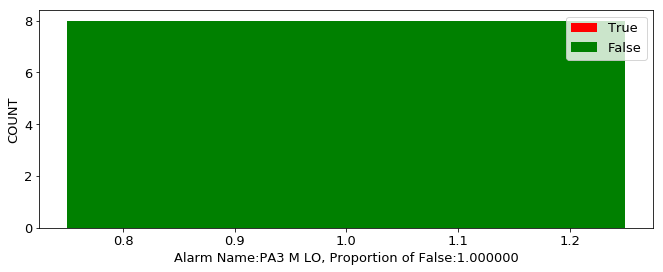

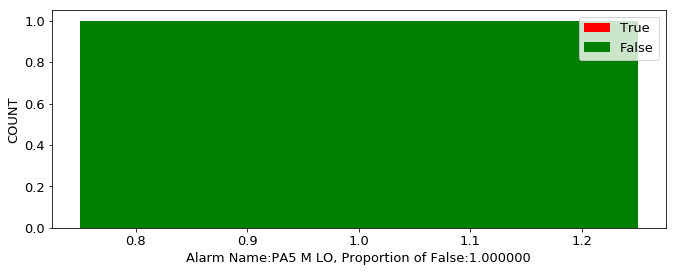

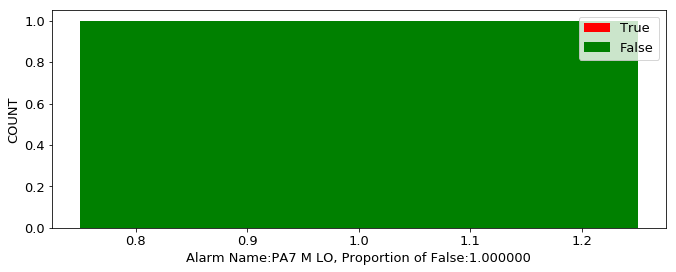

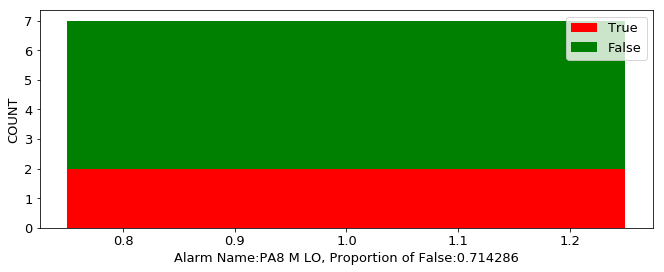

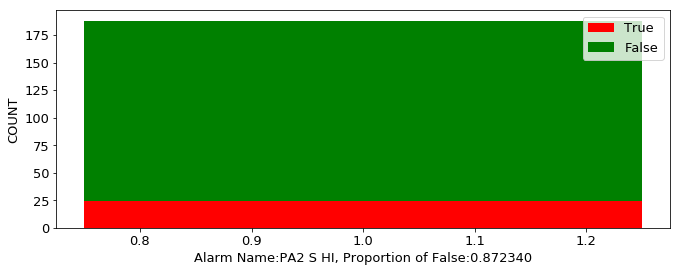

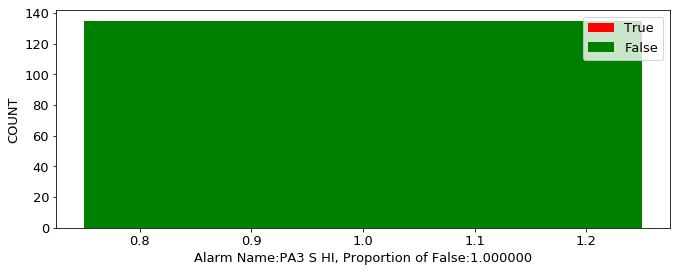

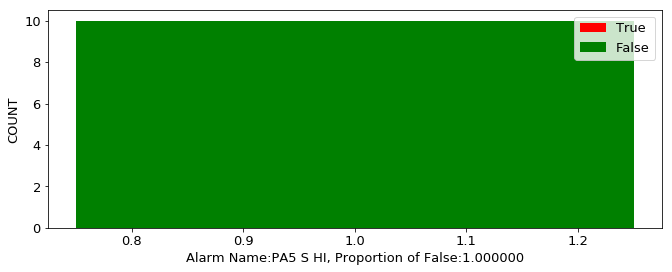

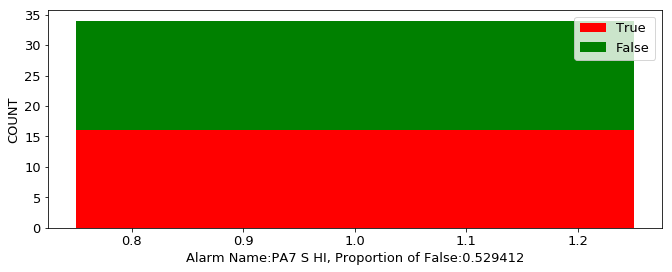

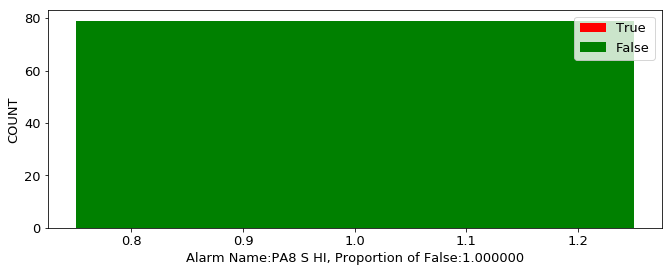

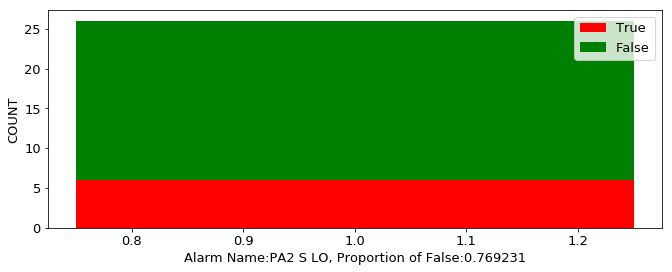

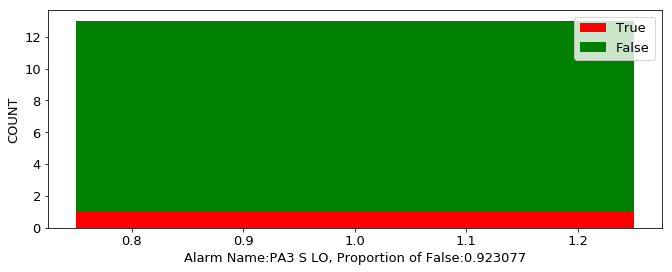

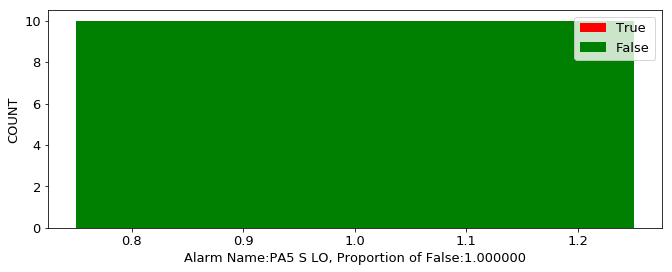

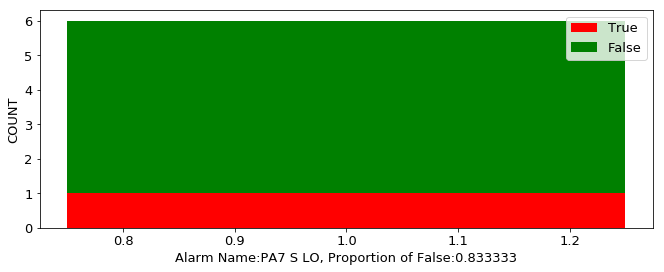

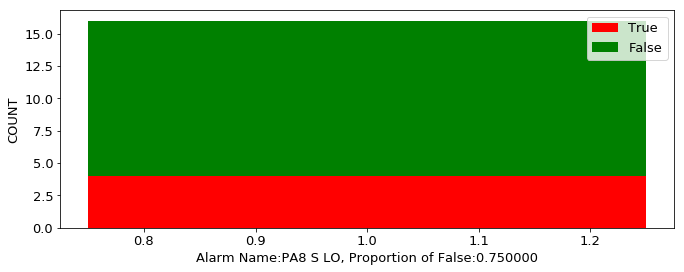

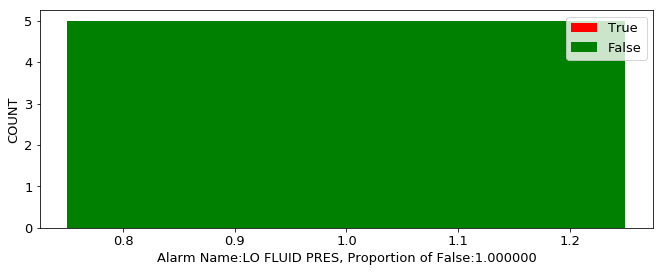

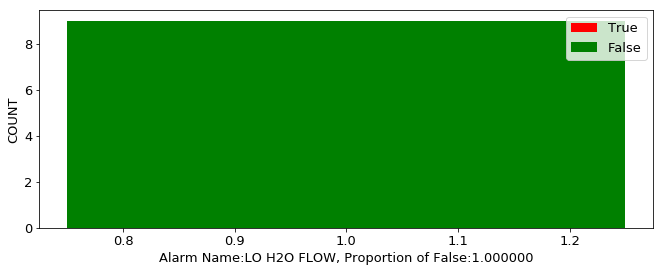

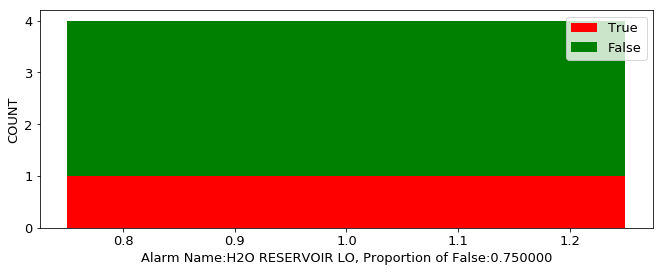

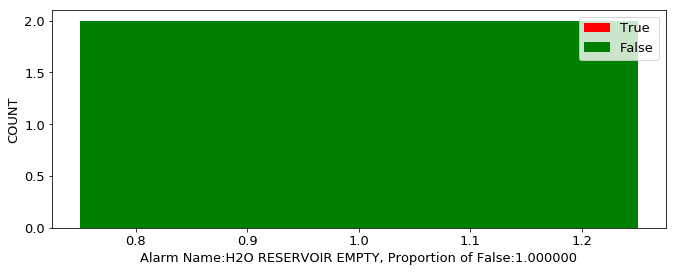

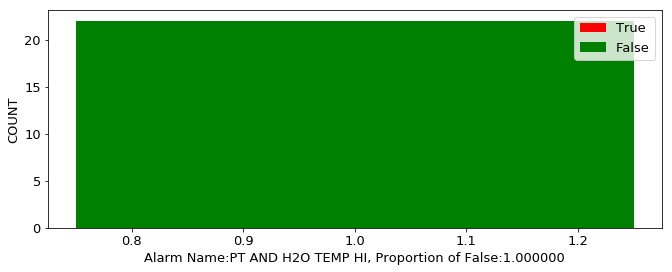

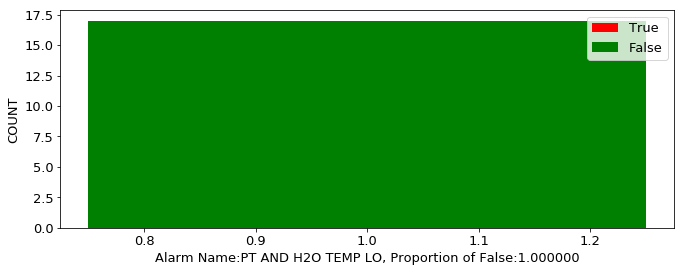

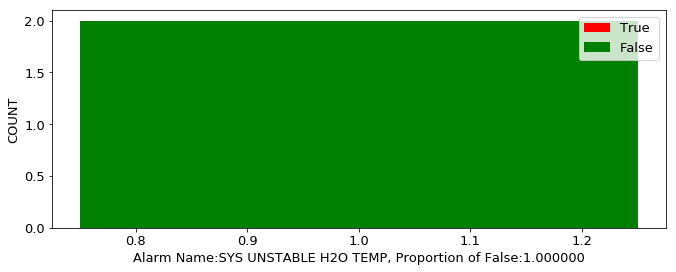

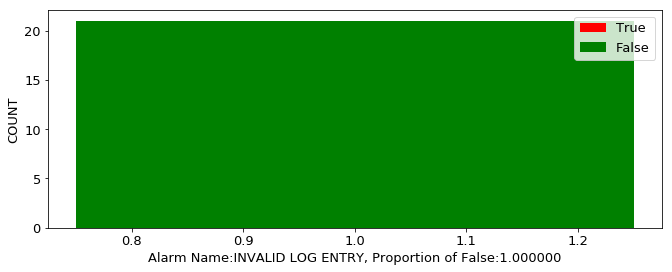

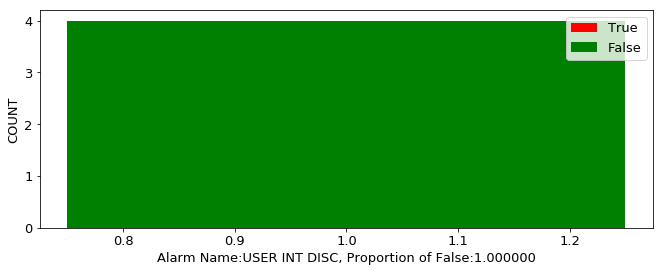

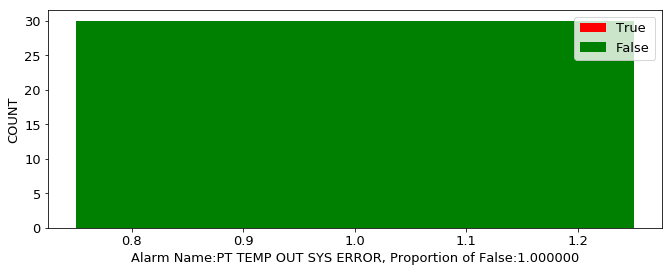

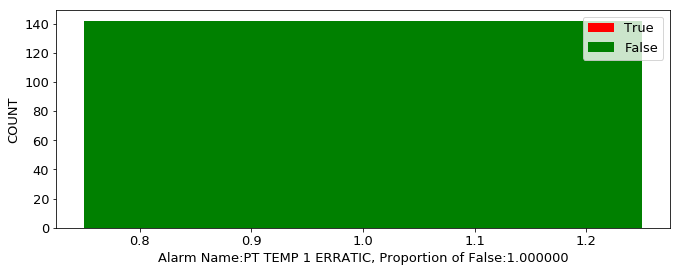

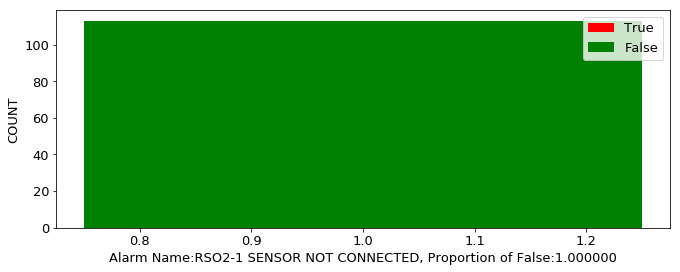

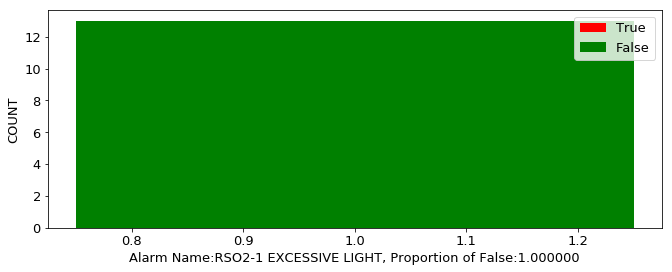

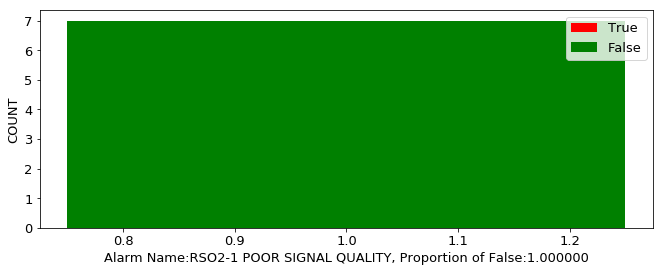

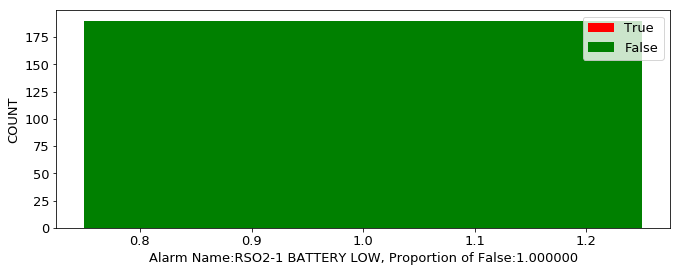

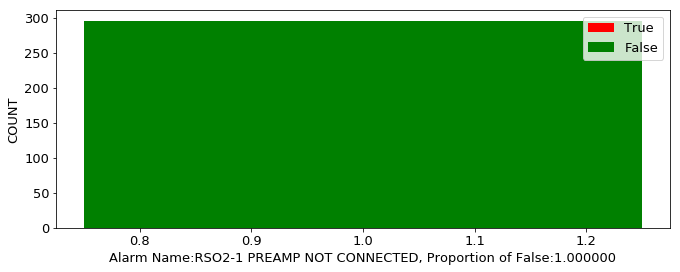

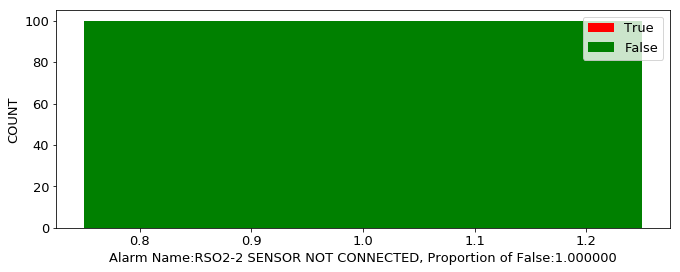

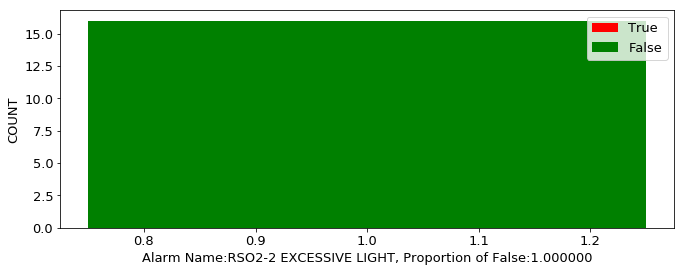

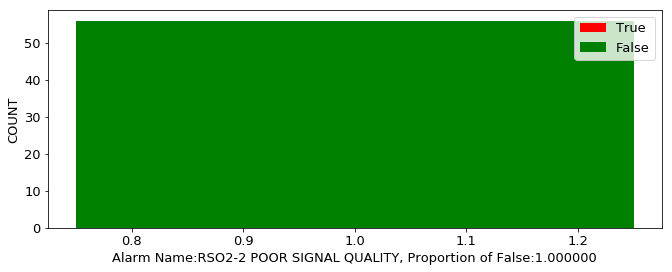

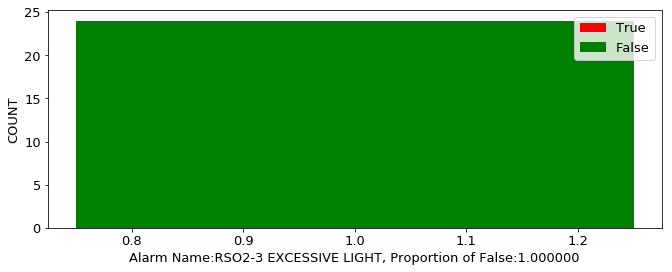

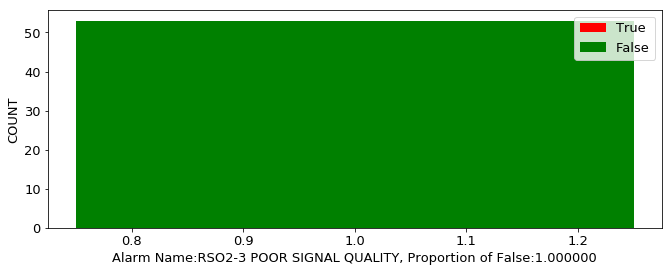

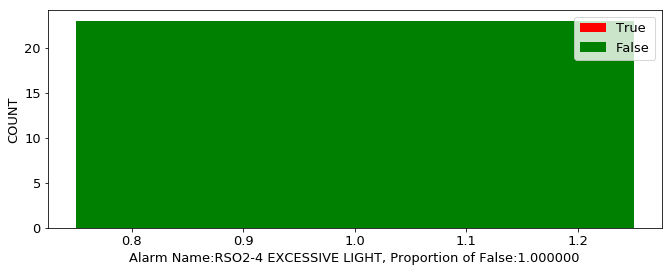

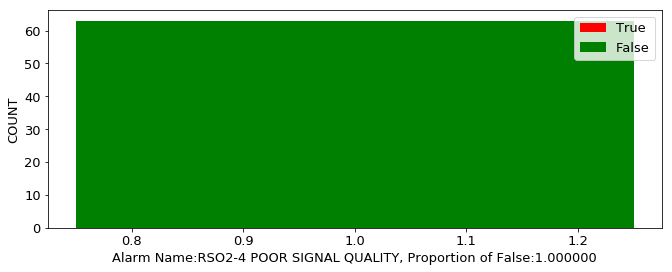

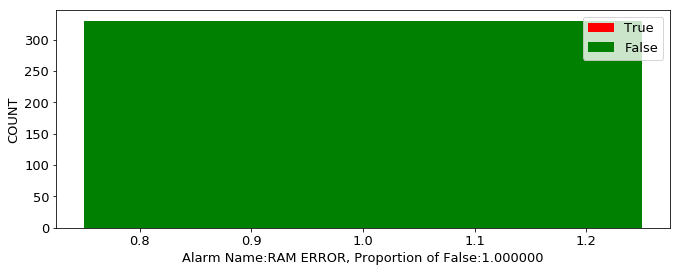

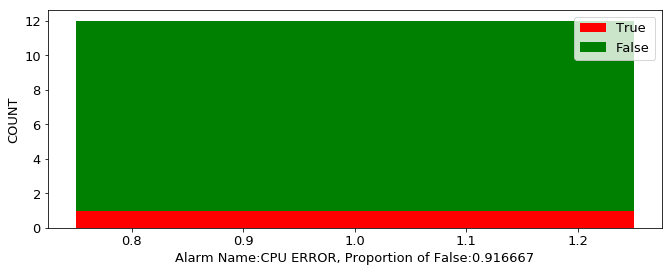

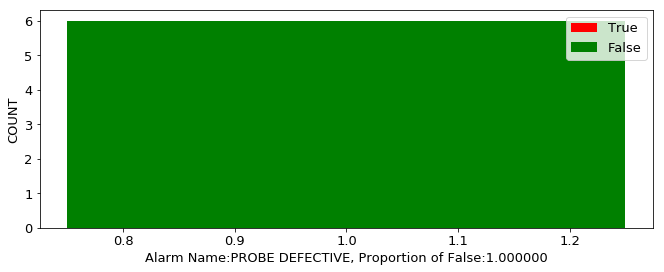

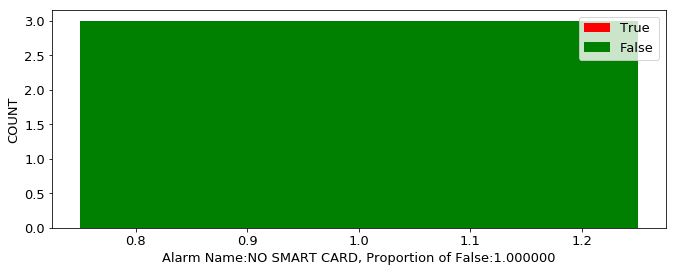

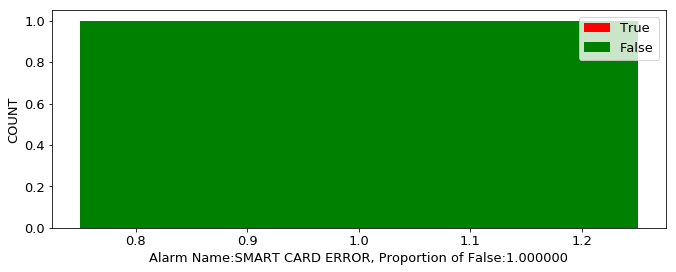

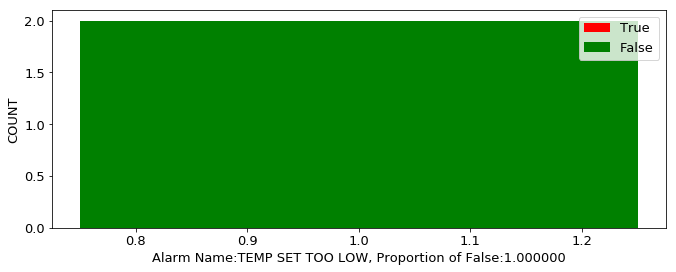

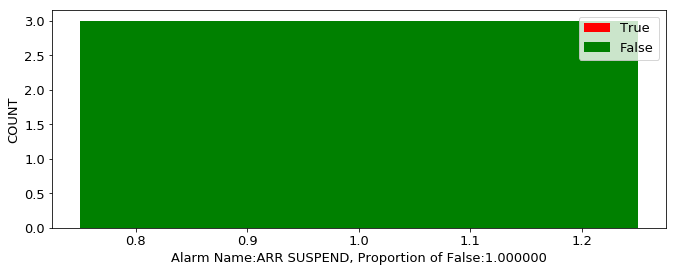

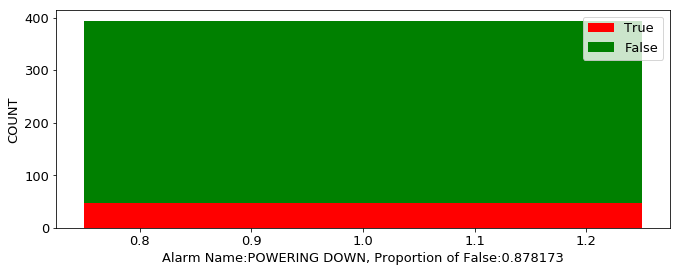

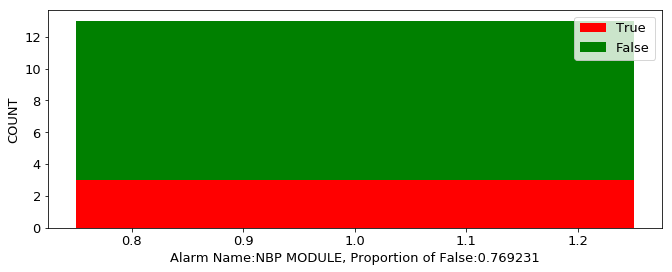

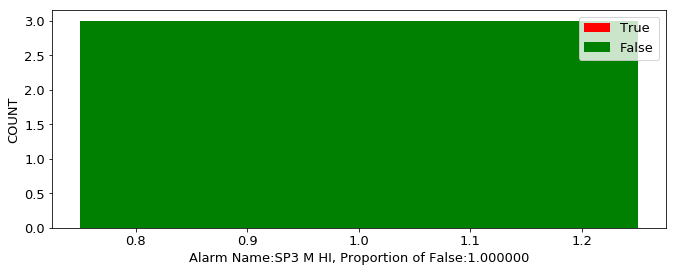

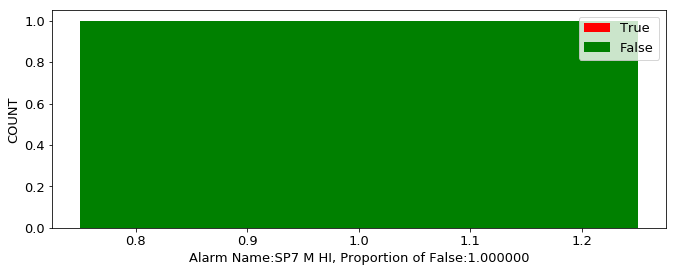

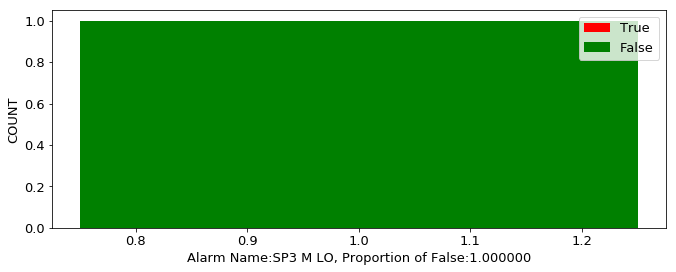

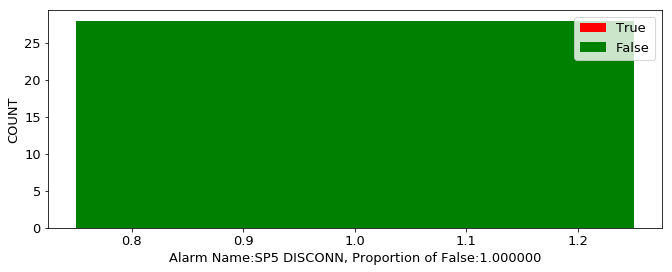

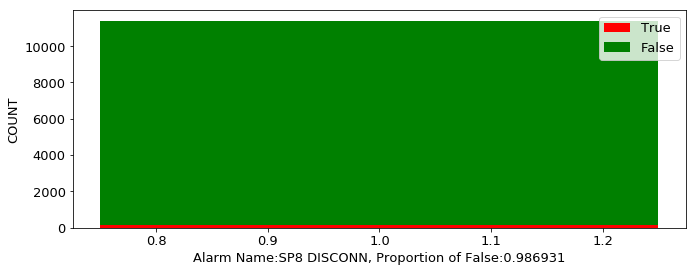

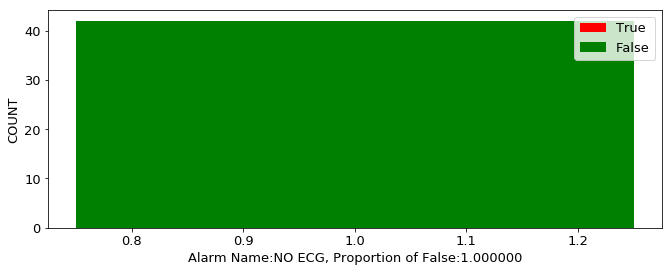

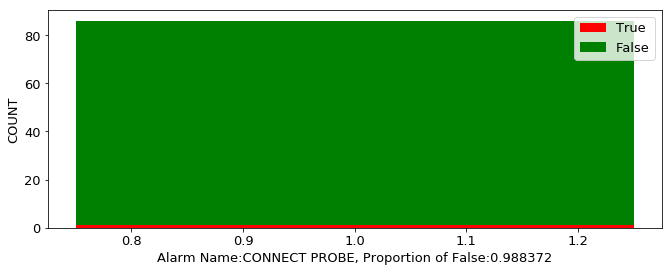

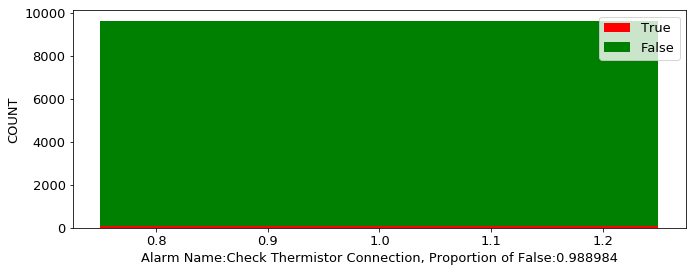

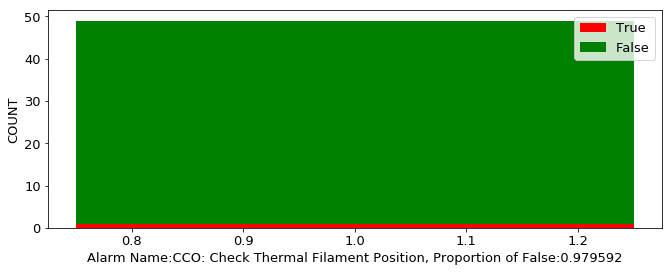

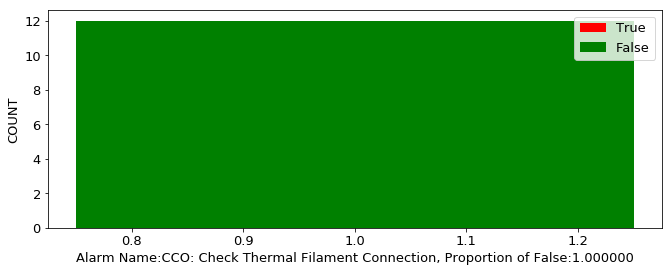

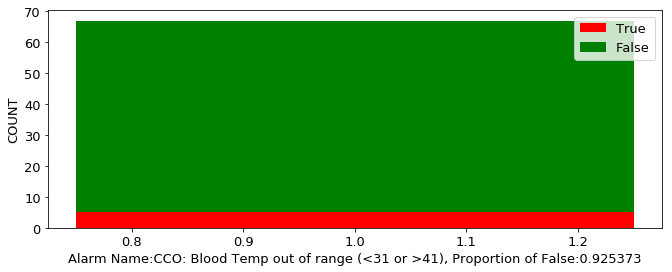

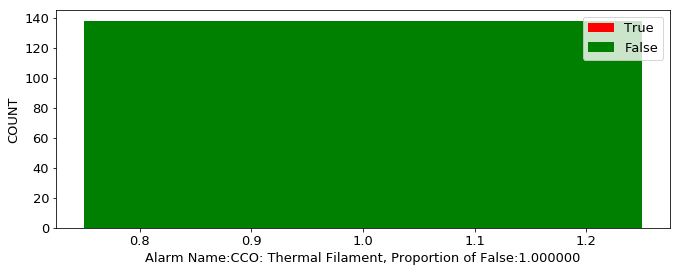

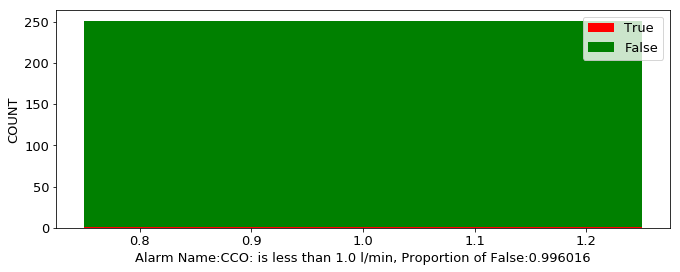

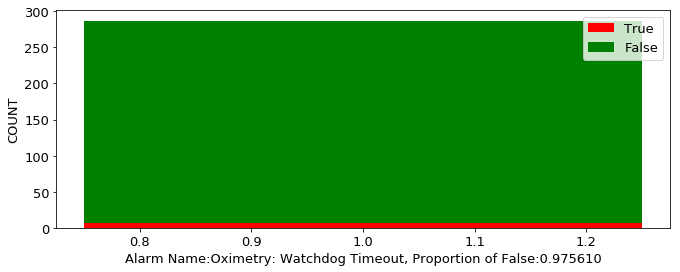

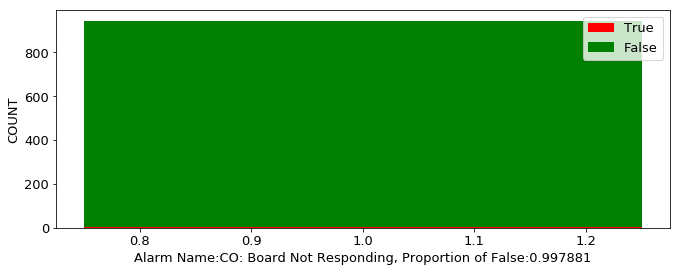

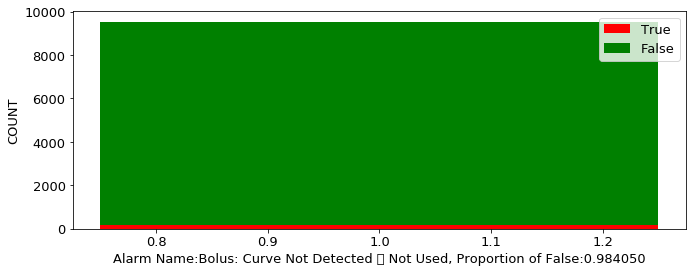

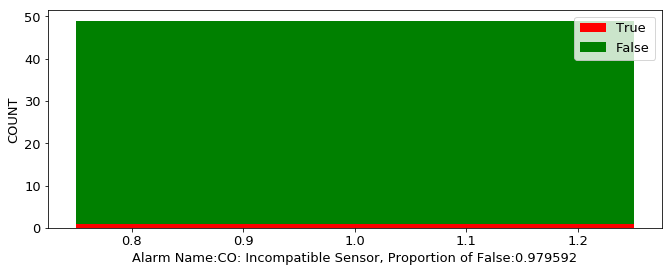

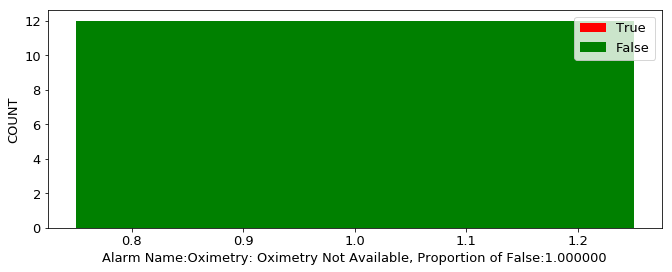

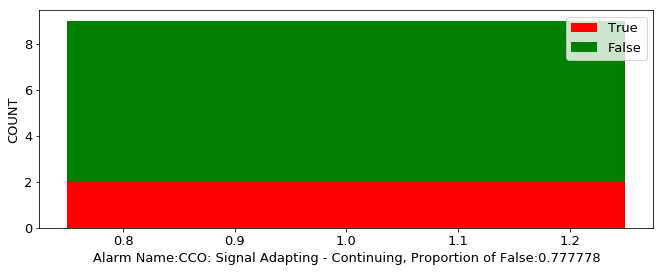

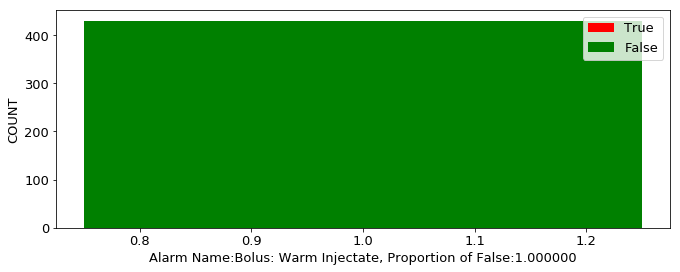

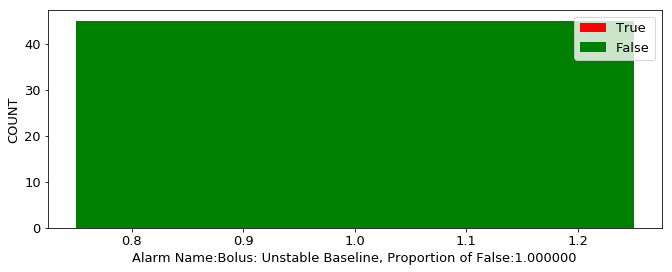

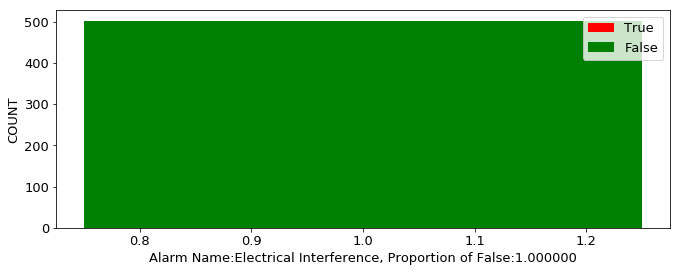

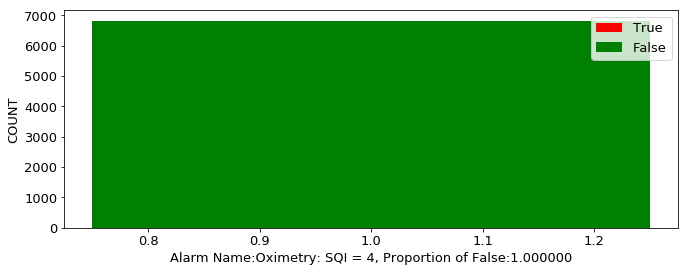

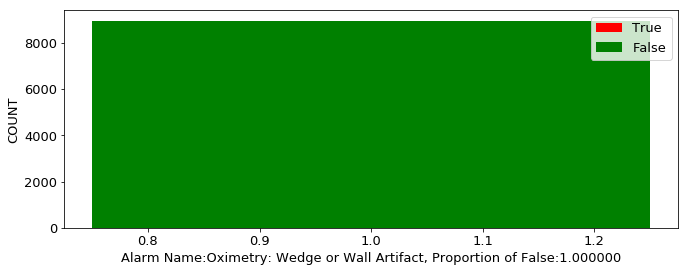

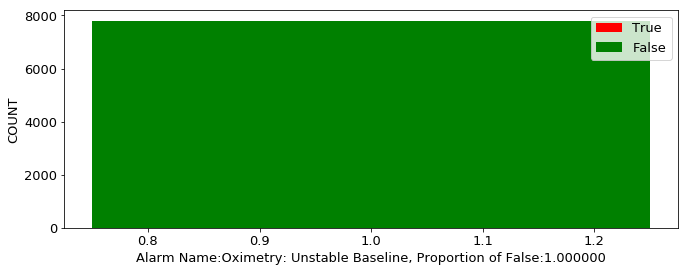

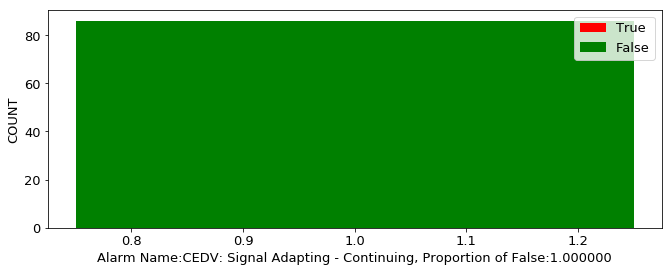

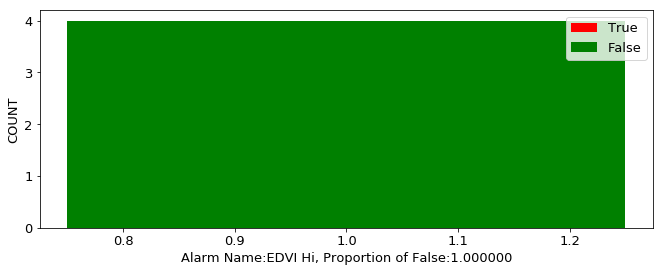

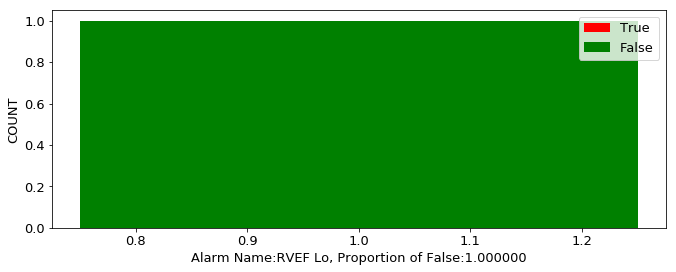

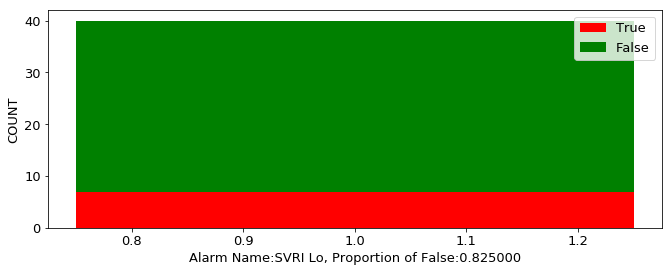

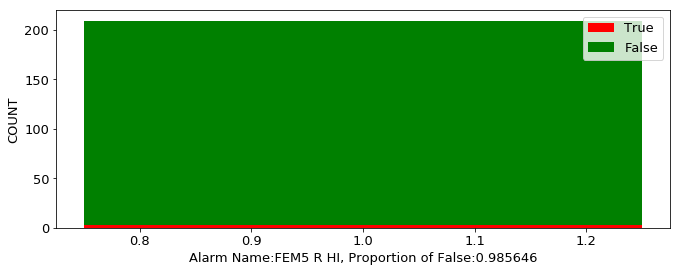

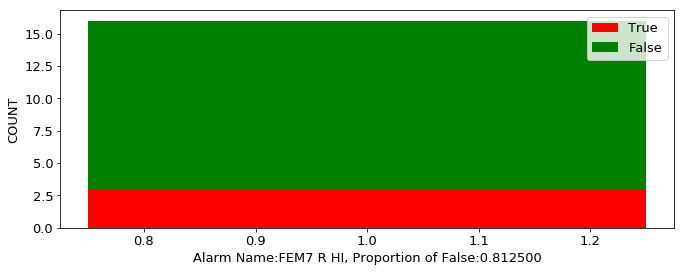

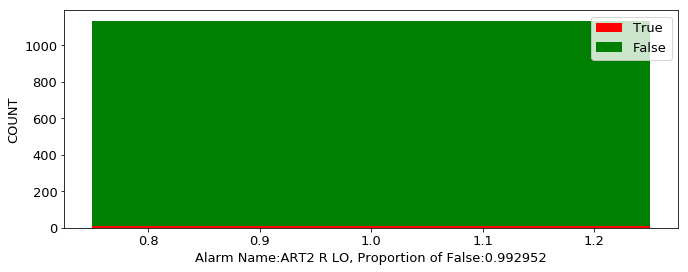

In [251]:
for i in range(251):
    plt.rc('font', family='SimHei', size=13)
    x = all_observed_parcode[i]
    idx = 1
    plt.bar(idx, T_all_info[i], width, color='red', label='True')
    plt.bar(idx, F_all_info[i], width, bottom=T_all_info[i], color='green', label='False')
    if x == -1:
        s = 'BOLUS Mode'
    else:
        s = DescriptionTable['AlarmName'][x]
    p = F_all_info[i]/(T_all_info[i]+F_all_info[i])
    plt.xlabel('Alarm Name:%s, Proportion of False:%f'%(s,p))
    plt.ylabel('COUNT')
    plt.legend()
    plt.show()    

In [303]:
pwd

'/Users/zehaodong/Desktop/alarm_fatigue/Preprocessing'

In [304]:
cd ..

/Users/zehaodong/Desktop/alarm_fatigue


In [305]:
cd data

/Users/zehaodong/Desktop/alarm_fatigue/data


In [314]:
import pandas as pd

In [333]:
write_data = list(Hidden_states[0])
for i in range(len(Hidden_states)-1):
    print(i)
    write_data.extend(list(Hidden_states[i+1]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [335]:
dataframe_write = pd.DataFrame({'prediction':write_data})

In [336]:
dataframe_write.to_csv('prediciton.csv',index=False,sep=',')

In [338]:
len(AlarmTable['AlarmLevel'])

955674

In [66]:
n = 0
for i in range(len(states1)):
    n += len(states1[i])
print(n)

943991


In [193]:
len(states1)

489

# Combine Phychological Data and Viterbi Algoriyhm

### patient 2221 case

In [253]:
patient2221 = PATIENT[0]
hidden_state2221 = Hidden_states[0]
alarm2221 = patient2221.patient_alarm_record()
phydata2221=patient2221.patient_physiological_data()

In [257]:
assert(len(hidden_state2221)==len(alarm2221['AlarmParcode']))

In [283]:
#alarm2221

In [282]:
#phydata2221

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


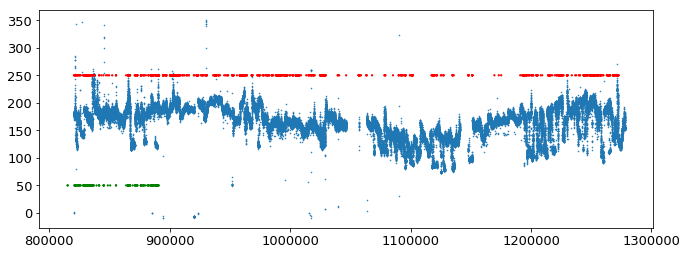

In [278]:
plt.scatter(phydata2221['partieme'],phydata2221['blood_pressure_h'], s=.3)
color = []
y_print = []
for i in hidden_state2221:
    if i == 0:
        color.append('r')
        y_print.append(250)
    else:
        color.append('g')
        y_print.append(50)
plt.scatter(alarm2221['alarmstarttime'],y_print,c=color,s=1.5)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


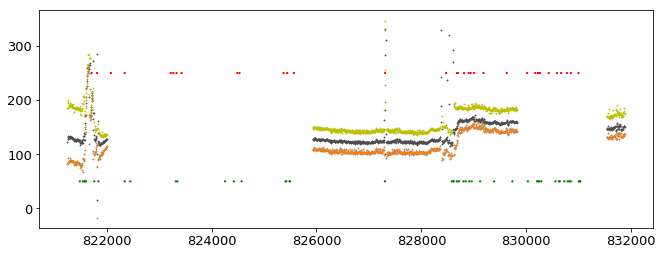

In [290]:
#### segment ##### 
plt.scatter(phydata2221['partieme'][2000:3000],phydata2221['blood_pressure_m'][2000:3000], s=.3,c='.3')
plt.scatter(phydata2221['partieme'][2000:3000],phydata2221['blood_pressure_h'][2000:3000], s=.3,c='y')
plt.scatter(phydata2221['partieme'][2000:3000],phydata2221['blood_pressure_l'][2000:3000], s=.3)
color = []
y_print = []
for i in hidden_state2221:
    if i == 0:
        color.append('r')
        y_print.append(250)
    else:
        color.append('g')
        y_print.append(50)
plt.scatter(alarm2221['alarmstarttime'][10:90],y_print[10:90],c=color[10:90],s=1.5)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


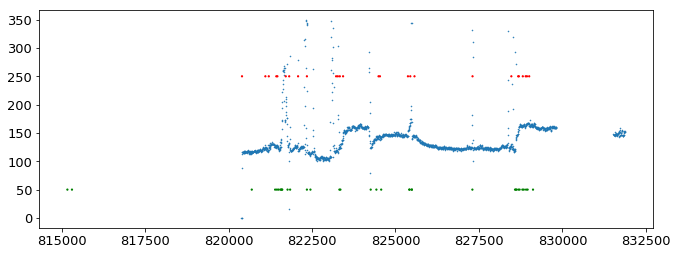

In [279]:
plt.scatter(phydata2221['partieme'][:3000],phydata2221['blood_pressure_m'][:3000], s=.3)
color = []
y_print = []
for i in hidden_state2221:
    if i == 0:
        color.append('r')
        y_print.append(250)
    else:
        color.append('g')
        y_print.append(50)
plt.scatter(alarm2221['alarmstarttime'][:60],y_print[:60],c=color,s=1.5)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


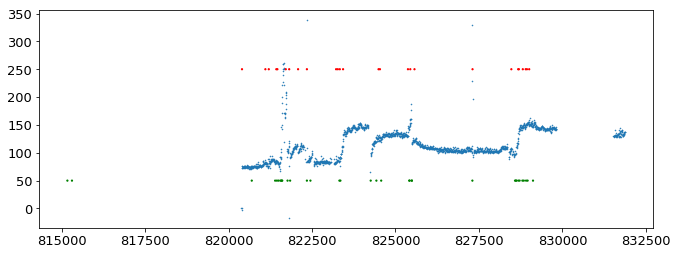

In [280]:
plt.scatter(phydata2221['partieme'][:3000],phydata2221['blood_pressure_l'][:3000], s=.3)
color = []
y_print = []
for i in hidden_state2221:
    if i == 0:
        color.append('r')
        y_print.append(250)
    else:
        color.append('g')
        y_print.append(50)
plt.scatter(alarm2221['alarmstarttime'][:60],y_print[:60],c=color,s=1.5)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


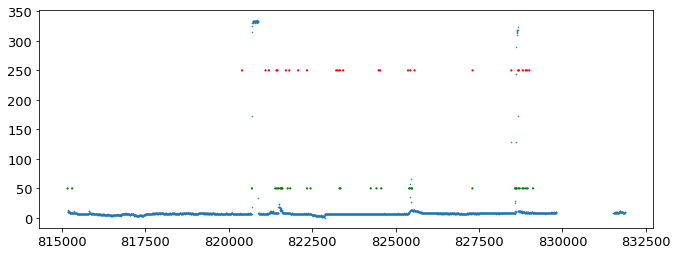

In [281]:
plt.scatter(phydata2221['partieme'][:3000],phydata2221['cvp_2'][:3000], s=.3)
color = []
y_print = []
for i in hidden_state2221:
    if i == 0:
        color.append('r')
        y_print.append(250)
    else:
        color.append('g')
        y_print.append(50)
plt.scatter(alarm2221['alarmstarttime'][:60],y_print[:60],c=color,s=1.5)
plt.show()

In [293]:
#phydata2221

In [302]:
alarm2221.iloc[10:60,:]

Unnamed: 0    ID  alarmstarttime  AlarmLevel  AlarmParcode   AlarmMessage  \
10          11  2221          821491           5           163   CVP2 M HI 18   
11          12  2221          821548           6           314  ART1 S HI 192   
12          13  2221          821578           6           282  ART1 D HI 107   
13          14  2221          821592           6           298  ART1 M HI 157   
14          15  2221          821608           6           314  ART1 S HI 213   
15          16  2221          821712           6           314  ART1 S HI 200   
16          17  2221          821766           6           282  ART1 D HI 100   
17          18  2221          821816           6           282  ART1 D HI 102   
18          19  2221          821844           6           282   ART1 D HI 92   
19          20  2221          822082           6           282  ART1 D HI 101   
20          21  2221          822346           6           282  ART1 D HI 191   
21          22  2221          822346           6           298  ART1 M HI 161   
22          23  2221          822452           6           282   ART1 D HI 92   
23          24  2221          823221           6            48  DISCON VENTIL   
24          25  2221          823272           6           282   ART1 D HI 98   
25          26  2221          823320           6           282   ART1 D HI 90   
26          27  2221          823332           6           282   ART1 D HI 98   
27          28  2221          823350           6           282   ART1 D HI 93   
28          29  2221          823430           6           298  ART1 M HI 146   
29          30  2221          824257           6           282  ART1 D HI 100   
30          31  2221          824428           6           298  ART1 M HI 144   
31          32  2221          824492           6           298  ART1 M HI 144   
32          33  2221          824534           6           298  ART1 M HI 142   
33          34  2221          824572           6           298  ART1 M HI 142   
34          35  2221          825373           6            55  HIGH PRESSURE   
35          36  2221          825411           6            55  HIGH PRESSURE   
36          37  2221          825426           6           314  ART1 S HI 191   
37          38  2221          825444           6           314  ART1 S HI 186   
38          39  2221          825490           6           282  ART1 D HI 116   
39          40  2221          825490           6           298  ART1 M HI 143   
40          41  2221          825569           5             9        COUPLET   
41          42  2221          827304           6           282  ART1 D HI 329   
42          43  2221          827308           6           314  ART1 S HI 347   
43          44  2221          828471           5           163  CVP2 M HI 128   
44          45  2221          828581           6            55  HIGH PRESSURE   
45          46  2221          828610           6           314  ART1 S HI 193   
46          47  2221          828615           5           163  CVP2 M HI 315   
47          48  2221          828676           6           314  ART1 S HI 187   
48          49  2221          828676           6           298  ART1 M HI 158   
49          50  2221          828696           6           282  ART1 D HI 141   
50          51  2221          828718           6           314  ART1 S HI 190   
51          52  2221          828802           6           314  ART1 S HI 185   
52          53  2221          828814           6           314  ART1 S HI 186   
53          54  2221          828844           6           314  ART1 S HI 186   
54          55  2221          828900           6           314  ART1 S HI 191   
55          56  2221          828912           6           314  ART1 S HI 187   
56          57  2221          828938           6           314  ART1 S HI 185   
57          58  2221          828958           6           314  ART1 S HI 190   
58          59  2221          82900

In [300]:
hidden_state2221[10:60]

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1], dtype=int32)

In [166]:
dict11111 = {1:5,2:6}
dict11112 = {1:6,3:5}
from collections import Counter
xxxxx = Counter(dict11111)
yyyyy = Counter(dict11112)
zzzzz = dict(xxxxx+yyyyy)
zzzzz

{1: 11, 2: 6, 3: 5}